# Loan Lending

## Aim
To identify the risky loan applicants and reducing such loans thereby cutting down the amount of credit loss using EDA.
### Business objective
To understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. So that, the company can utilize this knowledge for its portfolio and risk assessment. Derive actionable items
### Steps
1. Cleaning the Data
    <br>a. Cleanup of Rows & Columns
    <br>b. Fix Missing values
    <br>c. Standardise values
    <br>d. Filter data
2. Univariate Analysis
    <br>a. Segmented Univariate Analysis
    <br>b. Timeseries
3. Bivariate Analysis
    <br>a. Check correlation
    <br>b. Comparision of categorical data
4. Derived Metrics
    <br>a. Type driven metrics
    <br>b. business driven metrics
    <br>c. Data driven metrics



#mpty

In [1]:
import os
curDir = os.path.abspath(os.curdir)
print(curDir)

C:\Users\ASK


### Importing Libraries

In [2]:
#importing pandas
import pandas as pd
#importing numpy
import numpy as np
#ploting (here matplotlib is imported as "mpt")
import matplotlib.pyplot as mpt
#importing seaborn as "sbn"
import seaborn as sbn
#importing std date and time
from datetime import datetime
%matplotlib inline
import pytz
sbn.set()
#Change the float format for display in notebook
pd.options.display.float_format = '{:20,.2f}'.format
pd.set_option('display.max_columns', None)

In [3]:
#Reading all the given files and Loading them into Pandas Data Frames
loan_main_df = pd.read_csv("loan.csv", low_memory=False, encoding = "ISO-8859-1")

In [4]:
# check column names, data types and other info.
loan_main_df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
# Check for any empty rows, check if there are any multiple loan applications for a given customer.
# Based on data dictionary, id represents loan application and member_id represents a unique customer. 
# There could be cases where a single customer might have applied with different ID, that is beyond the scope of this analysis
# AIM is check for empty rows and cardinality of customer to loan application.
print("Unique Application ID in loan.csv: {}".format(loan_main_df.id.nunique()))
print("Unique Customers in loan.csv: {}".format(loan_main_df.member_id.nunique()))

Unique Application ID in loan.csv: 39717
Unique Customers in loan.csv: 39717


#### **Observations**
- There are total of `39717 rows and 111 columns` in the dataset. Column datatype split is float64(74), int64(13), object(24).
- There are many columns in the dataset where the entire columns is NULL


#### Rows with missing data

Based on the comparision of numer of rows in the data frame and number of unique application IDs, we see that there are no missing rows.

No one customer has more than one loan application ID in the data.

### 1. Cleaning the Data
#### Columns with all null values and single values

Before we understand any induvidual columns and values inside them. Check if there are any columns with no data at all. i.e all rows have Null in that columns. These columns are of no value to analysis, so will be getting rid of them.

In [6]:
#Total NULL coloumns present in the dataset
print("Total No. of Null coloumns present in the dataset(before cleaning):", loan_main_df[loan_main_df.columns[loan_main_df.isnull().all()]].sum().count())

Total No. of Null coloumns present in the dataset(before cleaning): 54


In [7]:
# Drop those columns which have all Null values
loan_main_df.dropna(axis = 1,how = 'all',inplace = True)
print("Total No. of Null coloumns present in the dataset(after cleaning):", loan_main_df[loan_main_df.columns[loan_main_df.isnull().all()]].sum().count())
print("Total No. of coloumns remaining in the dataset(after cleaning):", len(loan_main_df.columns))
print("shape of the dataset:", loan_main_df.shape) 

Total No. of Null coloumns present in the dataset(after cleaning): 0
Total No. of coloumns remaining in the dataset(after cleaning): 57
shape of the dataset: (39717, 57)


In [8]:
loan_main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

There are total of 39717 records in the data set provided and 57 non null columns. Currently ignoring those columns and find the missing data columns where the percentage is higher than 0 and lower than 100%.

In [9]:
# calculatin percentage of null values in the datframe
total_rows = loan_main_df.isnull().sum().sort_values(ascending=False)
is_null_percent = (loan_main_df.isnull().sum()/loan_main_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_rows, is_null_percent], axis=1, keys=['Total_Rows', 'Percent_Rows'])
missing_data[(missing_data['Total_Rows'] > 0 )]

,Total_Rows,Percent_Rows
next_pymnt_d,38577,0.97
mths_since_last_record,36931,0.93
mths_since_last_delinq,25682,0.65
desc,12940,0.33
emp_title,2459,0.06
emp_length,1075,0.03
pub_rec_bankruptcies,697,0.02
last_pymnt_d,71,0.00
chargeoff_within_12_mths,56,0.00
collections_12_mths_ex_med,56,0.00


#### **Observations**
- There are total of `39717 rows and 111 columns` in the data frame initially.
- There will be `39717 rows and 57 columns remaining` in the data frame after cleaning.

#### **Action**
Lets look at the colum data to understand the missing data. Drop columns that have high percentage of missing values, for this excercise any column with morethan 60% missing data can be removed. We will make a decision to impute or ignore. **loan_status** is the column to include the status of the loan as 'Fully Paid', 'Charged Off', 'Current'. We will examin these cloumns with loan status as well.

In [10]:
# We have columns 'mths_since_last_record', 'mths_since_last_delinq' and 'next_pymnt_d' having high % of NULL Values.  
# mths_since_last_record - 93%
# mths_since_last_delinq - 65%
# next_pymnt_d - 97%
# As these columns having high percentage NULL values it is better to drop rather to impute with some values.
# dropping columns which have more than 60 % data missing.

loan_main_df = loan_main_df.dropna(thresh=loan_main_df.shape[0]*0.6,how='all',axis=1)

## Reverify the percentage of Null Columns
total_rows = loan_main_df.isnull().sum().sort_values(ascending=False)
is_null_percent = (loan_main_df.isnull().sum()/loan_main_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_rows, is_null_percent], axis=1, keys=['Total_Rows', 'Percent_Rows'])
missing_data[(missing_data['Total_Rows'] > 0 )]

,Total_Rows,Percent_Rows
desc,12940,0.33
emp_title,2459,0.06
emp_length,1075,0.03
pub_rec_bankruptcies,697,0.02
last_pymnt_d,71,0.00
chargeoff_within_12_mths,56,0.00
collections_12_mths_ex_med,56,0.00
revol_util,50,0.00
tax_liens,39,0.00
title,11,0.00


Lets find if there are any columns that have single value. These columns add no value to the analysis. i.e. there is only one category.

In [11]:
loan_main_df.columns[ loan_main_df.nunique()==1 ]

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

Verified each of these columns
- pymnt_plan - All values are n and there are no missing values
- initial_list_status - All rows have value F and no missing values
- collections_12_mths_ex_med - All transactions have 0 and 56 missing values.
- policy_code - All rows have value 1, no missing value. not useful for segmentation.
- application_type - All rows have INDIVIDUAL  not useful for any segmentation. *Useful to say that data available is only for Individual loan application*
- acc_now_delinq - All transactions have 0 delinquent accounts. No Missing Values. Not useful for segmentation
- chargeoff_within_12_mths -  All transactions have 0 and 56 missing values.
- delinq_amnt - All transactions have 0.
- tax_liens - All transactions are 0.0 and only 39 missing values. 
<br>**With Above Analysis, we can safely get rid of these columns.**


In [12]:
# The Columns which are having Unique values.
# 'pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med','policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'
# safely droping the above columns.
#
column_list = ['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med','policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']
loan_main_df.drop(columns=column_list,axis=1,inplace=True)

In [13]:
#Remaining Columns after initial cleanup.
loan_main_df.columns.to_series().groupby(loan_main_df.dtypes).groups

{dtype('int64'): Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'delinq_2yrs',
        'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc'],
       dtype='object'),
 dtype('float64'): Index(['funded_amnt_inv', 'installment', 'annual_inc', 'dti', 'out_prncp',
        'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
        'total_rec_int', 'total_rec_late_fee', 'recoveries',
        'collection_recovery_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies'],
       dtype='object'),
 dtype('O'): Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
        'home_ownership', 'verification_status', 'issue_d', 'loan_status',
        'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
        'earliest_cr_line', 'revol_util', 'last_pymnt_d', 'last_credit_pull_d'],
       dtype='object')}

In [14]:
loan_main_df['desc'].head()

0      Borrower added on 12/22/11 > I need to upgra...
1      Borrower added on 12/22/11 > I plan to use t...
2                                                  NaN
3      Borrower added on 12/21/11 > to pay for prop...
4      Borrower added on 12/21/11 > I plan on combi...
Name: desc, dtype: object

In [15]:
loan_main_df.groupby(loan_main_df['title'].str.lower()).size().sort_values(ascending=False).head(5)
# There is a similar field purpose

title
debt consolidation         3082
debt consolidation loan    1866
personal loan               986
consolidation               737
home improvement            543
dtype: int64

In [16]:
loan_main_df.groupby(loan_main_df['purpose'].str.lower()).size().sort_values(ascending=False)
# This seem to be more appropriate filed than desc.

purpose
debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
dtype: int64

In [17]:
# Also id and Member_id are unique and are not relavent to this analysis
column_list = ['title','desc','id','member_id']
loan_main_df.drop(columns=column_list,axis=1,inplace=True)

In [18]:
# From data dictionary and description these three fields seem to say same.
loan_main_df[['loan_amnt','funded_amnt','funded_amnt_inv']].describe()

,loan_amnt,funded_amnt,funded_amnt_inv
count,"39,717.00","39,717.00","39,717.00"
mean,"11,219.44","10,947.71","10,397.45"
std,"7,456.67","7,187.24","7,128.45"
min,500.00,500.00,0.00
25%,"5,500.00","5,400.00","5,000.00"
50%,"10,000.00","9,600.00","8,975.00"
75%,"15,000.00","15,000.00","14,400.00"
max,"35,000.00","35,000.00","35,000.00"


In [19]:
loan_main_df[(~loan_main_df['loan_amnt'].isna()) & (loan_main_df['loan_amnt'] > 0.)][['loan_amnt','funded_amnt','funded_amnt_inv']].corr()

,loan_amnt,funded_amnt,funded_amnt_inv
loan_amnt,1.00,0.98,0.94
funded_amnt,0.98,1.00,0.96
funded_amnt_inv,0.94,0.96,1.00


In [20]:
#These are few columns that mean the same and have high correlation.So excluding these columns and retaining loan_amnt
loan_main_df = loan_main_df.drop(columns=['funded_amnt','funded_amnt_inv'], axis=1)

In [21]:
# Similarly total_pymnt	total_pymnt_inv	 seem to be same.
loan_main_df[(~loan_main_df['total_pymnt'].isna()) & (loan_main_df['total_pymnt'] > 0.)][['total_pymnt','total_pymnt_inv']].corr()

,total_pymnt,total_pymnt_inv
total_pymnt,1.00,0.97
total_pymnt_inv,0.97,1.00


In [22]:
loan_main_df = loan_main_df.drop(columns=['total_pymnt_inv'], axis=1)

 **Following columns are also being dropped.**
<br>delinq_2yrs - All rows have 0 except for one account.
<br>out_prncp - This is there for only charged off accounts, not useful for analysis
<br>out_prncp_inv - Similar to out_prncp
<br>emp_title - Different title are there and has not real meaning for segmented analysis.

In [23]:
loan_main_df = loan_main_df.drop(columns=['delinq_2yrs','out_prncp_inv','emp_title'], axis=1)

In [24]:
loan_main_df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 35 entries, loan_amnt to pub_rec_bankruptcies
dtypes: float64(12), int64(6), object(17)
memory usage: 10.6+ MB


In [25]:
loan_main_df.head(n=10)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,"24,000.00",Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,credit_card,860xx,AZ,27.65,Jan-85,1,3,0,13648,83.70%,9,0.00,"5,863.16","5,000.00",863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.00
1,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,car,309xx,GA,1.00,Apr-99,5,3,0,1687,9.40%,4,0.00,"1,008.71",456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.00
2,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,"12,252.00",Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,small_business,606xx,IL,8.72,Nov-01,2,2,0,2956,98.50%,10,0.00,"3,005.67","2,400.00",605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.00
3,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,"49,200.00",Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,other,917xx,CA,20.00,Feb-96,1,10,0,5598,21%,37,0.00,"12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.00
4,3000,60 months,12.69%,67.79,B,B5,1 year,RENT,"80,000.00",Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,other,972xx,OR,17.94,Jan-96,0,15,0,27783,53.90%,38,524.06,"3,513.33","2,475.94","1,037.39",0.00,0.00,0.00,May-16,67.79,May-16,0.00
5,5000,36 months,7.90%,156.46,A,A4,3 years,RENT,"36,000.00",Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,wedding,852xx,AZ,11.20,Nov-04,3,9,0,7963,28.30%,12,0.00,"5,632.21","5,000.00",632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.00
6,7000,60 months,15.96%,170.08,C,C5,8 years,RENT,"47,004.00",Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,280xx,NC,23.51,Jul-05,1,7,0,17726,85.60%,11,0.00,"10,110.84","6,985.61","3,125.23",0.00,0.00,0.00,May-16,"1,313.76",May-16,0.00
7,3000,36 months,18.64%,109.43,E,E1,9 years,RENT,"48,000.00",Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,car,900xx,CA,5.35,Jan-07,2,4,0,8221,87.50%,4,0.00,"3,939.14","3,000.00",939.14,0.00,0.00,0.00,Jan-15,111.34,Dec-14,0.00
8,5600,60 months,21.28%,152.39,F,F2,4 years,OWN,"40,000.00",Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,small_business,958xx,CA,5.55,Apr-04,2,11,0,5210,32.60%,13,0.00,646.02,162.02,294.94,0.00,189.06,2.09,Apr-12,152.39,Aug-12,0.00
9,5375,60 months,12.69%,121.45,B,B5,< 1 year,RENT,"15,000.00",Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,other,774xx,TX,18.08,Sep-04,0,2,0,9279,36.50%,3,0.00,"1,476.19",673.48,533.42,0.00,269.29,2.52,Nov-12,121.45,Mar-13,0.00


In [26]:
# Following are other columns that add no value to analysis URL
loan_main_df = loan_main_df.drop(columns=['url'], axis=1)

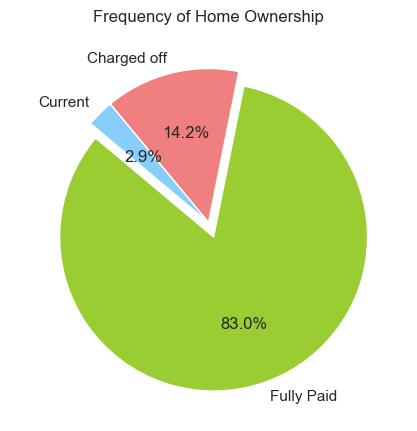

In [115]:
# Analysis of Loan Status
#-------------------------------------------------------------------
# The Variable loan_status is an Unordered Categorical
# Lets understand the distribution of data by loan status
# Our main aim to find why customers are going in charged or what are the drivers.
# Current - Loan is still running and customers are paying.
# Charged Off - The Customer is declared as not paying the loan or defaulted.
# Fully Paid - The Customer is treated as fully paid if he said paid all outstanding principle and interest.
#-------------------------------------------------------------------
mpt.rcdefaults()
sbn.set(font_scale=1)
sbn.set_style("dark")
mpt.figure(figsize=(5, 5))
loan_status = loan_main_df['loan_status'].value_counts()
chart_label_loan_status = ["Fully Paid", "Charged off", "Current"]
colors = ['yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0)
mpt.pie(loan_status, explode=explode, labels=chart_label_loan_status, colors=colors,
        autopct='%1.1f%%', shadow=False, startangle=140)
mpt.title('Frequency of Home Ownership')
mpt.show()

#### Observation
- Most of the loans in the data set are fully paid(83%) and only a small percentage of loans are current loans(2.9%)

##### Fix Missing Values
Identify the columns to see which require imputing 

In [28]:
## Reverify the percentage of Null Columns
total_rows = loan_main_df.isnull().sum().sort_values(ascending=False)
is_null_percent = (loan_main_df.isnull().sum()/loan_main_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_rows, is_null_percent], axis=1, keys=['Total_Rows', 'Percent_Rows'])
missing_data[(missing_data['Total_Rows'] > 0 )]

,Total_Rows,Percent_Rows
emp_length,1075,0.03
pub_rec_bankruptcies,697,0.02
last_pymnt_d,71,0.00
revol_util,50,0.00
last_credit_pull_d,2,0.00


In [29]:
# Lets look at records of last_pymnt_d to see if any similarites.
loan_main_df[loan_main_df.last_pymnt_d.isna()].groupby(by='loan_status').agg({'loan_status':'count'})

,loan_status
loan_status,
Charged Off,71


In [30]:
# This is interesting, all missing values belong to 'Charged Off' status. 
#Let s see how much did there customers pay. it there is none we can impute issue_d
loan_main_df[loan_main_df.last_pymnt_d.isna()]['last_pymnt_amnt'].describe()

count                  71.00
mean                    0.00
std                     0.00
min                     0.00
25%                     0.00
50%                     0.00
75%                     0.00
max                     0.00
Name: last_pymnt_amnt, dtype: float64

In [31]:
# Last payment is zero for all records, this means these guys took loan never bothered to pay.
loan_main_df["last_pymnt_d"] = loan_main_df["last_pymnt_d"].fillna(loan_main_df["issue_d"])

In [32]:
loan_main_df[(loan_main_df.last_pymnt_d == loan_main_df.issue_d)]['last_pymnt_d'].count()

71

In [33]:
loan_main_df[loan_main_df.emp_length.isna()].groupby(by='loan_status').agg({'loan_status':'count'})
# We will imput this later after standardizing the colum to numberical

,loan_status
loan_status,
Charged Off,228
Current,42
Fully Paid,805


In [34]:
loan_main_df[loan_main_df.revol_util.isna()].groupby(by='loan_status').agg({'loan_status':'count'})


,loan_status
loan_status,
Charged Off,16
Fully Paid,34


In [35]:
# The column int_rate and revol_util are represented in percentages (%)
# Remove % and convert the string objects to numeric for our analysis.
loan_main_df["int_rate"] = loan_main_df["int_rate"].str.replace("%", "").astype("float64")
loan_main_df["revol_util"] = loan_main_df["revol_util"].str.replace("%", "").astype("float64")

# Converting loan_amnt, funded_amnt to float type.
loan_main_df["loan_amnt"] = loan_main_df['loan_amnt'].astype('float64')
#loan_main_df["funded_amnt"] = loan_main_df['funded_amnt'].astype('float64')

In [36]:
# Revolving credit is a type of credit that does not have a fixed number of payments, in contrast to installment credit. 
# Credit cards are an example of revolving credit used by consumers. 
# Corporate revolving credit facilities are typically used to provide liquidity for a company's day-to-day operations
# revol_util is the Percentage of credit the borrower is using relative to all available revolving credit.

# Check how many null values are there
print('No. of null Values in \'revol_util\' is: ', loan_main_df.revol_util.isnull().sum())

No. of null Values in 'revol_util' is:  50


In [37]:
# There are 50 null values in revol_util 
print(loan_main_df.revol_util.describe())

count              39,667.00
mean                   48.83
std                    28.33
min                     0.00
25%                    25.40
50%                    49.30
75%                    72.40
max                    99.90
Name: revol_util, dtype: float64


In [38]:
# Imputing missing values with median
print('Both Mean =', round(loan_main_df.revol_util.mean(), 2), 'and Median =', loan_main_df.revol_util.median(),
      'are very close to each other , imputing missing values with median....')
loan_main_df.loc[loan_main_df.revol_util.isnull(),'revol_util'] =  loan_main_df.revol_util.median()

Both Mean = 48.83 and Median = 49.3 are very close to each other , imputing missing values with median....


In [39]:
#last_credit_pull_d
loan_main_df[loan_main_df.last_credit_pull_d.isna()].groupby(by='loan_status').agg({'loan_status':'count'})

,loan_status
loan_status,
Charged Off,1
Fully Paid,1


In [40]:
#imput with earliest_cr_line since both have verification status as not verified. 
loan_main_df[loan_main_df.last_credit_pull_d.isna()][['verification_status','loan_status','earliest_cr_line','last_credit_pull_d']]

,verification_status,loan_status,earliest_cr_line,last_credit_pull_d
26025,Not Verified,Charged Off,Oct-97,NaN
39476,Not Verified,Fully Paid,Jul-97,NaN


In [41]:
loan_main_df["last_credit_pull_d"] = loan_main_df["last_credit_pull_d"].fillna(loan_main_df["earliest_cr_line"])

In [42]:
# Verify what else is missing.
## Reverify the percentage of Null Columns
total_rows = loan_main_df.isnull().sum().sort_values(ascending=False)
is_null_percent = (loan_main_df.isnull().sum()/loan_main_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_rows, is_null_percent], axis=1, keys=['Total_Rows', 'Percent_Rows'])
missing_data[(missing_data['Total_Rows'] > 0 )]

,Total_Rows,Percent_Rows
emp_length,1075,0.03
pub_rec_bankruptcies,697,0.02


In [43]:
# Number of public record bankruptcies (pub_rec_bankruptcies)
# Since There are three kinds of public records that appear on a credit report: 
# bankruptcy filings, tax liens and judgments
# So this informtation should already be captured in column "pub_rec" which contains derogatory public records
print("Number of values in pub_rec_bankruptcies greater than pub_rec :",(loan_main_df.pub_rec < loan_main_df.pub_rec_bankruptcies).sum())

Number of values in pub_rec_bankruptcies greater than pub_rec : 0


In [44]:
# Hence we can drop column pub_rec_bankruptcies
loan_main_df.drop('pub_rec_bankruptcies', axis=1, inplace=True)

#### Standardization of Data

Do all the conversions required

In [45]:
#Column emp_length has substring '+', '<', ‘years’ strip this.
loan_main_df["emp_length"] = loan_main_df["emp_length"].str.replace("< 1", "0")
x = "+years"
y = "      "
z = str.maketrans(x, y)
loan_main_df["emp_length"] = loan_main_df["emp_length"].str.translate(z).astype("float64")
loan_main_df["emp_length"][0:5]

#impute employee length with mean
loan_main_df["emp_length"] = loan_main_df["emp_length"].fillna((loan_main_df["emp_length"].mean()))
loan_main_df['emp_length'] = round(loan_main_df['emp_length'])
loan_main_df["emp_length"][0:5]

0                  10.00
1                   0.00
2                  10.00
3                  10.00
4                   1.00
Name: emp_length, dtype: float64

In [46]:
# Verify what else is missing.
## Reverify the percentage of Null Columns
total_rows = loan_main_df.isnull().sum().sort_values(ascending=False)
is_null_percent = (loan_main_df.isnull().sum()/loan_main_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_rows, is_null_percent], axis=1, keys=['Total_Rows', 'Percent_Rows'])
missing_data[(missing_data['Total_Rows'] > 0 )]

,Total_Rows,Percent_Rows


Now we dont have any missing data, let focus on dates.

In [47]:
# There is a column which is not in standard date format
# It is in MMM-YY format and should be converted equivelent datetime formats.
loan_main_df['earliest_cr_line'] = pd.to_datetime(loan_main_df['earliest_cr_line'],format='%b-%y',errors='coerce')
loan_main_df['issue_d'] = pd.to_datetime(loan_main_df['issue_d'],format='%b-%y',errors='coerce')
loan_main_df['last_credit_pull_d'] = pd.to_datetime(loan_main_df['last_credit_pull_d'],format='%b-%y',errors='coerce')
loan_main_df['last_pymnt_d'] = pd.to_datetime(loan_main_df['last_pymnt_d'],format='%b-%y',errors='coerce')

In [48]:
# Strip 'Months' from ‘Term’ Column.
loan_main_df["term"] = loan_main_df["term"].str.replace("months", "").astype("int64")
loan_main_df["term"][0:10]

0    36
1    60
2    36
3    36
4    60
5    36
6    60
7    36
8    60
9    60
Name: term, dtype: int64

In [49]:
# check for any 'none' valunes in coloumn 'home_ownership'
print(loan_main_df["home_ownership"].unique())
print(loan_main_df["home_ownership"].value_counts())
# Based on the Categorization, lets impute None with other value. None by itself makes no sense.
loan_main_df.loc[(loan_main_df.home_ownership=='NONE'), 'home_ownership'] = 'OTHER'


['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE']
RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: home_ownership, dtype: int64


In [50]:
print(loan_main_df["home_ownership"].unique())
print(loan_main_df["home_ownership"].value_counts())

['RENT' 'OWN' 'MORTGAGE' 'OTHER']
RENT        18899
MORTGAGE    17659
OWN          3058
OTHER         101
Name: home_ownership, dtype: int64


In [51]:
# Removing "xxx" from the "zip_code" coloumn
loan_main_df["zip_code"] = loan_main_df["zip_code"].str.replace('xx', '')
loan_main_df["zip_code"][0:5]

0    860
1    309
2    606
3    917
4    972
Name: zip_code, dtype: object

In [52]:
# We Will create derived columns in subsequent section, first lets create new address.
#Creating a new "address" column by combining values in ‘zip_code’ and 'addr_state'
loan_main_df["address"] = loan_main_df["addr_state"].astype(str) + "," + loan_main_df["zip_code"].astype(str)
loan_main_df["address"] [0:5]

0    AZ,860
1    GA,309
2    IL,606
3    CA,917
4    OR,972
Name: address, dtype: object

In [53]:
# Final Check for null values in all coloumns
print("Total No. of Null coloumns present in the dataset(before cleaning):", loan_main_df[loan_main_df.columns[loan_main_df.isnull().all()]].sum().count())

Total No. of Null coloumns present in the dataset(before cleaning): 0


In [54]:
print('Final list of Columns after data cleaning.. \n', loan_main_df.columns)
print('Total Number of Columns = ', len(loan_main_df.columns))

Final list of Columns after data cleaning.. 
 Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'total_pymnt',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'address'],
      dtype='object')
Total Number of Columns =  34


### 2. Univariate Analysis
#### Plot 1: year wise bar chart

In [117]:
# Genric Functions for annotations.
def annotations(ax,textoffset,raxis):
    for a in ax.patches:
        height,width =a.get_height(),a.get_x()
        if (~np.isnan(height)):
            ax.annotate("{:.0f}".format(height), 
                       (a.get_x() + a.get_width() / 2.,
                        a.get_height()),
                        ha='center', va='center', rotation=raxis, 
                        xytext=(0, textoffset), textcoords='offset points') 

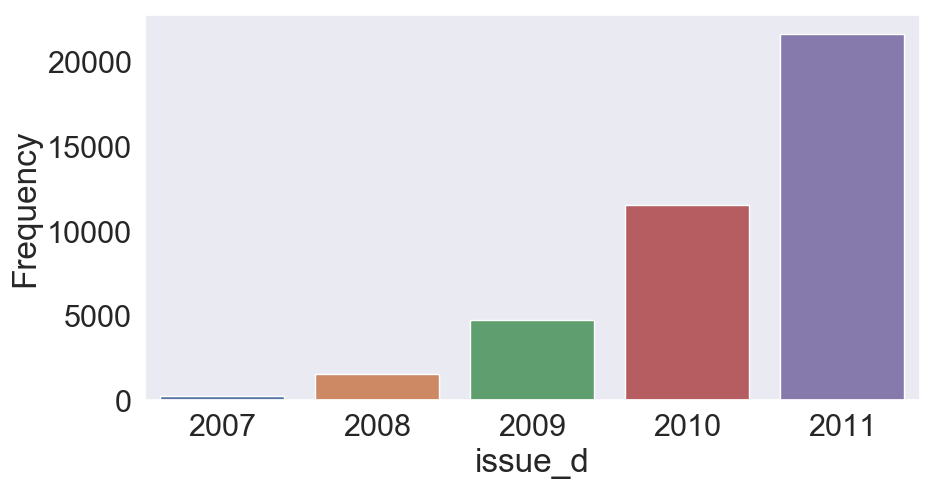

In [118]:
# Plot year wise bar chart of issue_d column 
yearwise_loans_issued = loan_main_df.groupby(loan_main_df.issue_d.dt.year).size().reset_index(name='Frequency')
sbn.set(font_scale=2)
sbn.set_style("dark")
mpt.figure(figsize=(10,5))
ab = sbn.barplot(x="issue_d", y="Frequency", data = yearwise_loans_issued, capsize=.2)
mpt.show()

#### From the graph below, we can see a dip in the later year of 2008 and from there on increasing. We will further analyse this in bivariate analysis.

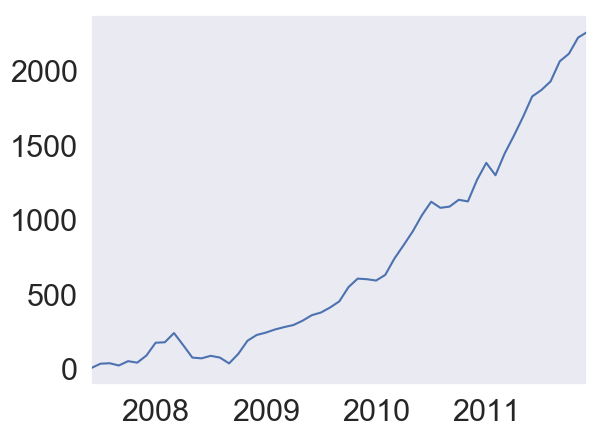

In [119]:
loan_main_df['issue_d'].value_counts().sort_index().plot.line()

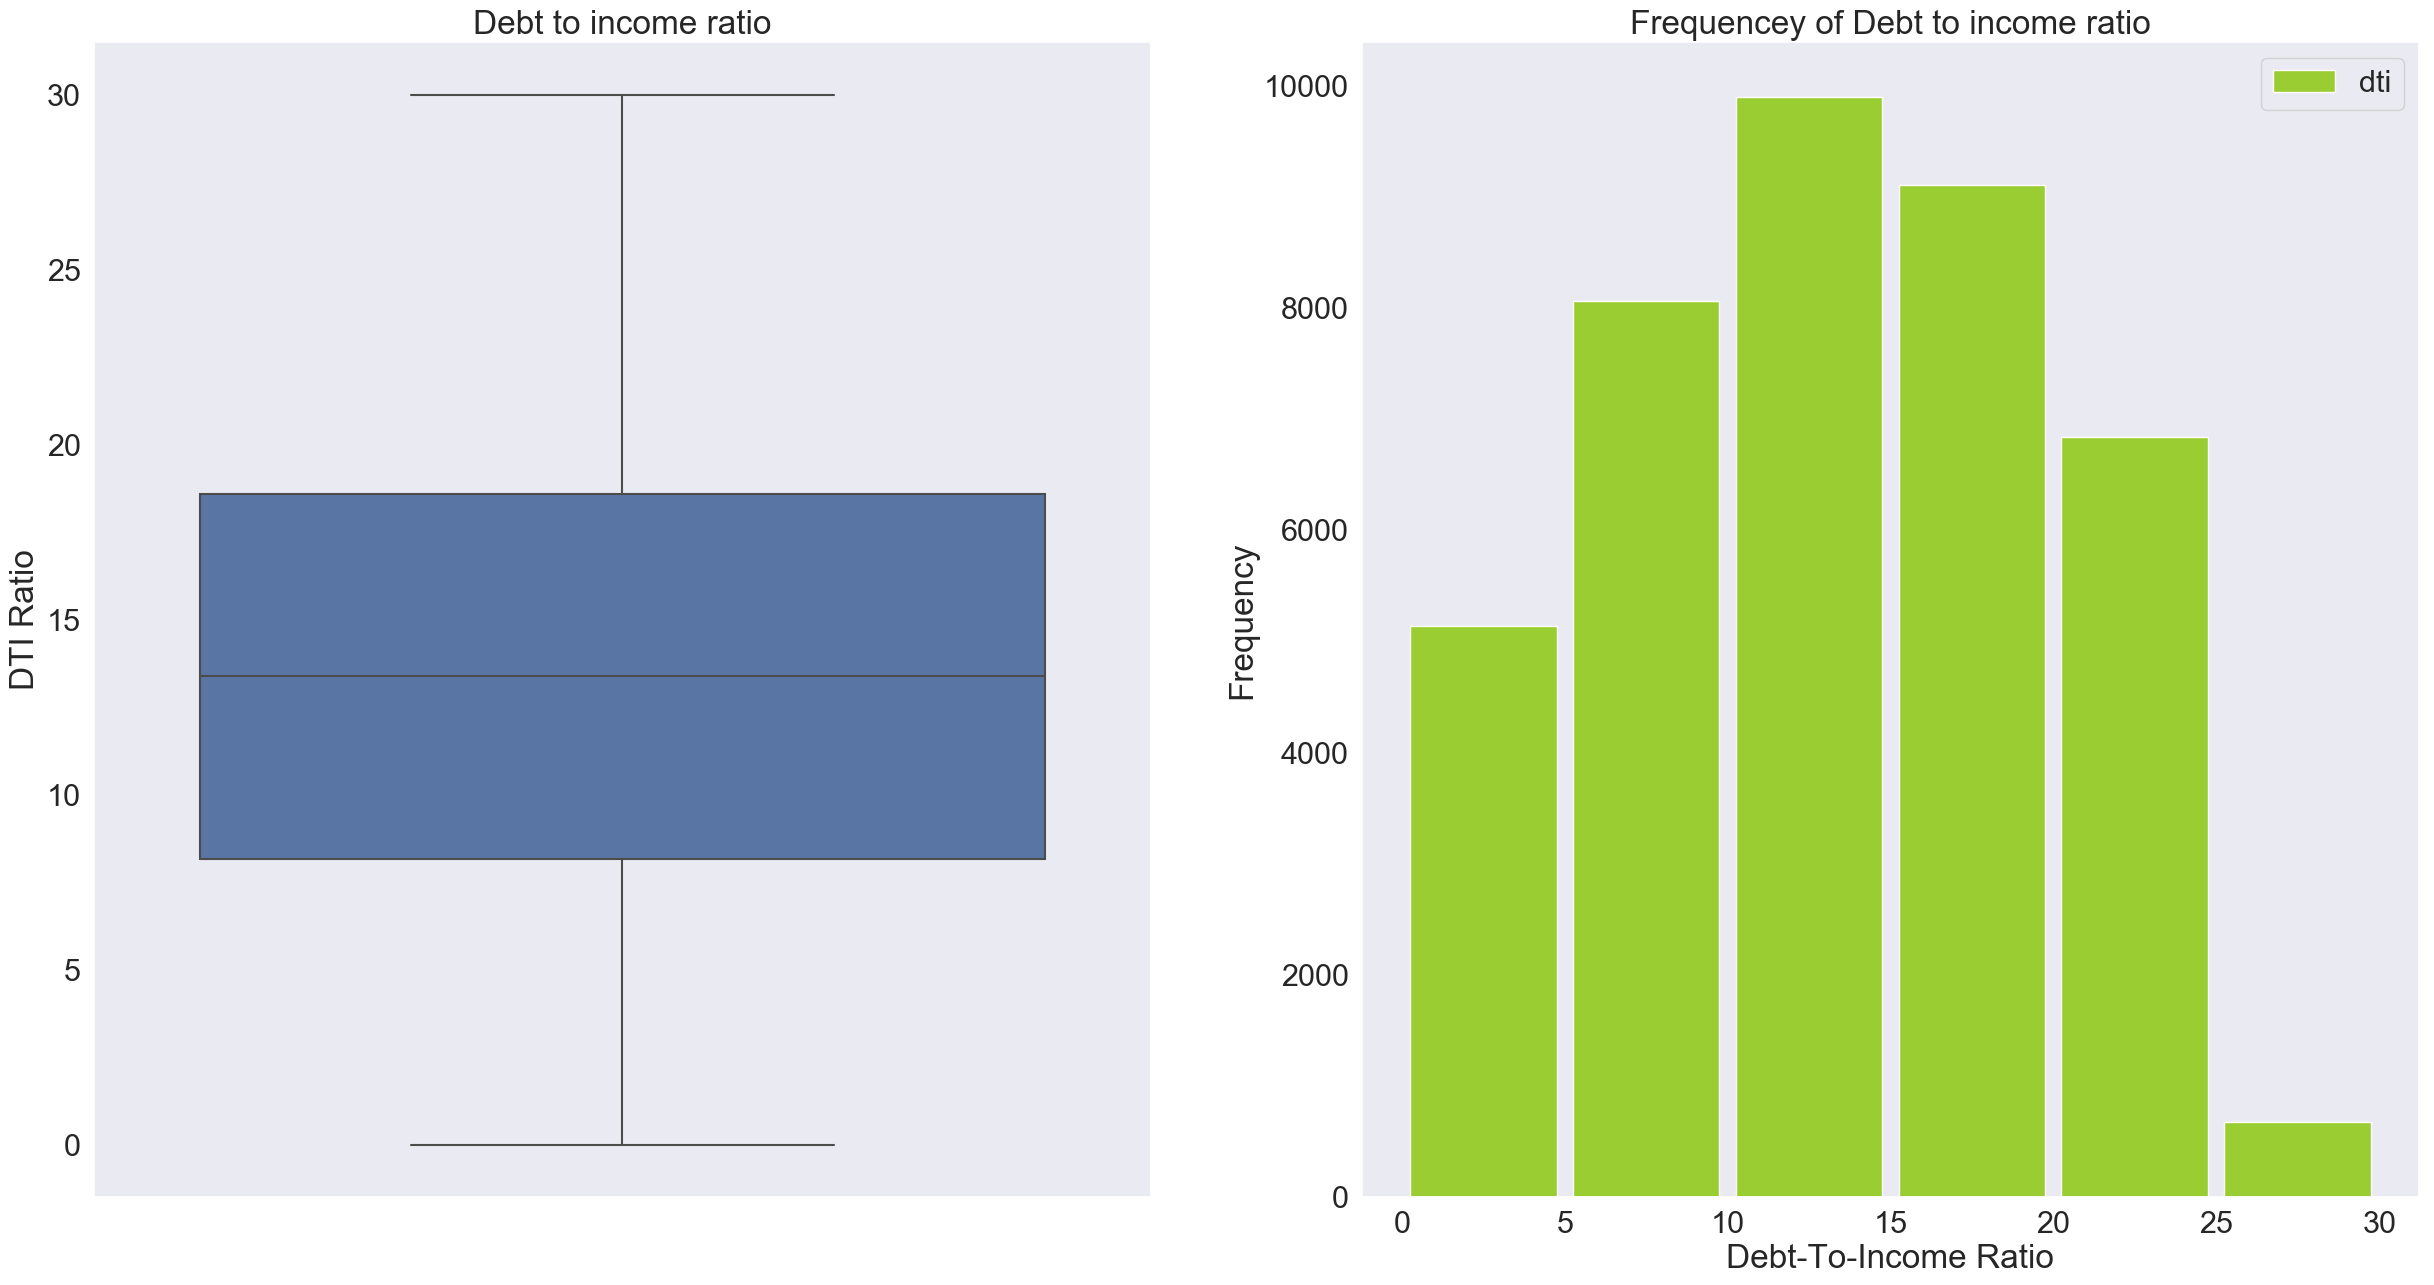

In [120]:
# Debt-To-Income Ratio(dti) is the percentage of a consumer's monthly gross income that goes 
# toward paying debts excluding mortgage and the requested LC loan
sbn.set(font_scale=2)
sbn.set_style("dark")
mpt.figure(figsize=(30, 15))
mpt.subplot(1,2,1)
mpt.title("Debt to income ratio")
ab = sbn.boxplot(y='dti', data=loan_main_df)
mpt.ylabel('DTI Ratio')
dti = loan_main_df['dti']
legend = ['dti']
mpt.subplot(1,2,2)
mpt.title("Frequencey of Debt to income ratio")
mpt.hist([dti], color=['yellowgreen'], bins=6, rwidth=0.9)
mpt.xlabel("Debt-To-Income Ratio")
mpt.ylabel("Frequency")
mpt.legend(legend)
mpt.xticks(np.arange(min(dti), max(dti)+5, 5))
mpt.show()

#### Insights:
- dti values are equally distributed along the median between 25-75 percentile with max value, 
- Approximately at 30, minimum at 0 and maximum borrowers given loan having DTI value between 10-15%

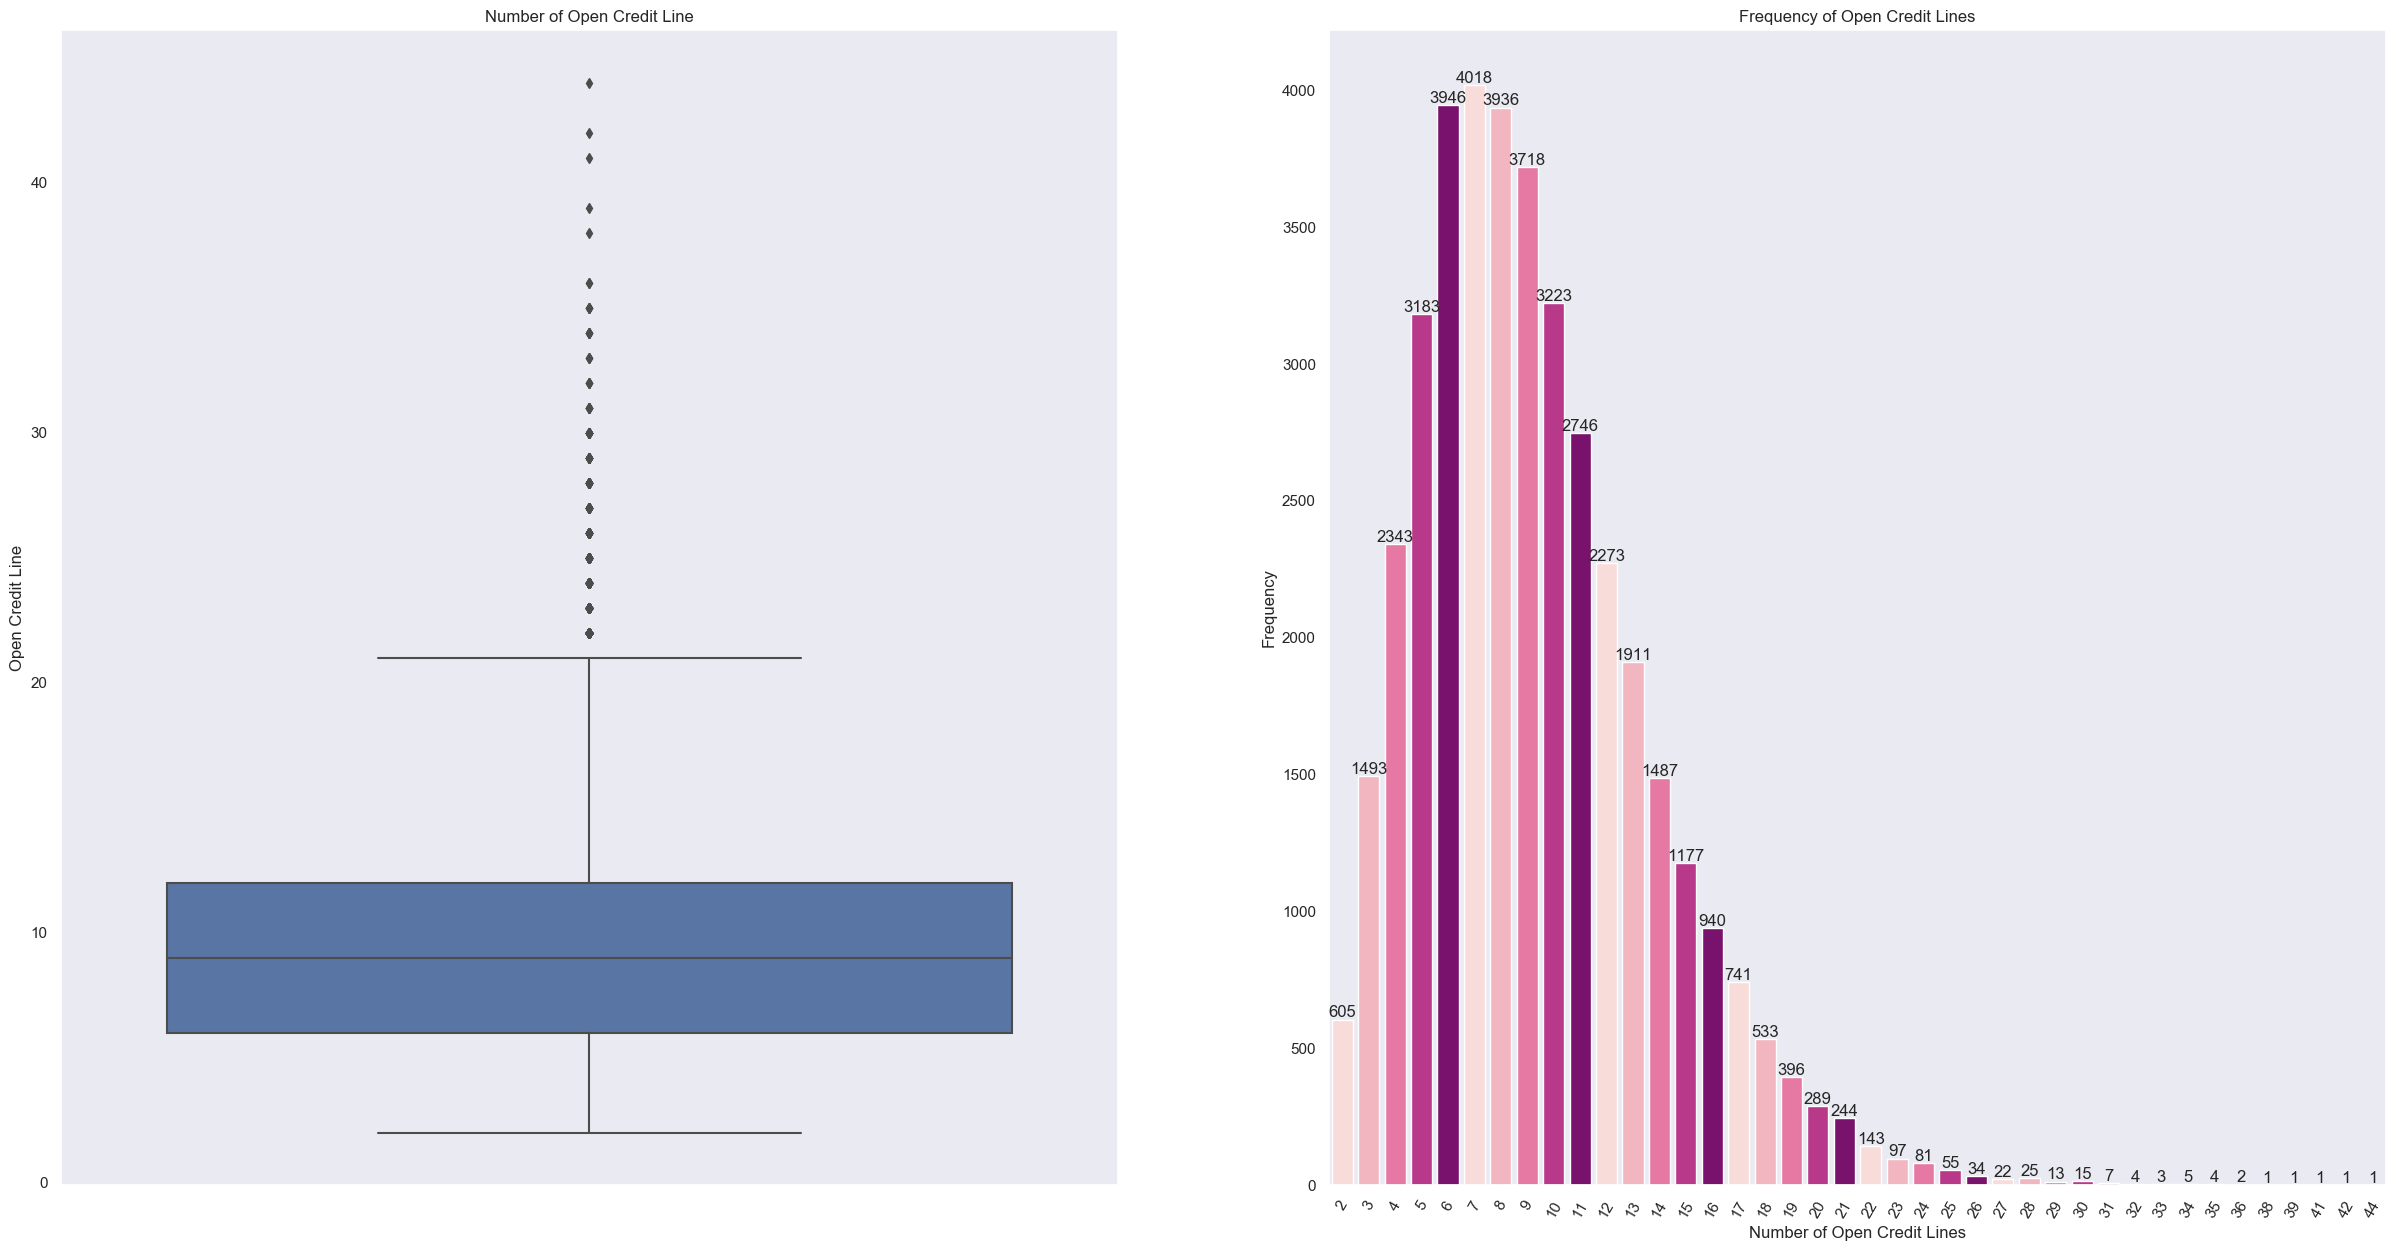

In [121]:
# Number of open credit lines in the borrower's credit file(open_acc)
sbn.set(font_scale=1)
sbn.set_style("dark")
mpt.figure(figsize=(30, 15))
mpt.subplot(1,2,1)
sbn.boxplot(y=loan_main_df['open_acc'])
mpt.ylabel('Open Credit Line')
mpt.title('Number of Open Credit Line')
mpt.subplot(1,2,2)
open_acc_values = pd.DataFrame(loan_main_df['open_acc'].value_counts())
ab = sbn.barplot(x=open_acc_values.index, y="open_acc", data=open_acc_values, palette=sbn.color_palette("RdPu", 5))
annotations(ab,5,0)
mpt.xlabel("Number of Open Credit Lines")
mpt.ylabel("Frequency")
mpt.title('Frequency of Open Credit Lines')
mpt.xticks(rotation=60)
mpt.show()

In [122]:
#Lets look the outliers with the loan status where number of Credit Lined greater than 20.
# The aim is to check if the outliers all are in Charged off category.
loan_main_df[loan_main_df.open_acc > 20].groupby(by='loan_status').agg({'loan_status':'count','open_acc':'mean'})

,loan_status,open_acc
loan_status,,
Charged Off,117,24.01
Current,29,23.00
Fully Paid,613,23.46


There are customers with higher open_acc as part of all three categories. We will further look at this in bivariate analysis.

#### Insights:
- open_acc values seems equally distributed along the median(9) for 25-75 percentile with some outliers

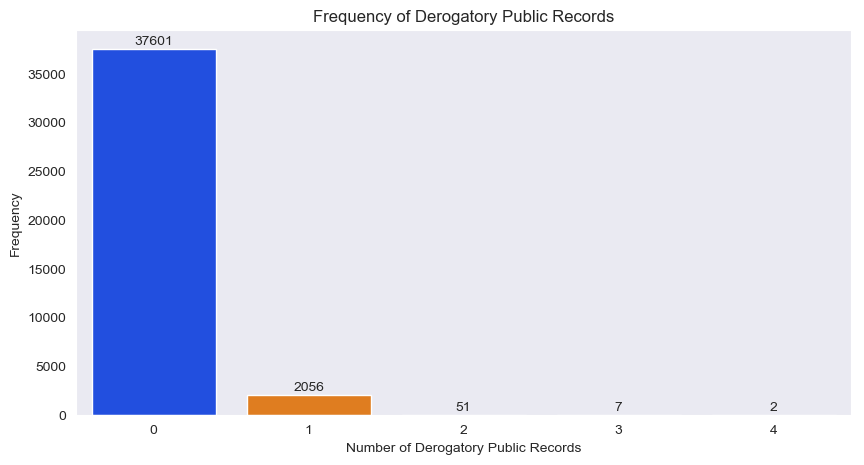

In [123]:
# Number of derogatory public records(pub_rec)
# Public records and collections are derogatory items in credit report because they all reflect financial obligations
# that were not paid as agreed
mpt.rcdefaults()
sbn.set_style("dark")
mpt.figure(figsize=(10,5))
p_rec_vals = pd.DataFrame(loan_main_df['pub_rec'].value_counts())
ab = sbn.barplot(x=p_rec_vals.index, y="pub_rec", data=p_rec_vals, palette=sbn.color_palette("bright",15))
annotations(ab,5,0)#
mpt.xlabel("Number of Derogatory Public Records")
mpt.ylabel("Frequency")
mpt.title("Frequency of Derogatory Public Records")
mpt.show()

#### Insights:
- Most of the pub_rec values are 0.There are outliers in the  column and the max value is 4.

In [124]:
loan_main_df.groupby(by='loan_status').agg({'loan_status':'count','pub_rec':'mean'})
# This shows that Charged off customers have higher pub_rec on average.

,loan_status,pub_rec
loan_status,,
Charged Off,5627,0.08
Current,1140,0.04
Fully Paid,32950,0.05


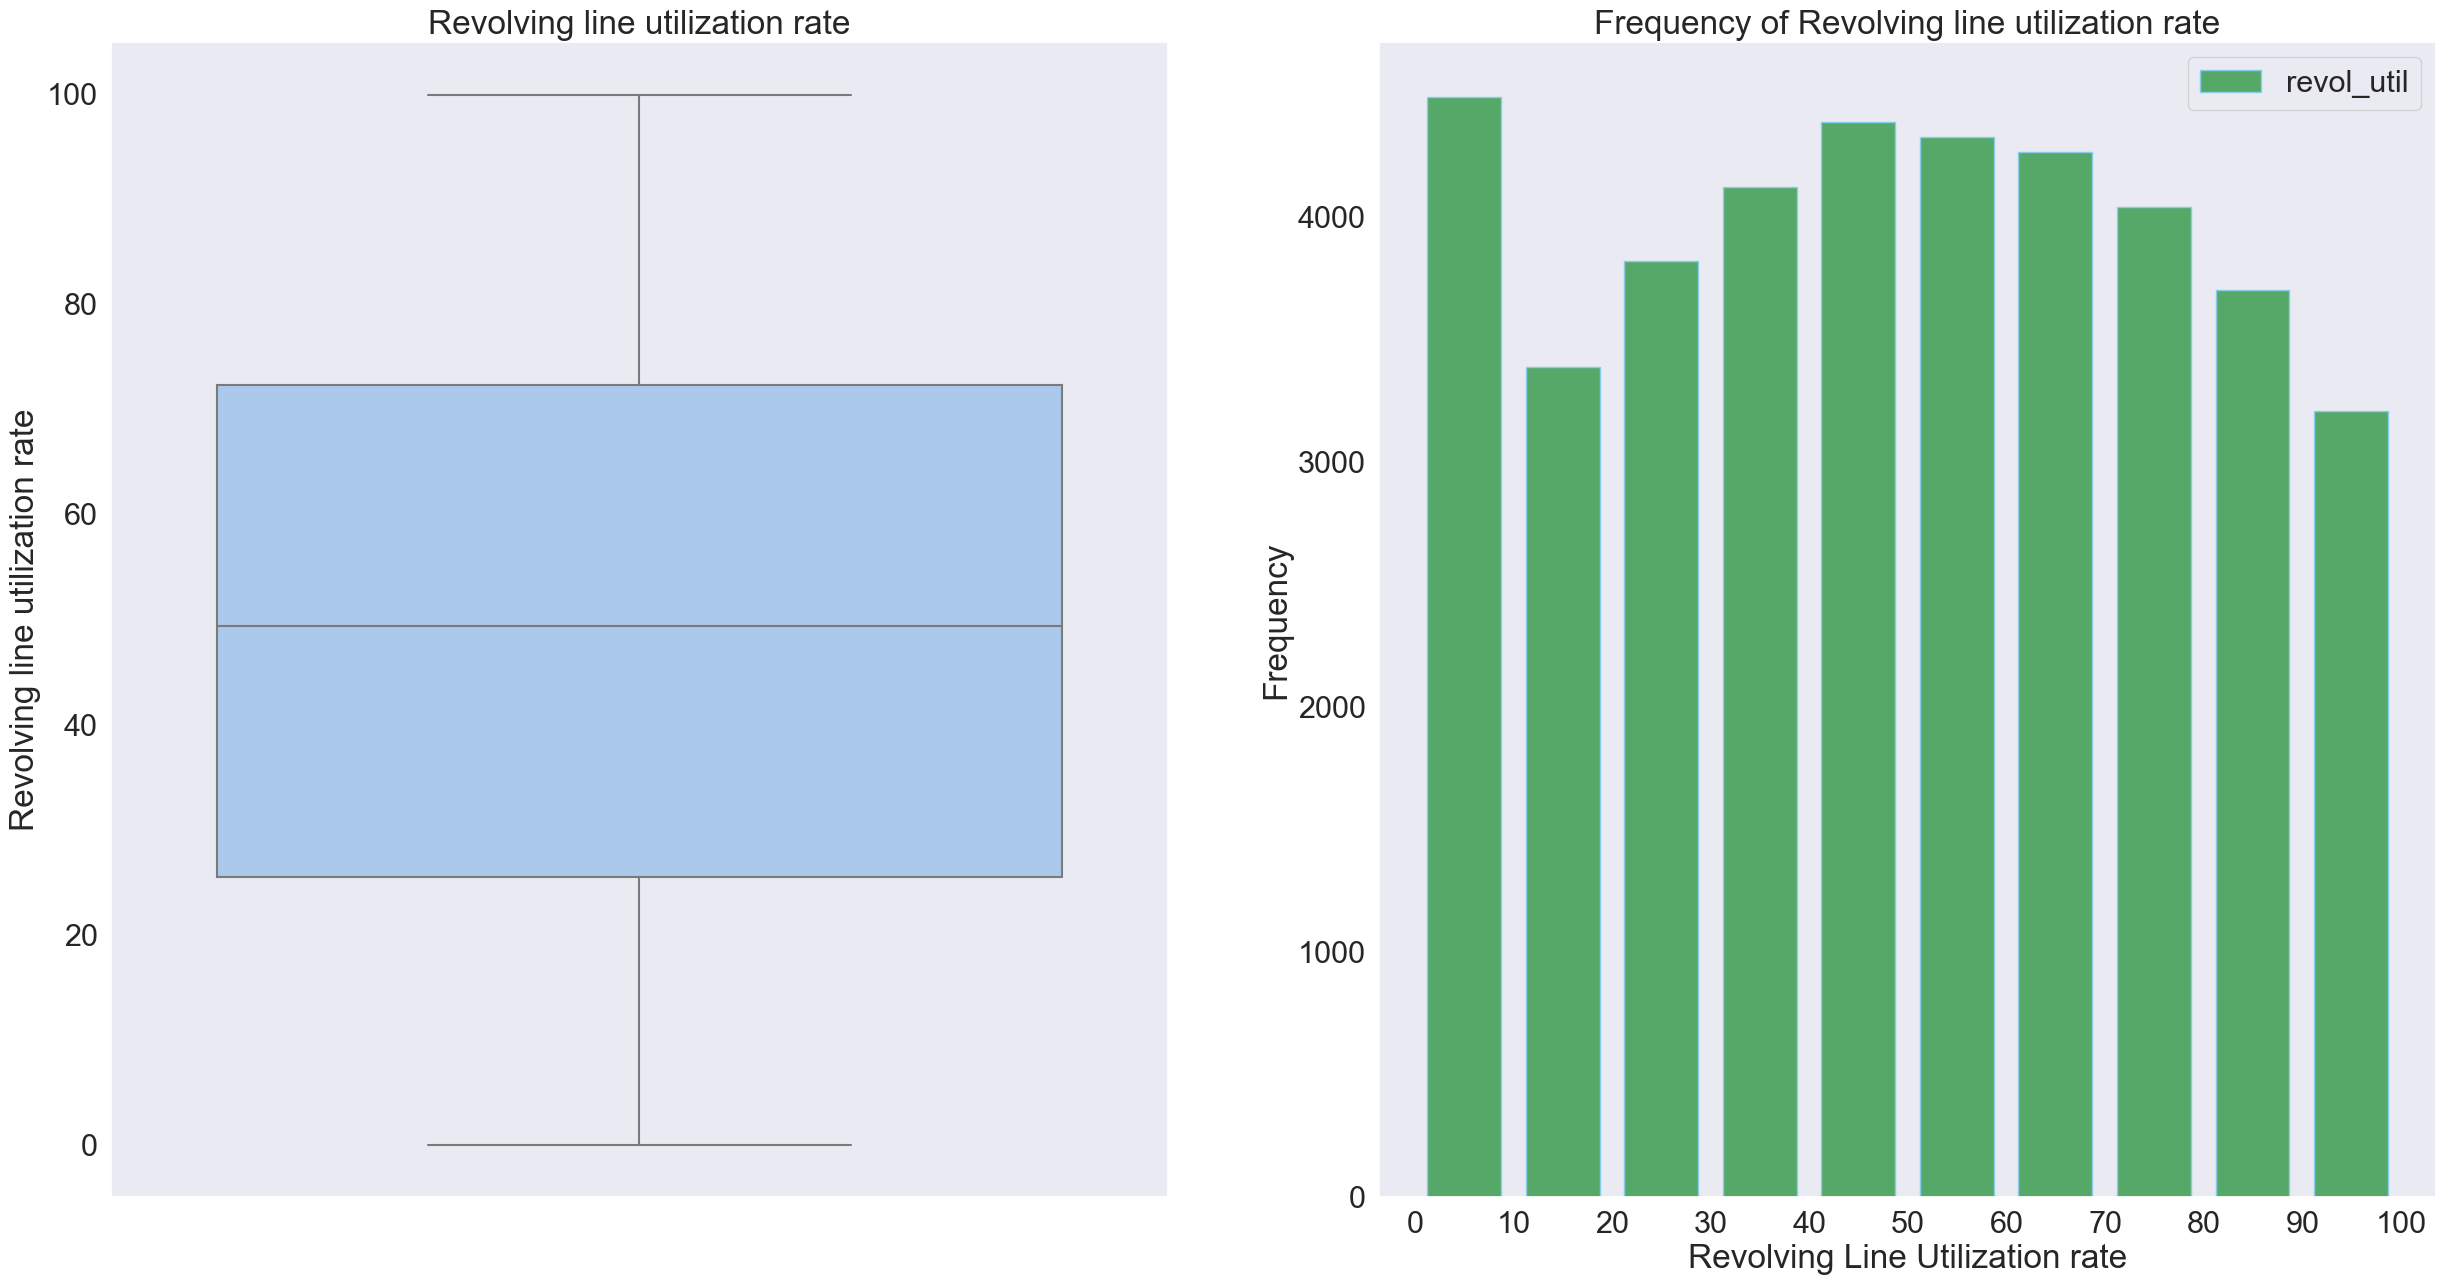

In [125]:
#Revolving line utilization rate(revol_util)
mpt.rcdefaults()
sbn.set(font_scale=2)
sbn.set_style("dark")
mpt.figure(figsize=(30, 15))
mpt.subplot(1,2,1)
sbn.boxplot(y=loan_main_df['revol_util'], palette='pastel')
mpt.ylabel('Revolving line utilization rate')
mpt.title('Revolving line utilization rate')
mpt.subplot(1,2,2)
revol_util = loan_main_df['revol_util']
legend = ['revol_util']
mpt.hist([revol_util], color = "g", ec="skyblue", bins=10, rwidth=0.75)
mpt.xlabel("Revolving Line Utilization rate")
mpt.ylabel("Frequency")
mpt.xticks(np.arange(min(revol_util), max(revol_util)+10, 10))
mpt.legend(legend)
mpt.title('Frequency of Revolving line utilization rate')
mpt.show()

In [126]:
loan_main_df.groupby(by='loan_status').agg({'loan_status':'count','revol_util':'mean'})
# Charged Off customers have higher revoling credit utilization

,loan_status,revol_util
loan_status,,
Charged Off,5627,55.55
Current,1140,53.20
Fully Paid,32950,47.53


#### Insights
- 'revol_util' values are equally distributed along the median between 25-75 percentile with max value near 100,
	and maximum borrowers having revolving credit utilisation rate in between 0-10%.

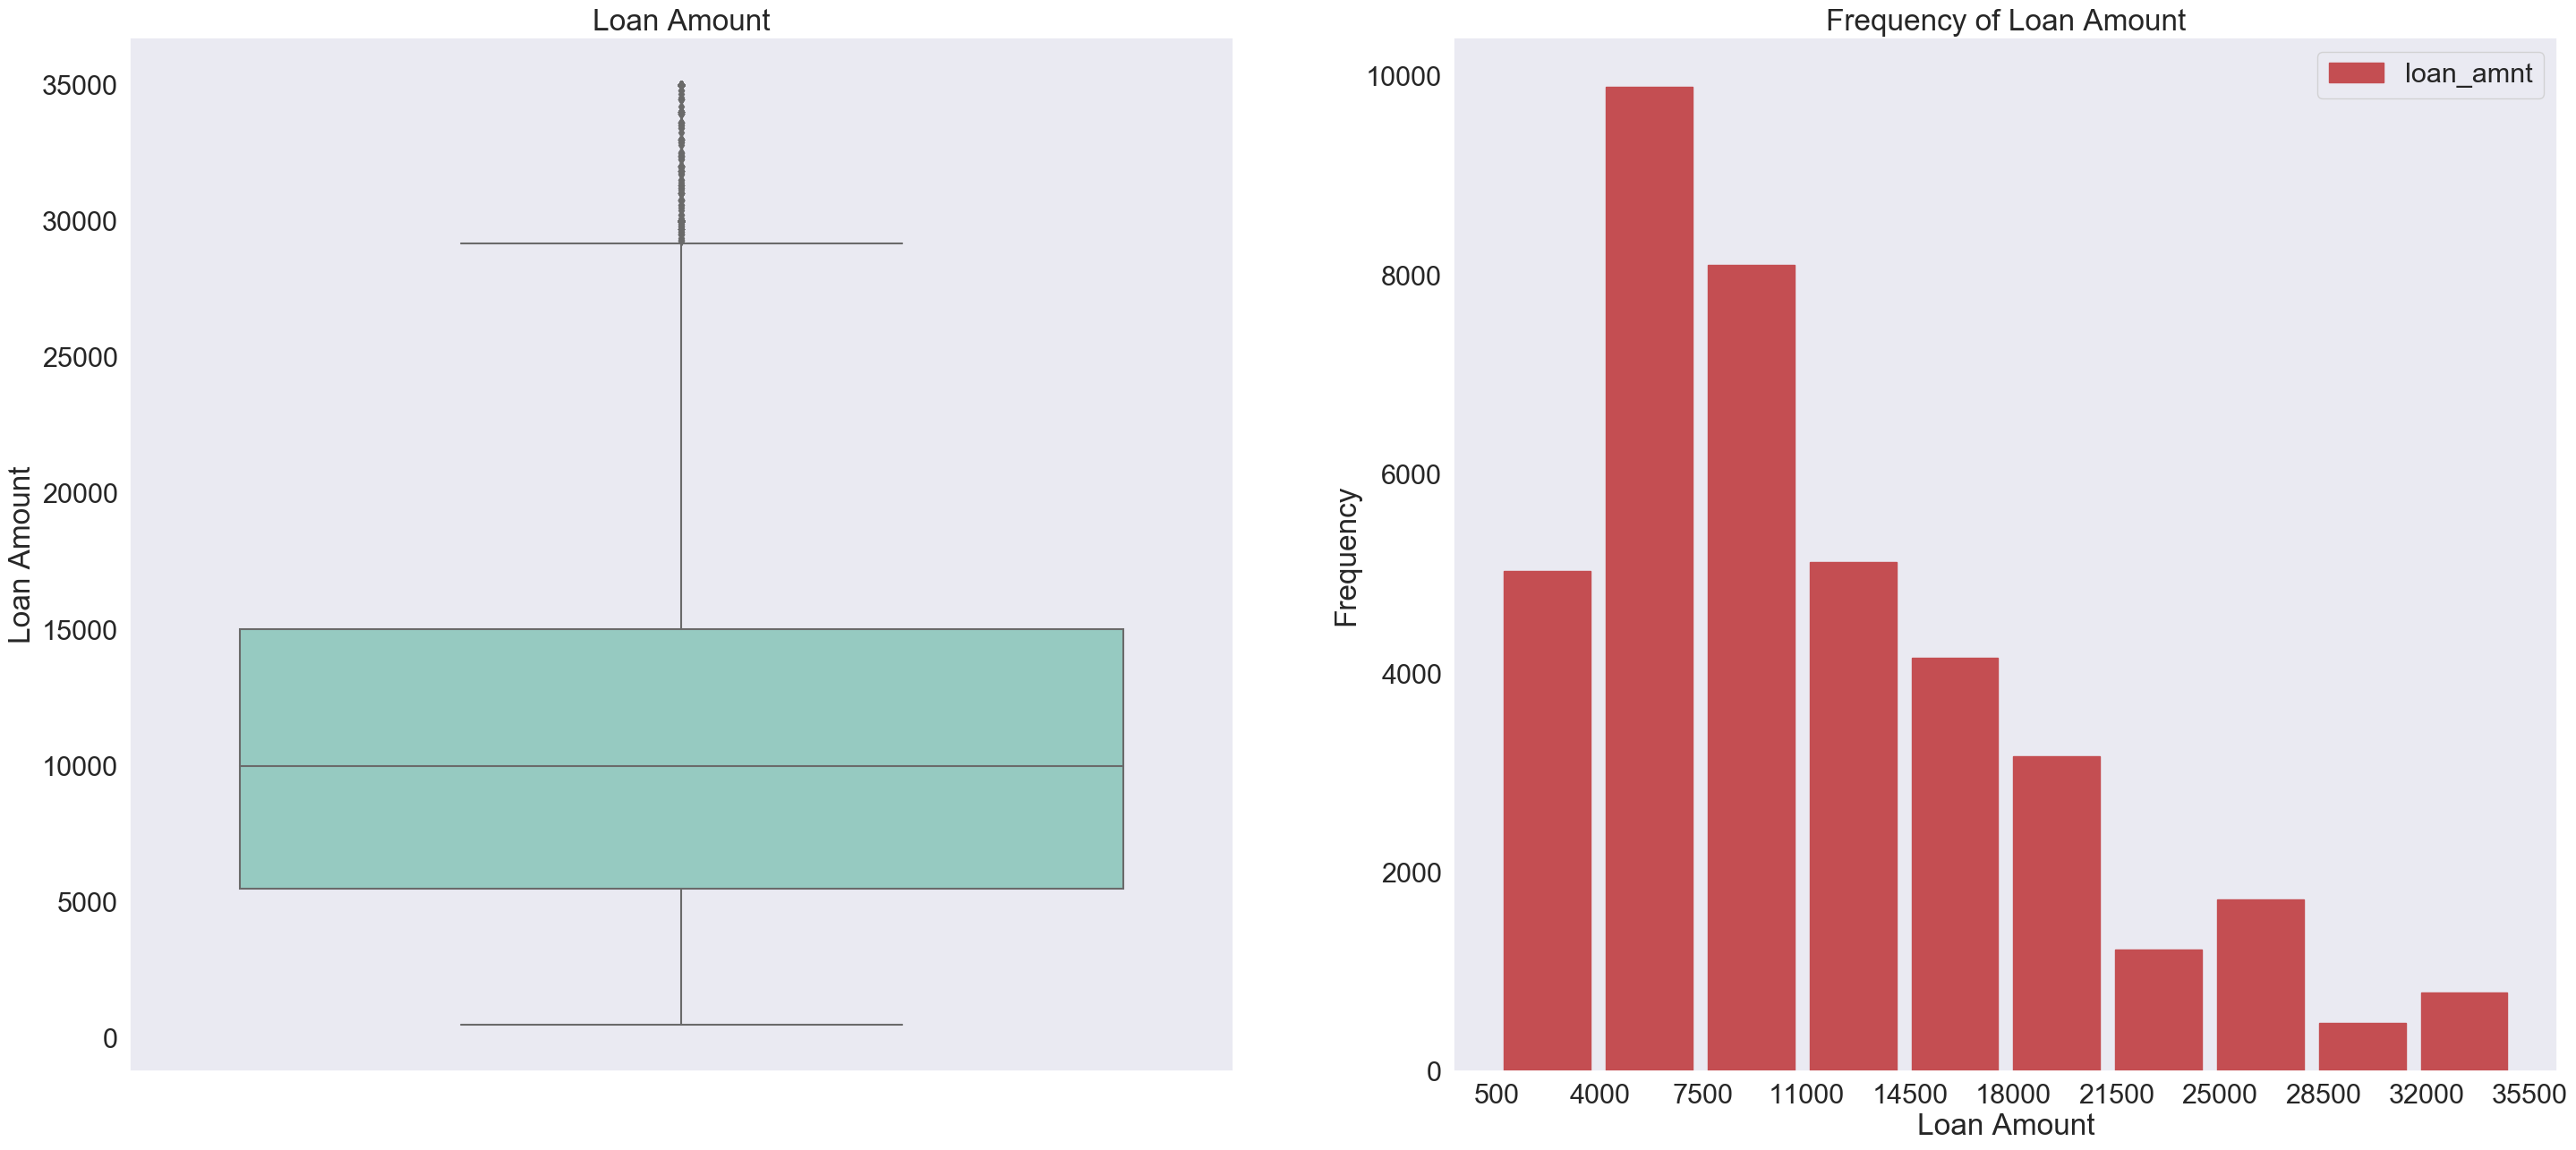

loan amount
Mean = 11219.443814991062
Median = 10000.0
Mode = 0              10,000.00
dtype: float64


In [127]:
# Plotting the distribution plot of loan_amnt to visualise their distribution
#-------------------------------------------------------------------
# The Variable loan_amnt quantitative variables
mpt.rcdefaults()
sbn.set(font_scale=2)
sbn.set_style("dark")
mpt.figure(figsize=(35, 15))
mpt.subplot(1,2,1)
sbn.boxplot(y=loan_main_df['loan_amnt'], palette="Set3")
mpt.ylabel('Loan Amount')
mpt.title('Loan Amount')
mpt.subplot(1,2,2)
loan_amnt = loan_main_df['loan_amnt']
legend = ['loan_amnt']
mpt.hist([loan_amnt], color = "r", ec="r", bins=10, rwidth=0.85)
mpt.xlabel("Loan Amount")
mpt.ylabel("Frequency")
mpt.xticks(np.arange(min(loan_amnt), max(loan_amnt)+3500, 3500), rotation=0)
mpt.legend(legend)
mpt.title('Frequency of Loan Amount')
mpt.show()

print('loan amount')
print('Mean =',  loan_main_df.loan_amnt.mean())
print('Median =',  loan_main_df.loan_amnt.median())
print('Mode =',  loan_main_df.loan_amnt.mode())

In [128]:
loan_main_df.groupby(by='loan_status').agg({'loan_status':'count','loan_amnt':'mean'})
# Average loan amount of charged off customers is higher than fully paid but lower than changed off

,loan_status,loan_amnt
loan_status,,
Charged Off,5627,"12,104.39"
Current,1140,"17,053.99"
Fully Paid,32950,"10,866.46"


#### Insights:
- The 'Loan Amount' most frequently taken is between 4000 to 7500 Dollars. But there are clearly some outliers above 98 percentile
- Charged Off customer average loan amount is higher than the Fully Paid customers. However, Current is even higher. This kind of indicates that there might be high risk loans in the Current category. They just didnt default yet but the time this data is extracted.

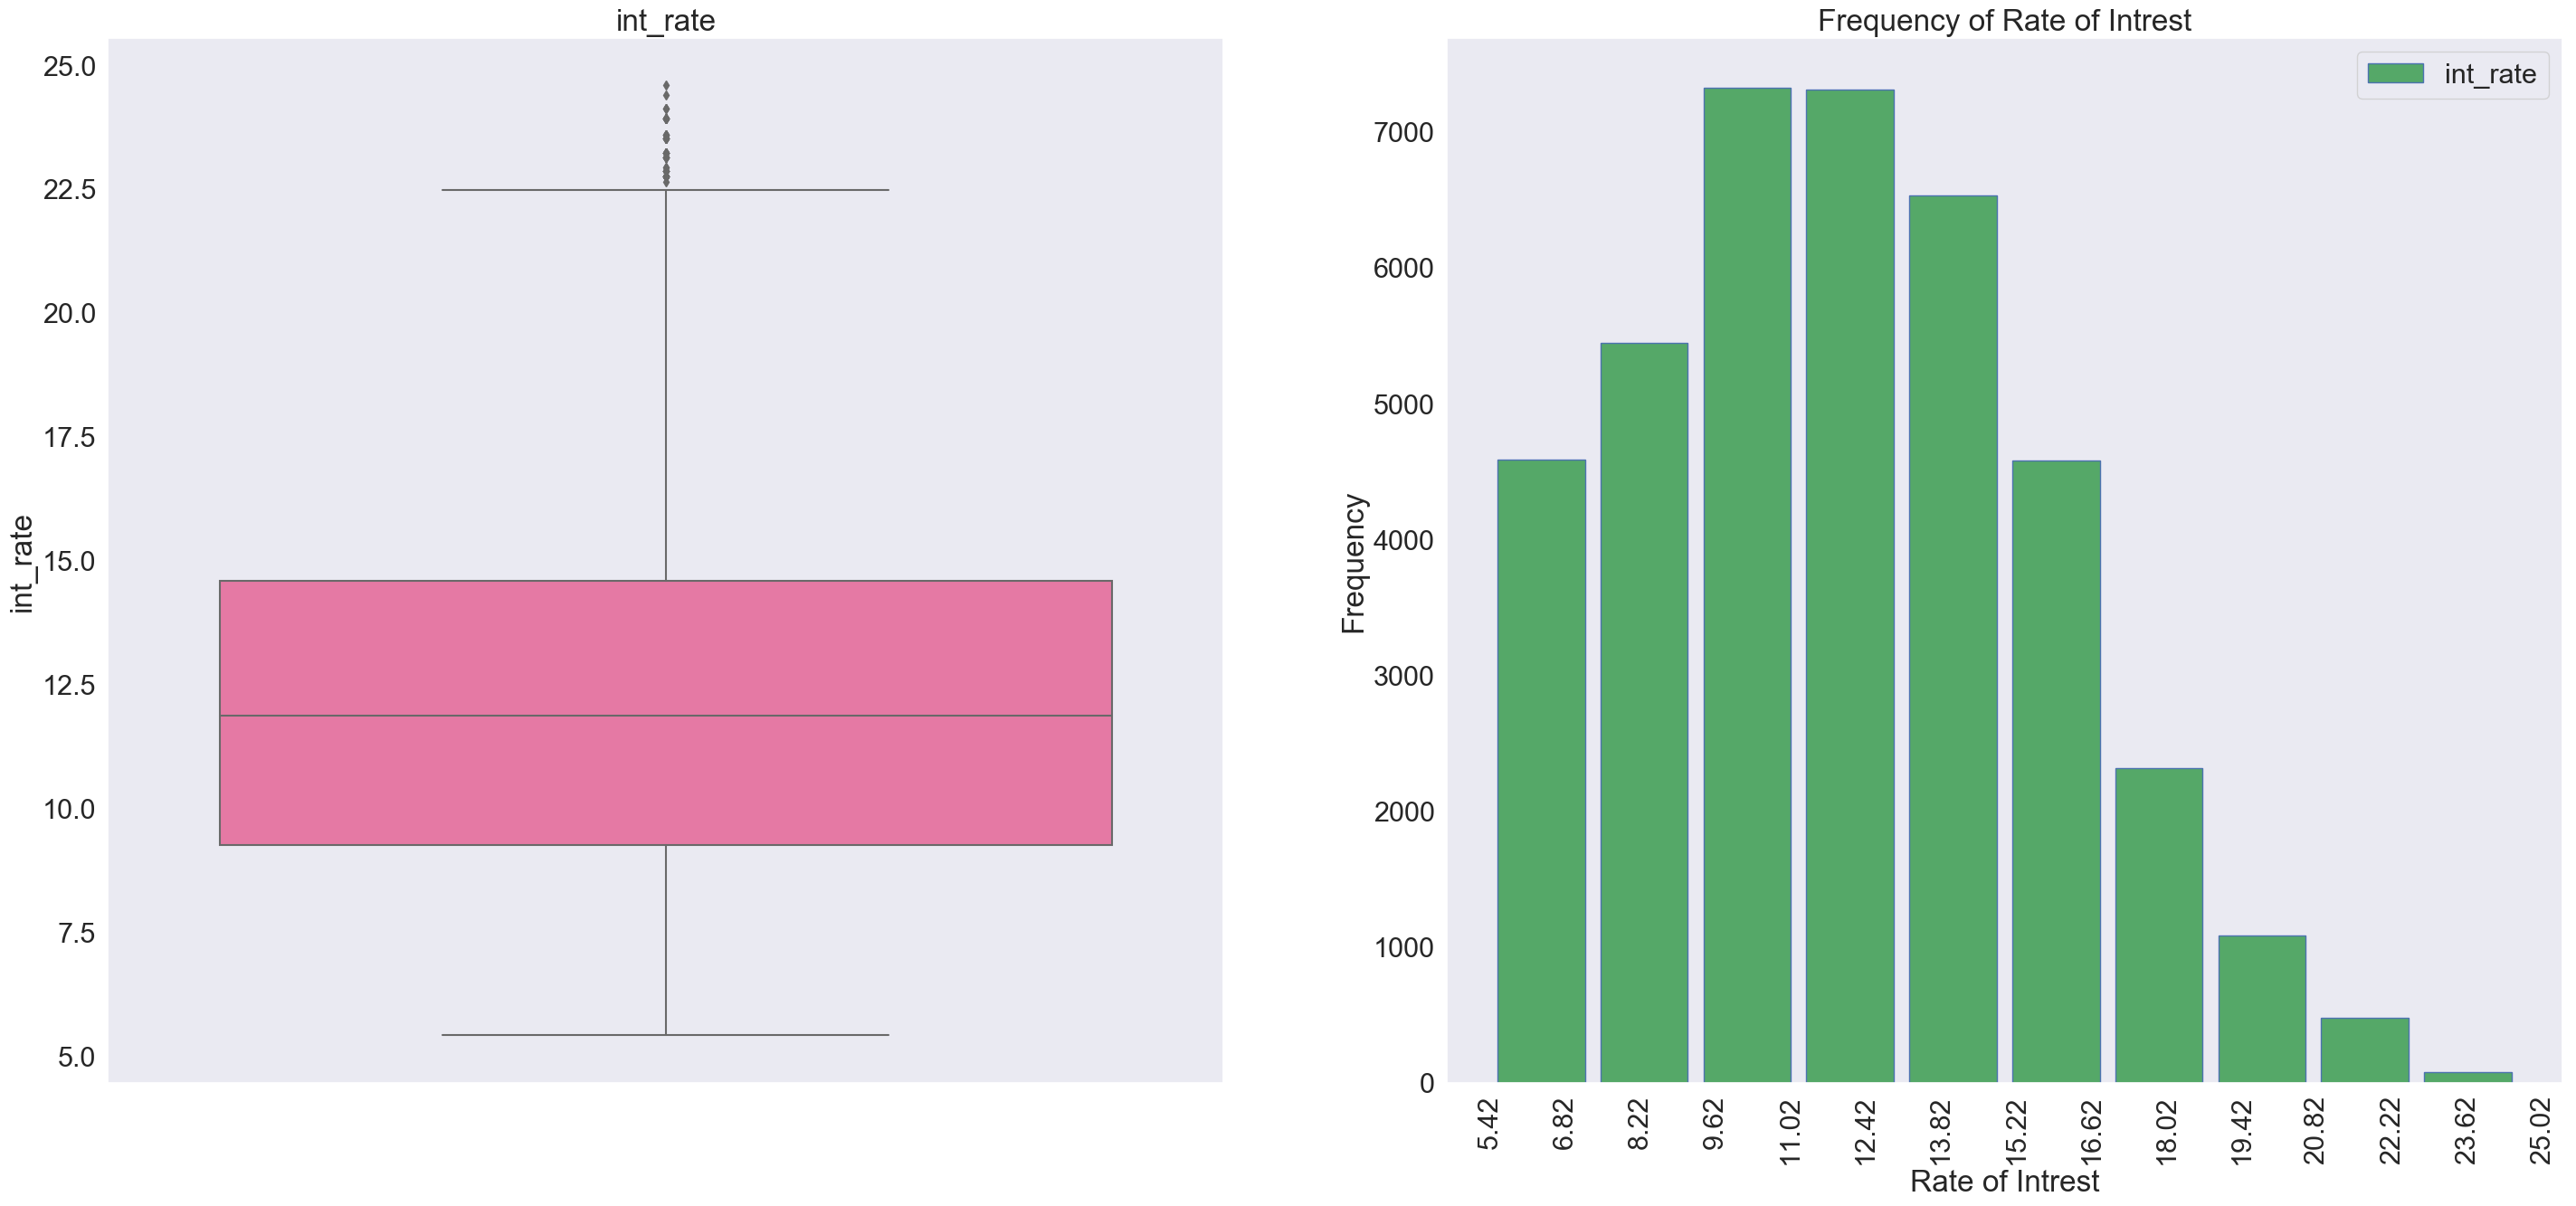

Rate of Intrest
Mean of int_rate =  12.02
Median of int_rate =  11.86
Mode of int_rate =  0                  10.99
dtype: float64


In [129]:
# Analysis of quantitative variable int_rate
mpt.rcdefaults()
sbn.set(font_scale=2)
sbn.set_style("dark")
mpt.figure(figsize=(35, 15))
mpt.subplot(1,2,1)
sbn.boxplot(y=loan_main_df['int_rate'], palette="RdPu")
mpt.ylabel('int_rate')
mpt.title('int_rate')
mpt.subplot(1,2,2)
int_rate = loan_main_df['int_rate']
legend = ['int_rate']
mpt.hist([int_rate], color = "g", ec="b", bins=10, rwidth=0.85)
mpt.xlabel("Rate of Intrest")
mpt.ylabel("Frequency")
mpt.xticks(np.arange(min(int_rate), max(int_rate)+1.4, 1.4), rotation=90)
mpt.legend(legend)
mpt.title('Frequency of Rate of Intrest')
mpt.show()

print('Rate of Intrest')
print('Mean of int_rate = ', round(loan_main_df.int_rate.mean(), 2))
print('Median of int_rate = ', loan_main_df.int_rate.median())
print('Mode of int_rate = ', loan_main_df.int_rate.mode())

In [130]:
loan_main_df.groupby(by='loan_status').agg({'loan_status':'count','int_rate':'mean'})
# Average interest rates of 'Charged Off' is higher than 'Fully Paid'

,loan_status,int_rate
loan_status,,
Charged Off,5627,13.82
Current,1140,15.03
Fully Paid,32950,11.61


#### Insights:
- From the above plot most frequent Interest rate is between 10.7% to 11.86% . But there are clearly some outliers above 98 percentile.
- Charged Off customer have a higher interest rate than the Fully Paid. Another point to note is Current customer average interest rate is higher, that means may be there are higher risk loans in Current status as well. 

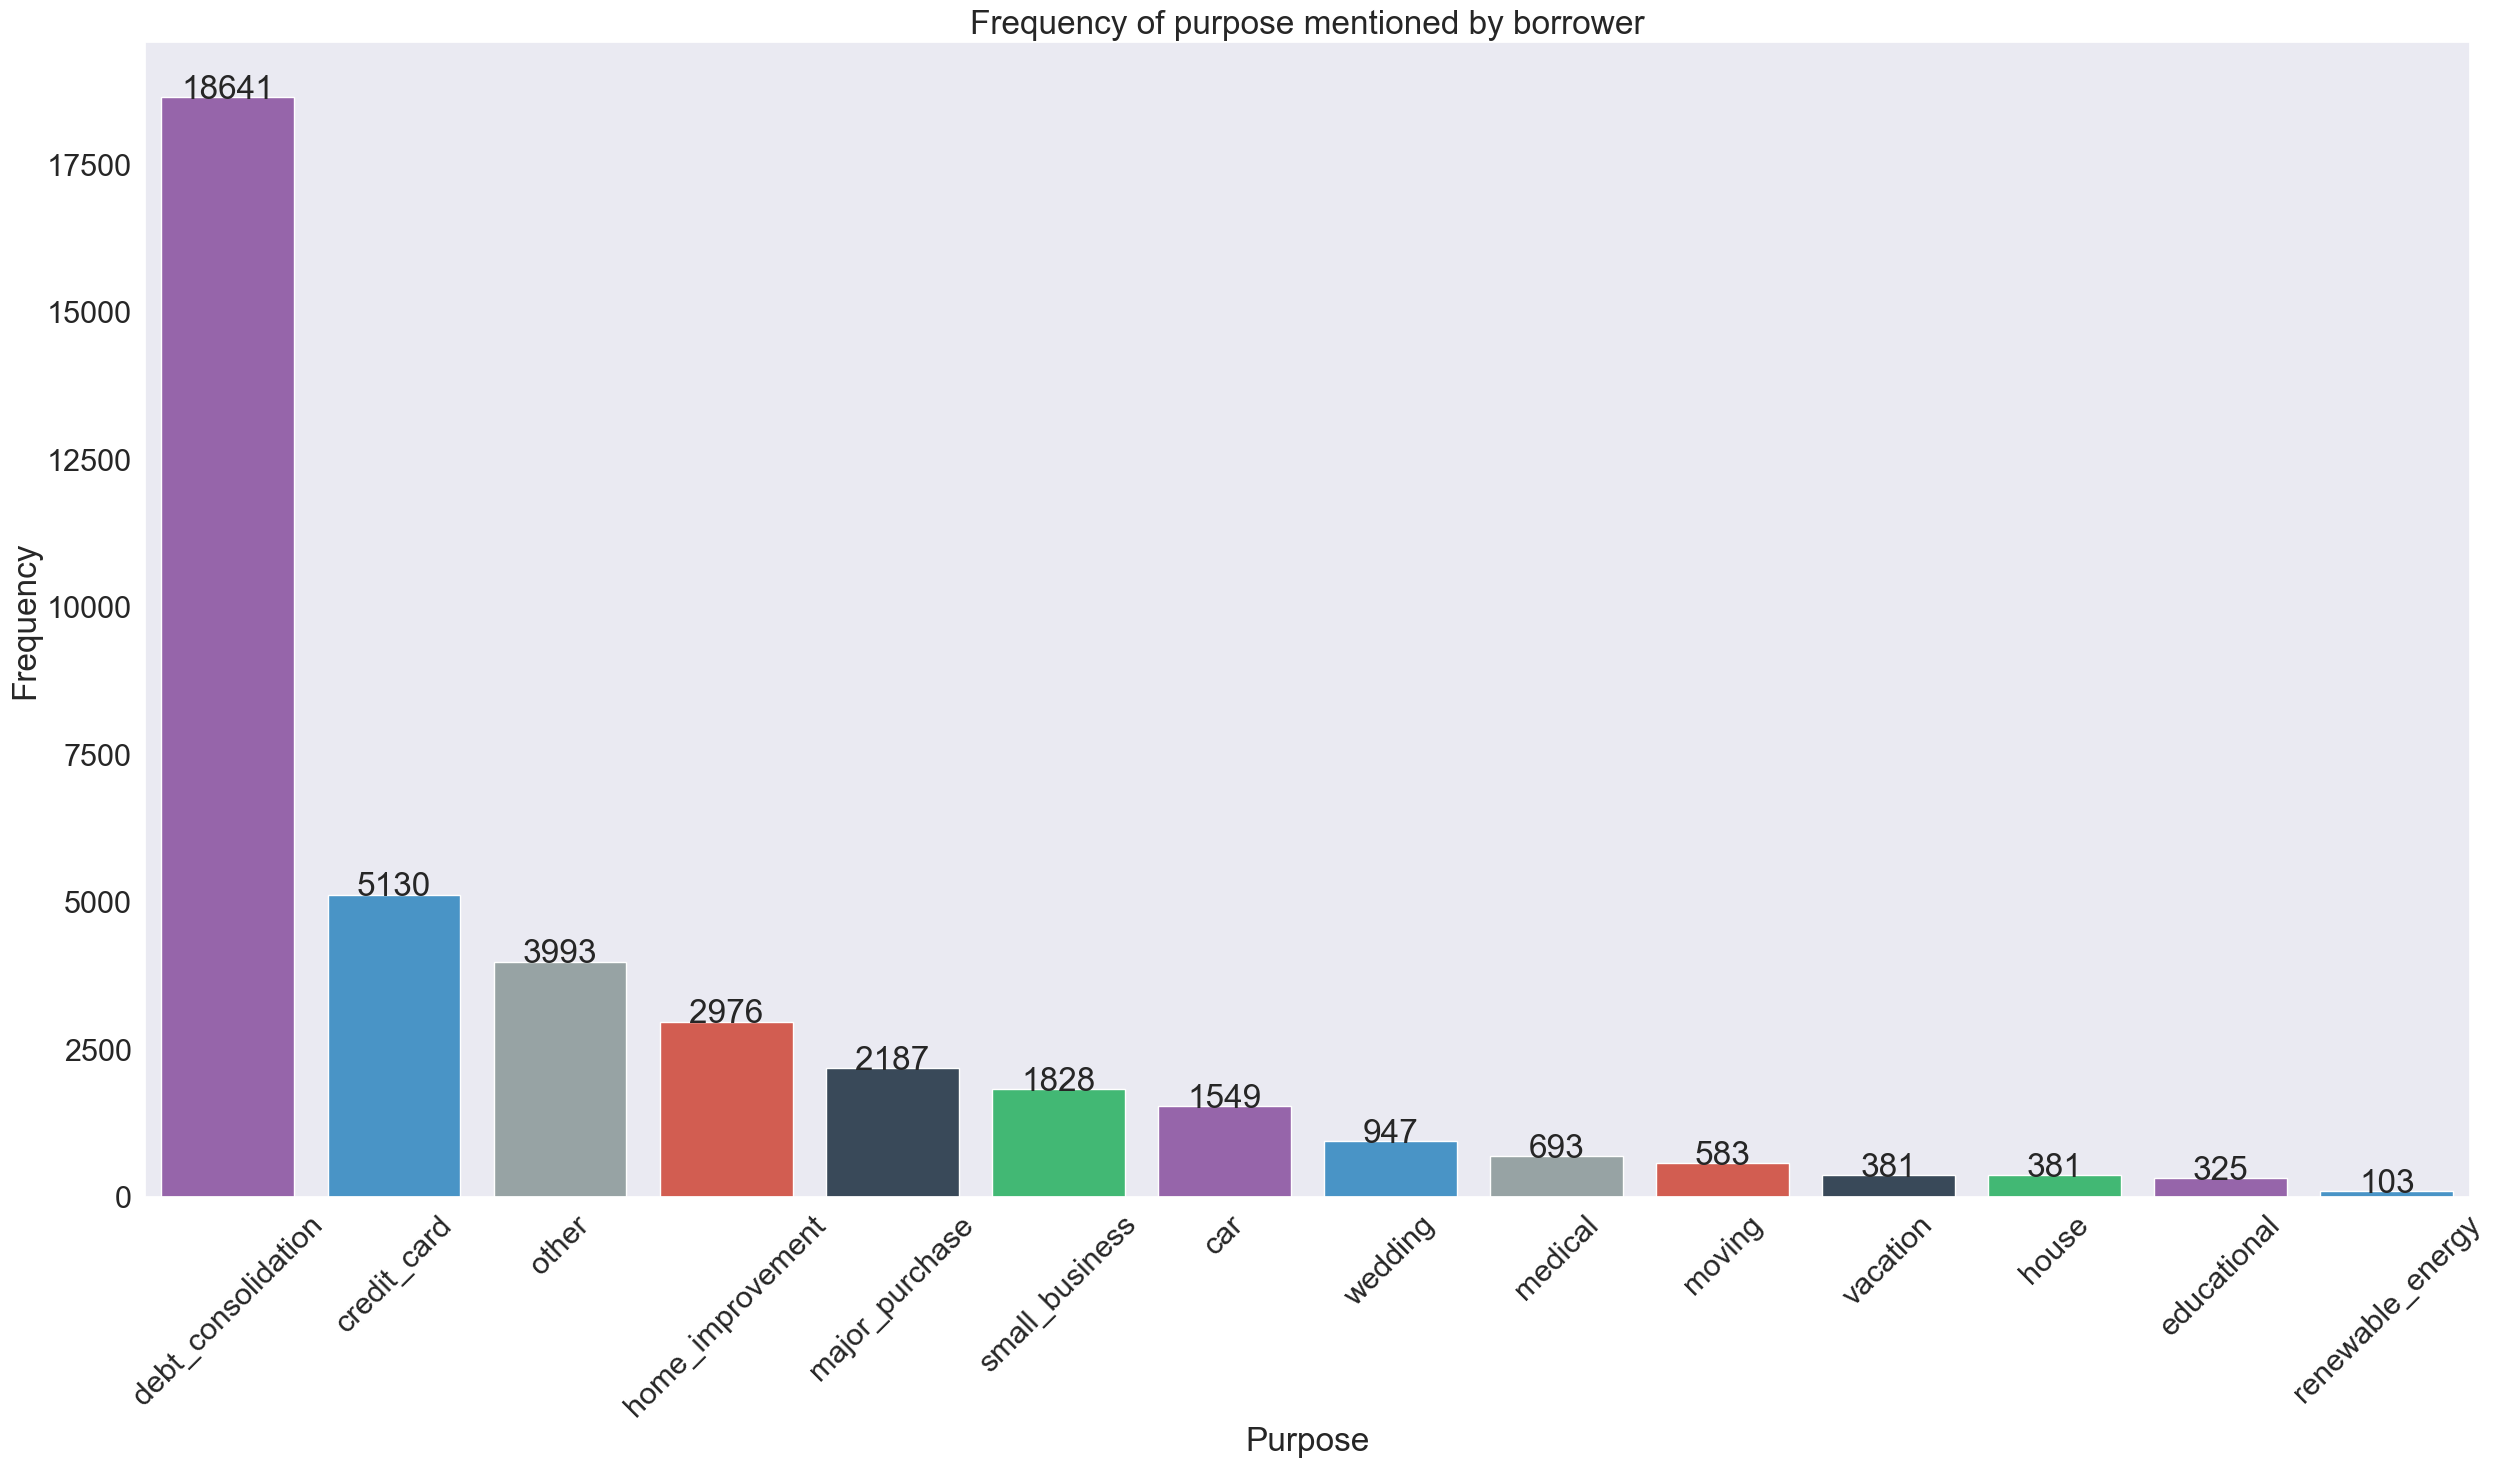

In [131]:
# Analysis of purpose for taking loan given by the borrower
# The Variable purpose is an Unordered Categorical Variable
sbn.set(font_scale=2)
sbn.set_style("dark")
mpt.figure(figsize=(30, 15))
mpt.title('Frequency of purpose mentioned by borrower')
purpose = pd.DataFrame(loan_main_df['purpose'].value_counts())
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
ab = sbn.barplot(x=purpose.index, y="purpose", data=purpose, palette=sbn.color_palette(flatui))
ab.set_xticklabels(ab.get_xticklabels(), rotation=45)
annotations(ab,5,0)
mpt.xlabel("Purpose")
mpt.ylabel("Frequency")
mpt.show()

In [132]:
pd.pivot_table(loan_main_df[['loan_status', 'purpose']], columns=['loan_status'], index='purpose', aggfunc={'purpose':'count'})

purpose                       \
loan_status                 Charged Off              Current   
purpose                                                        
car                              160.00                50.00   
credit_card                      542.00               103.00   
debt_consolidation             2,767.00               586.00   
educational                       56.00                  nan   
home_improvement                 347.00               101.00   
house                             59.00                14.00   
major_purchase                   222.00                37.00   
medical                          106.00                12.00   
moving                            92.00                 7.00   
other                            633.00               128.00   
renewable_energy                  19.00                 1.00   
small_business                   475.00                74.00   
vacation                          53.00                 6.00   
wedding                           96.00                21.00   

                                         
loan_status                  Fully Paid  
purpose                                  
car                            1,339.00  
credit_card                    4,485.00  
debt_consolidation            15,288.00  
educational                      269.00  
home_improvement               2,528.00  
house                            308.00  
major_purchase                 1,928.00  
medical                          575.00  
moving                           484.00  
other                          3,232.00  
renewable_energy                  83.00  
small_business                 1,279.00  
vacation                         322.00  
wedding                          830.00

#### Insights:
- Most of the loans are taken for debt Consolidation.
- One interesting fact is that if people are taking for debt consolidation, the interest rate at which they are taking should be lower than what they are paying. So we will further check in bivariate analysis comparing the reason and interest rate.

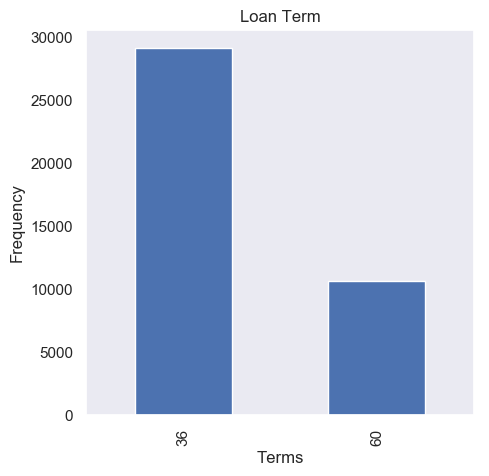

In [133]:
# Analysis of Term Column
mpt.rcdefaults()
sbn.set(font_scale=1)
sbn.set_style("dark")
mpt.figure(figsize=(5, 5))
mpt.xlabel("Terms")
mpt.ylabel("Frequency")
loan_main_df['term'].value_counts().plot.bar(title='Loan Term')

In [134]:
pd.pivot_table(loan_main_df[['loan_status', 'term']], index=['loan_status'], columns='term', aggfunc={'loan_status':'count'})

loan_status                     
term                          36                   60
loan_status                                          
Charged Off             3,227.00             2,400.00
Current                      nan             1,140.00
Fully Paid             25,869.00             7,081.00

**Insight** 
- 60 months terms seem to be more risky. All the current payers are in the 60 Months term.
- The current customers are all in 60 term, this is a sign of high risk loans, since most percent of loans taken in 60 month term go into charged off eventually.
- By this pivot table we can see that 3227 of 29096  are charged off in 36 term loan (11% aprox).
- 2400 are in charged off 9481 (25% aprrox). So the Current category is running at a high risk of getting into Charged off.


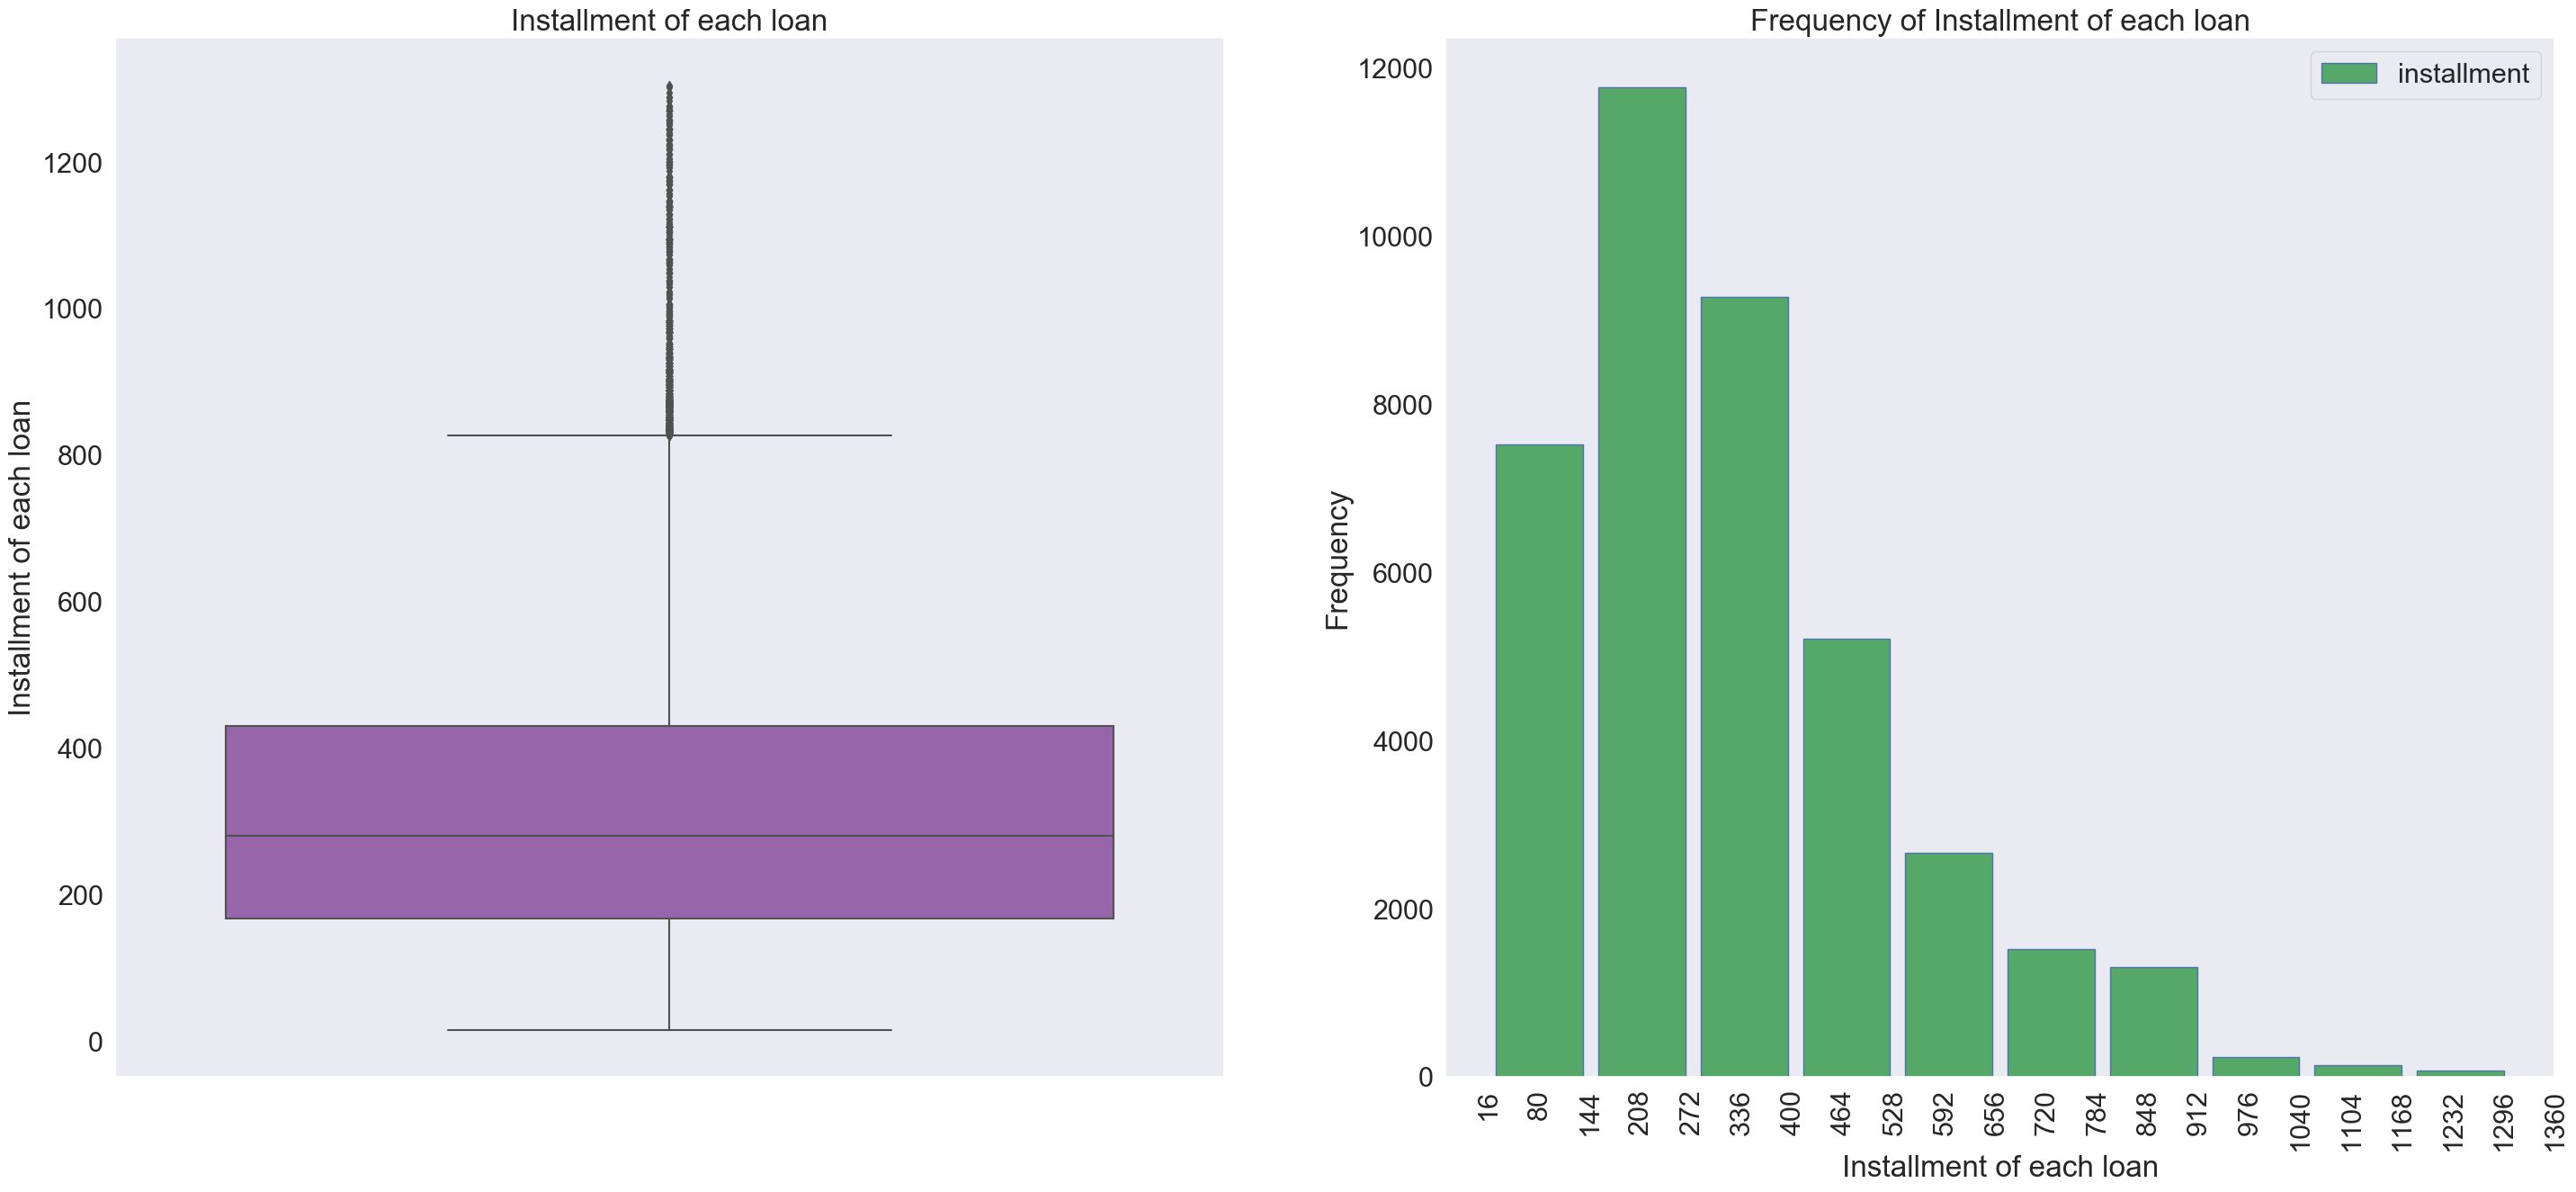

count              39,717.00
mean                  324.56
std                   208.87
min                    15.69
50%                   280.22
75%                   430.78
80%                   483.38
85%                   531.00
90%                   622.95
95%                   763.00
100%                1,305.19
max                 1,305.19
Name: installment, dtype: float64


In [135]:
# Analysis of Installment
mpt.rcdefaults()
sbn.set(font_scale=2)
sbn.set_style("dark")
mpt.figure(figsize=(35, 15))
mpt.subplot(1,2,1)
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sbn.boxplot(y=loan_main_df['installment'], palette=sbn.color_palette(flatui))
mpt.ylabel('Installment of each loan')
mpt.title('Installment of each loan')
mpt.subplot(1,2,2)
installment = loan_main_df['installment']
legend = ['installment']
mpt.hist([installment], color = "g", ec="b", bins=10, rwidth=0.85)
mpt.xlabel("Installment of each loan")
mpt.ylabel("Frequency")
mpt.xticks(np.arange(min(installment), max(installment)+64, 64), rotation=90)
mpt.legend(legend)
mpt.title('Frequency of Installment of each loan')
mpt.show()
print(loan_main_df['installment'].describe(percentiles=[0.75, 0.80, 0.85, 0.90, 0.95, 1]))

In [136]:
# Lets see if Installment amount above 800 has a impact in the loan status.
loan_main_df[loan_main_df.installment >=763.].groupby(by='loan_status').agg({'installment':['count','mean']})

installment                     
                  count                 mean
loan_status                                 
Charged Off         338               878.87
Current              77               849.72
Fully Paid         1571               884.67

#### Insights:
- From the above plot most frequent installment is between 144 to 272 . But there are clearly some outliers above 98 percentile.

On calculating mean of installment above 95th percentile the distribution is across all status so it is not directly dependent on installement.

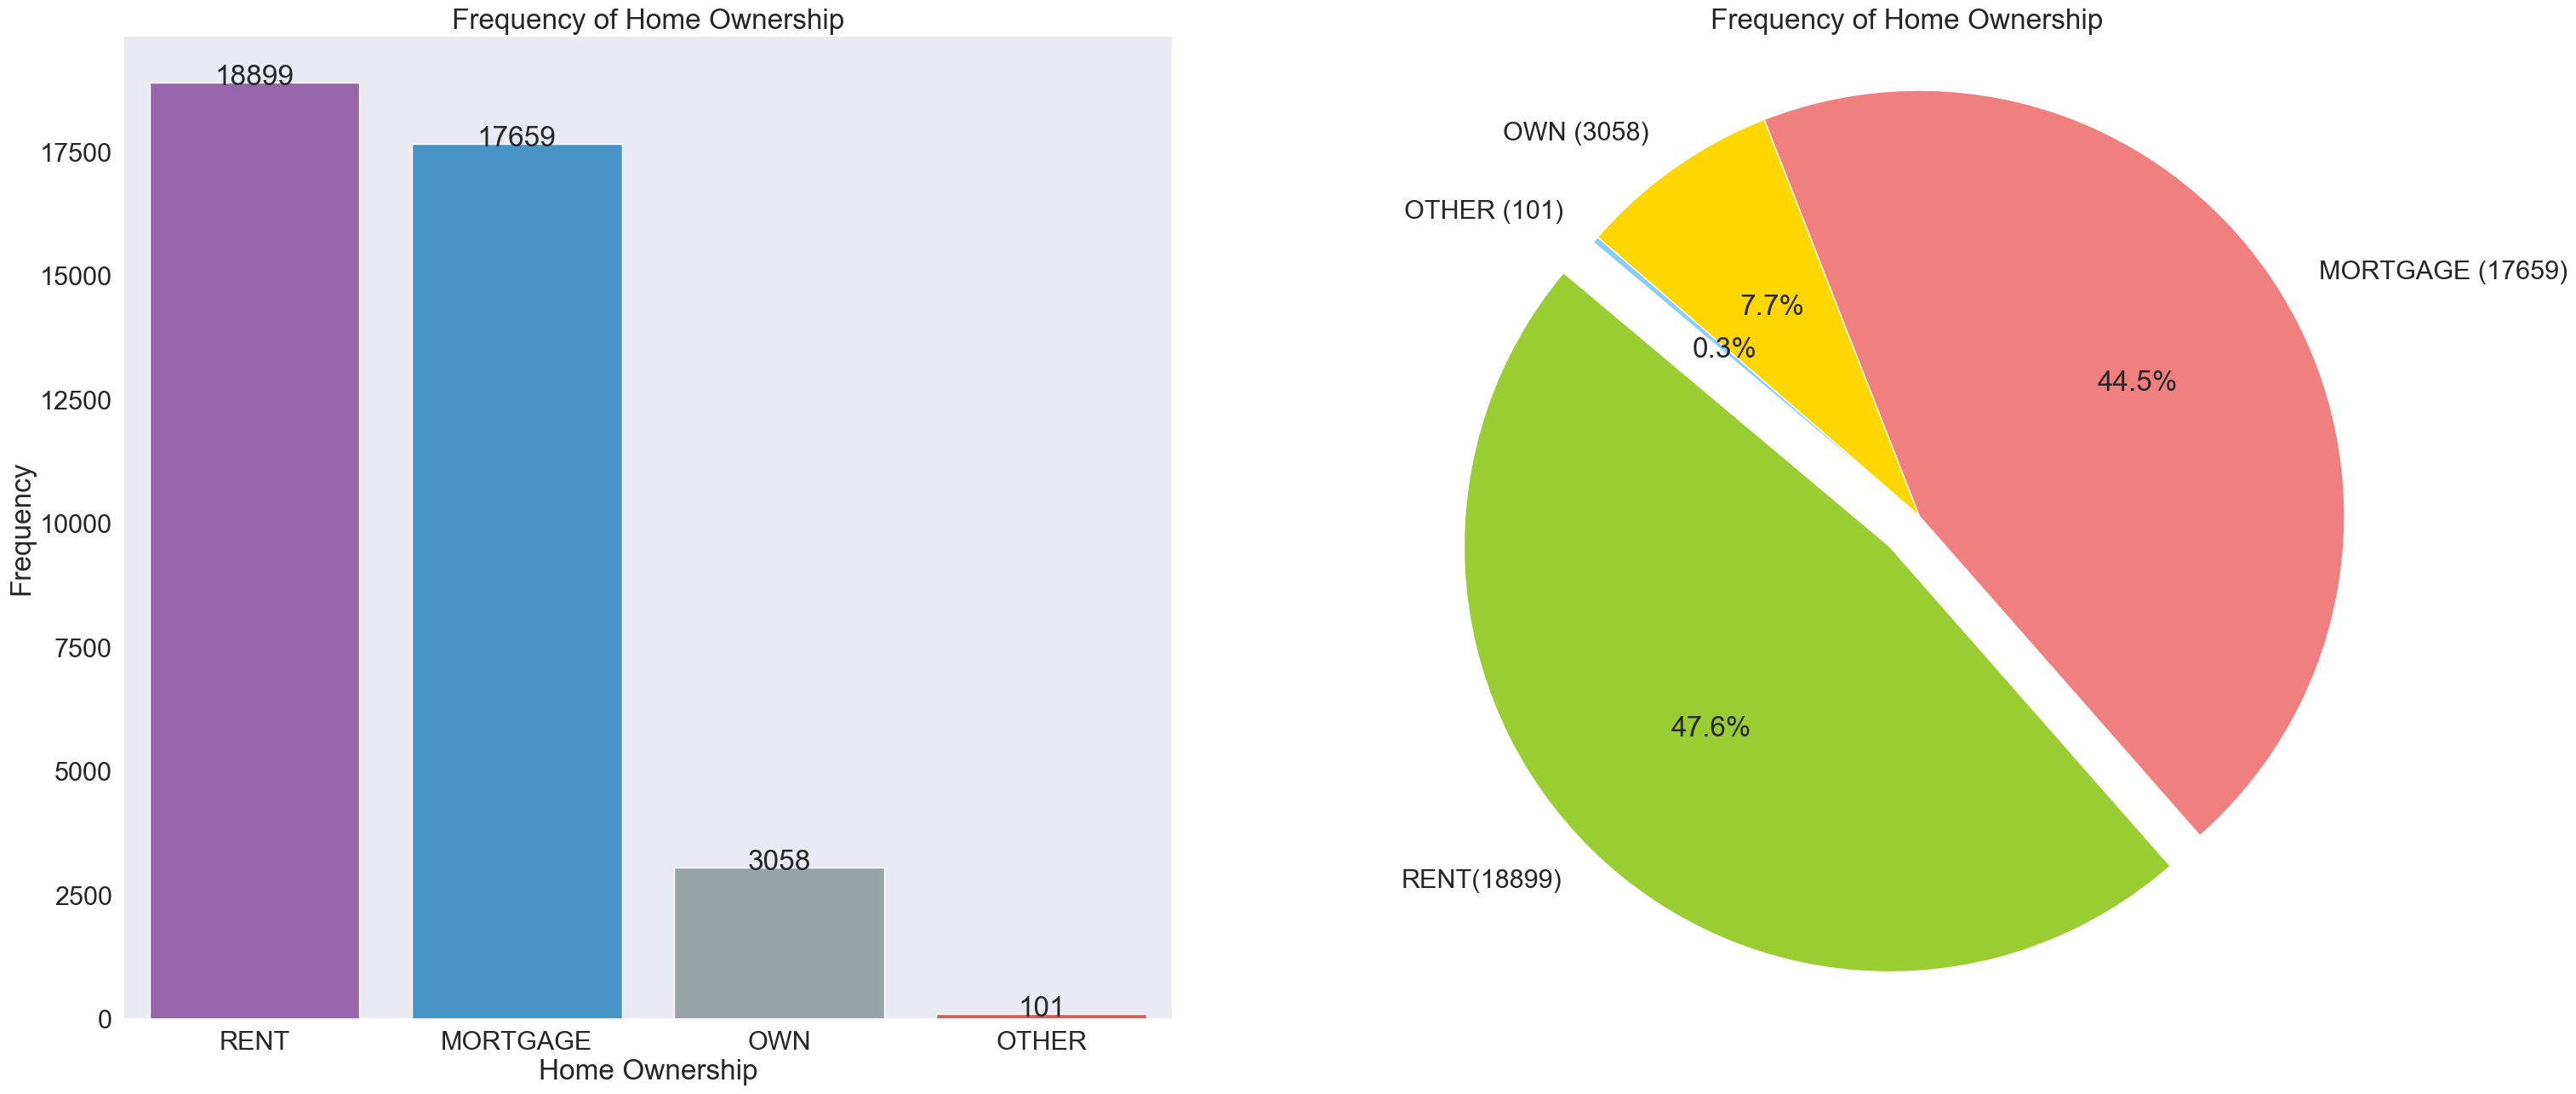

In [137]:
# Analysis of Home ownership variable
mpt.rcdefaults()
sbn.set(font_scale=2)
sbn.set_style("dark")
mpt.figure(figsize=(35, 15))
mpt.subplot(1,2,1)
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
home_ownership = loan_main_df["home_ownership"].value_counts()
ax = sbn.barplot(x=home_ownership.index, y=home_ownership, palette=sbn.color_palette(flatui))
annotations(ax,4,0)
#show_values_on_bars(ax)
mpt.xlabel("Home Ownership")
mpt.ylabel("Frequency")
mpt.title('Frequency of Home Ownership')

chart_label_home_ownership = [home_ownership.index[0] + "(" + str(home_ownership.iloc[0]) + ')',
                              home_ownership.index[1] + " (" + str(home_ownership.iloc[1]) + ')',
                              home_ownership.index[2] + " (" + str(home_ownership.iloc[2]) + ')',
                              home_ownership.index[3] + " (" + str(home_ownership.iloc[3]) + ')']
colors = ['yellowgreen', 'lightcoral', 'gold', 'lightskyblue']
explode = (0.1, 0, 0, 0)
mpt.subplot(1,2,2)
mpt.pie(home_ownership, explode=explode, labels=chart_label_home_ownership, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
mpt.axis('equal')
mpt.title('Frequency of Home Ownership')
mpt.show()

In [138]:
pd.pivot_table(loan_main_df[['loan_status', 'home_ownership']], index=['loan_status'], columns='home_ownership', aggfunc={'home_ownership':'count'})

home_ownership                                            \
home_ownership             MORTGAGE                OTHER                  OWN   
loan_status                                                                     
Charged Off                2,327.00                18.00               443.00   
Current                      638.00                  nan                83.00   
Fully Paid                14,694.00                83.00             2,532.00   

                                     
home_ownership                 RENT  
loan_status                          
Charged Off                2,839.00  
Current                      419.00  
Fully Paid                15,641.00

#### Insights:
- People who are staying on rented house are taking most of the loans,Followed by people staying in a mortgaged home.
The distribution of Mortgage and Rent are equally proportionate in Charged off and Fully paid

In [139]:
# Plott the distribution plot for annual_inc to visualise their distribution
print(loan_main_df['annual_inc'].describe(percentiles=[0, 0.25, 0.50, 0.75, 0.85, 0.90, 0.95, 1]))

count              39,717.00
mean               68,968.93
std                63,793.77
min                 4,000.00
0%                  4,000.00
25%                40,404.00
50%                59,000.00
75%                82,300.00
85%               100,000.00
90%               116,000.00
95%               142,000.00
100%            6,000,000.00
max             6,000,000.00
Name: annual_inc, dtype: float64


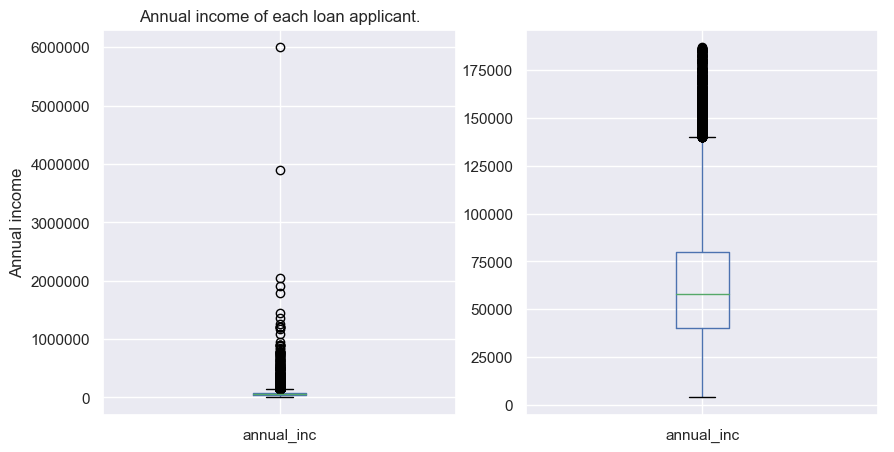

In [140]:
# Plotting the distribution plot of annual_inc to visualise their distribution
mpt.rcdefaults()
sbn.set(font_scale=1)
sbn.set_style("dark")
mpt.figure(figsize=(10, 5))
mpt.subplot(1,2,1)
loan_main_df.boxplot(column='annual_inc')
mpt.ylabel("Annual income")
mpt.title('Annual income of each loan applicant.')
mpt.subplot(1,2,2)
loan_main_df[loan_main_df.annual_inc < loan_main_df.annual_inc.quantile(.98)].boxplot(column='annual_inc')



In [141]:
loan_main_df.groupby(by='loan_status').agg({'annual_inc':['count','mean']})

annual_inc                     
                 count                 mean
loan_status                                
Charged Off       5627            62,427.30
Current           1140            75,430.67
Fully Paid       32950            69,862.50

In [142]:
# The mean in Charged off seem to be less, may be there are less outliers in Charged off for anual income. 
#Lets check for data set thats above 500,000
loan_main_df[loan_main_df.annual_inc >= 500000.].groupby(by='loan_status').agg({'annual_inc':['count','mean']})

annual_inc                     
                 count                 mean
loan_status                                
Charged Off         11           705,550.35
Current              1           650,000.00
Fully Paid          60           951,974.40

#### Insights:
-  outliers are distributed, across Charged off and FullyPiad. The motivation for these outliers to be in charged off should be different to most common loan seeker

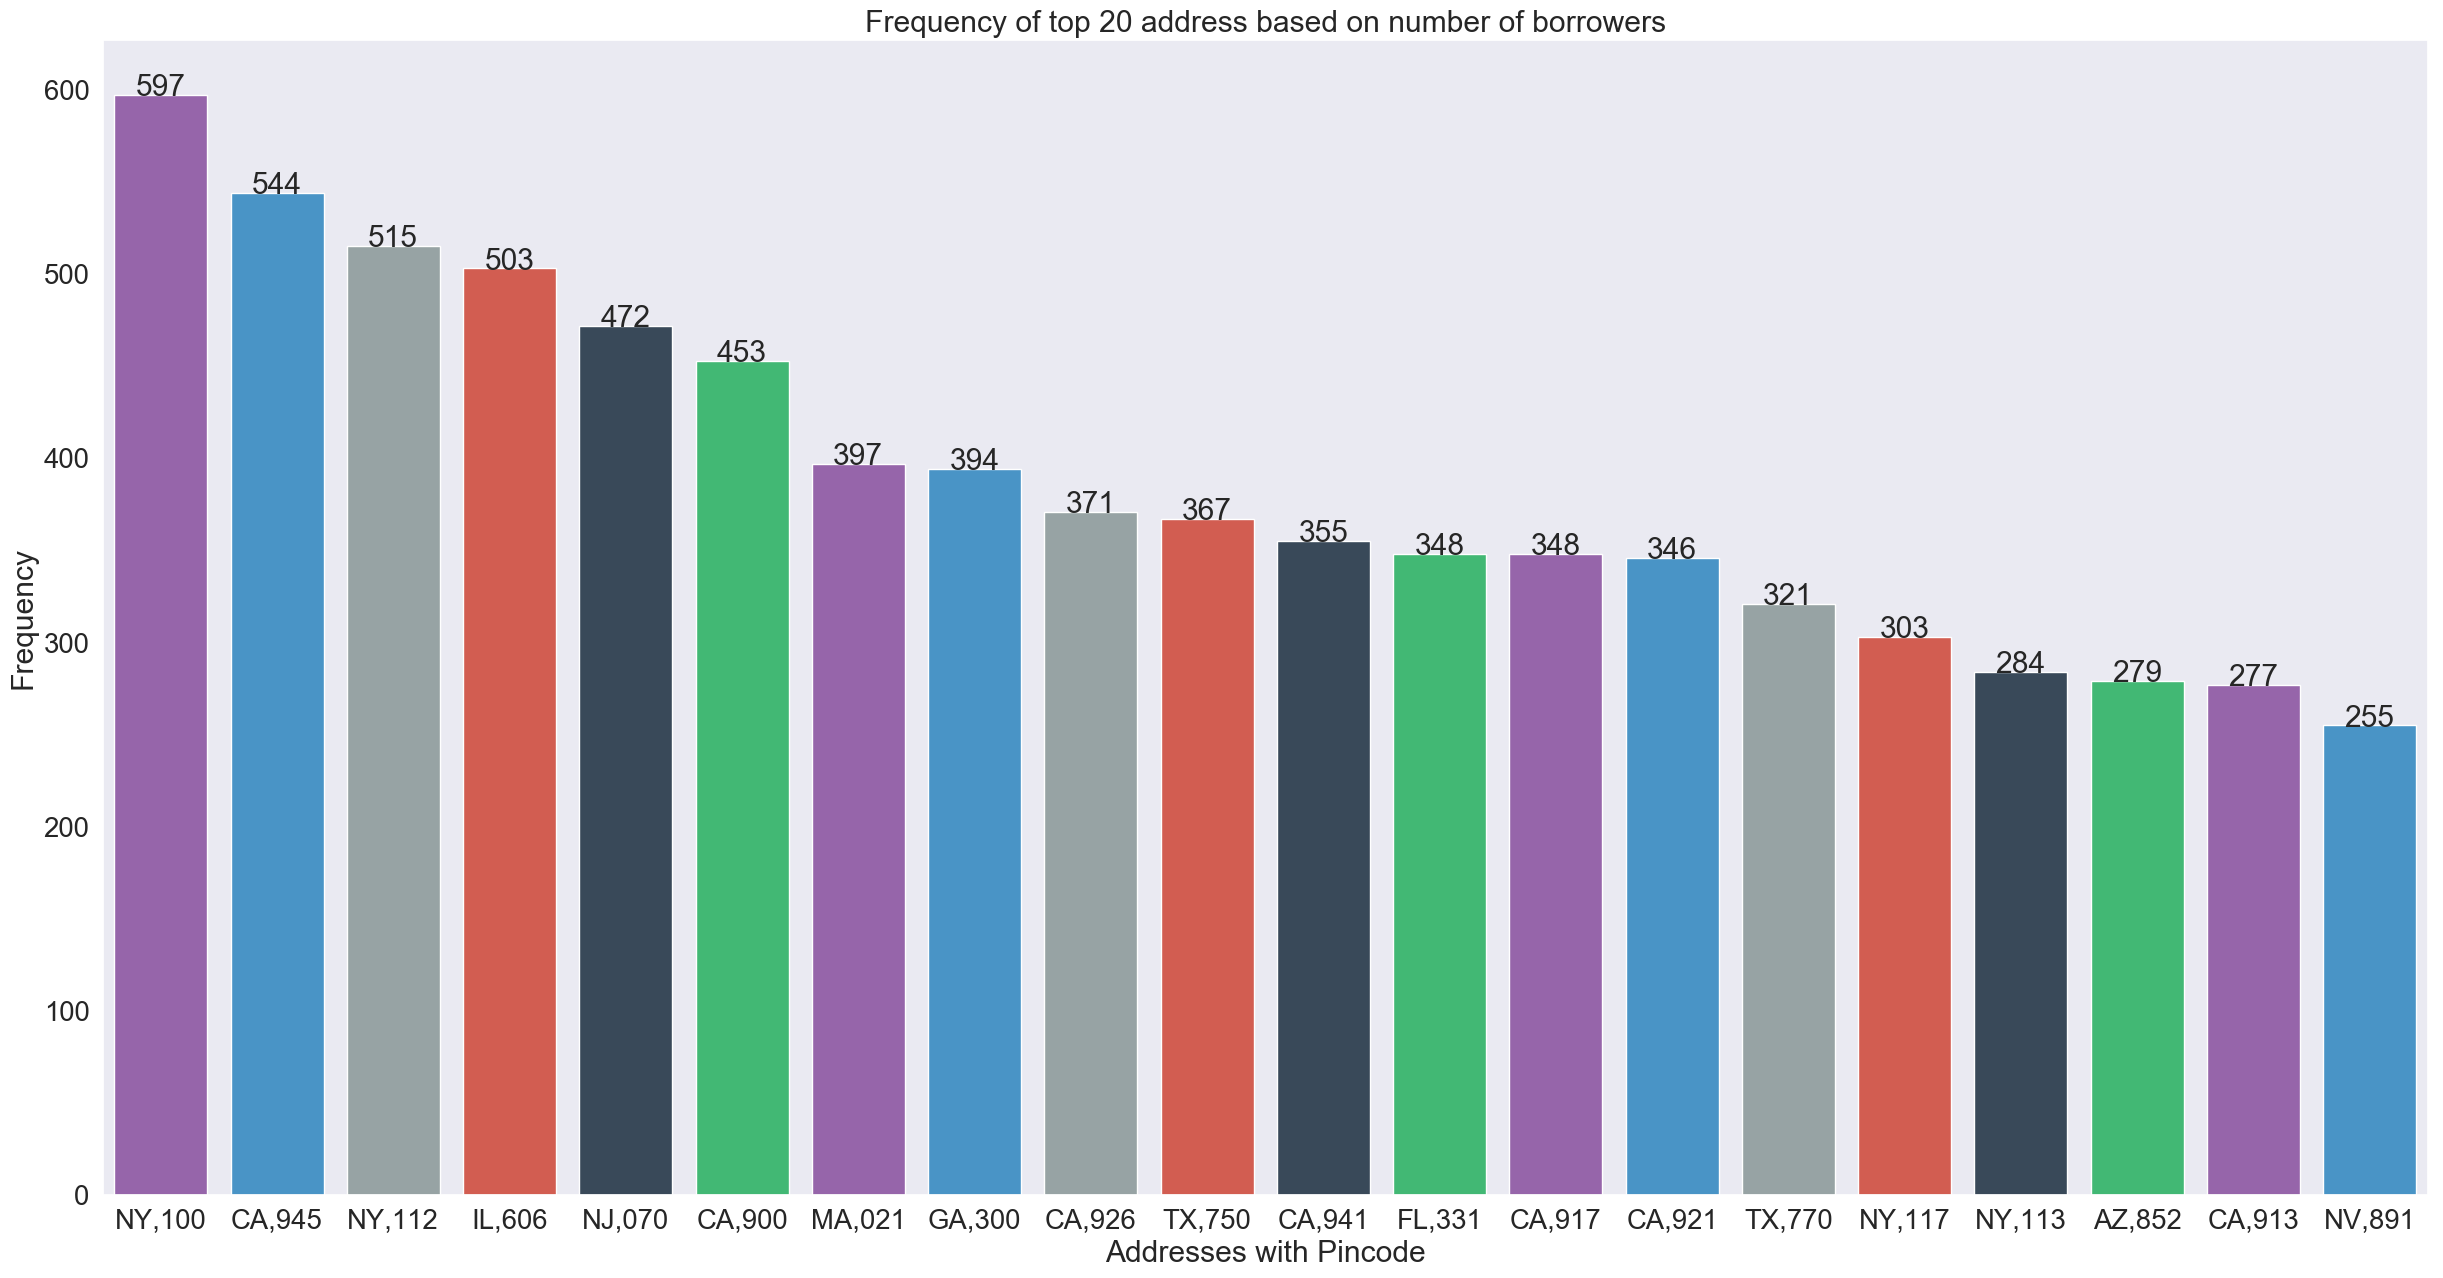

In [143]:
#Address of borrower(Combination of State and zipcode)
sbn.set(font_scale=1.8)
sbn.set_style("dark")
mpt.figure(figsize=(30, 15))
mpt.title('Frequency of top 20 address based on number of borrowers')
address_values = pd.DataFrame(loan_main_df['address'].value_counts())[:20]
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
ab = sbn.barplot(x=address_values.index, y="address", data=address_values, palette=sbn.color_palette(flatui))
#ab.set_xticklabels(ab.get_xticklabels(), rotation=45)
annotations(ab,5,0)
#show_values_on_bars(ab)
mpt.xlabel("Addresses with Pincode")
mpt.ylabel("Frequency")
mpt.show()

#### Insights:
- Maximum number of borrowers are from address NY,100 of loans to whom loans are given

### 3. Segmented univariate Analysis

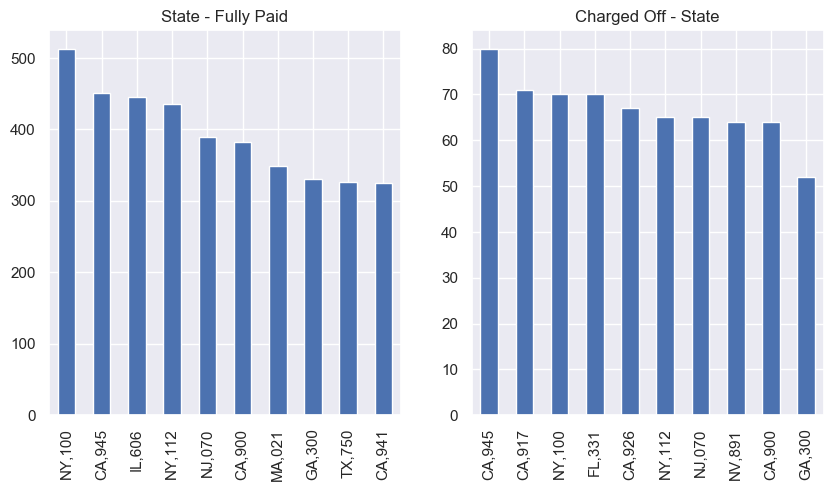

In [144]:
# Lets check the distribution of Fully Paid and Charged Off.
sbn.set(font_scale=1)
mpt.figure(figsize=(10, 5))
mpt.subplot(1, 2, 1)
loan_main_df[(loan_main_df.loan_status=='Fully Paid')]['address'].value_counts().head(n=10).plot.bar(title='State - Fully Paid')
mpt.subplot(1, 2, 2)
loan_main_df[(loan_main_df.loan_status=='Charged Off')]['address'].value_counts().head(n=10).plot.bar(title='Charged Off - State')

The ratio of 'Fully Paid' and 'Charged Off' dosent seem to be symetrical across geography. This could be because of local cost of living, taxes and income levels. We will drill down on this with other variables in bi-variate analysis

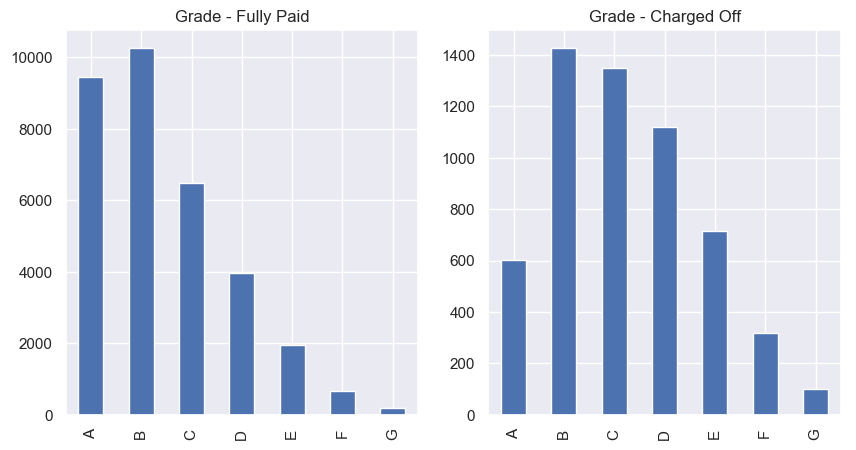

In [145]:
# Lets look at grade and sub grade for Charged off and Fully paid customers
# Lets check the distribution of Fully Paid and Charged Off.
mpt.figure(figsize=(10, 5))
mpt.subplot(1, 2, 1)
loan_main_df[(loan_main_df.loan_status=='Fully Paid')]['grade'].value_counts(sort=False).sort_index(ascending=True).plot.bar(title='Grade - Fully Paid')
mpt.subplot(1, 2, 2)
loan_main_df[(loan_main_df.loan_status=='Charged Off')]['grade'].value_counts(sort=False).sort_index(ascending=True).plot.bar(title='Grade - Charged Off')

**Insight** - Grade seem to be an ordered categorical. Grade 'C','D','E' have higher charge-off ratio as compared to Fully Paid.

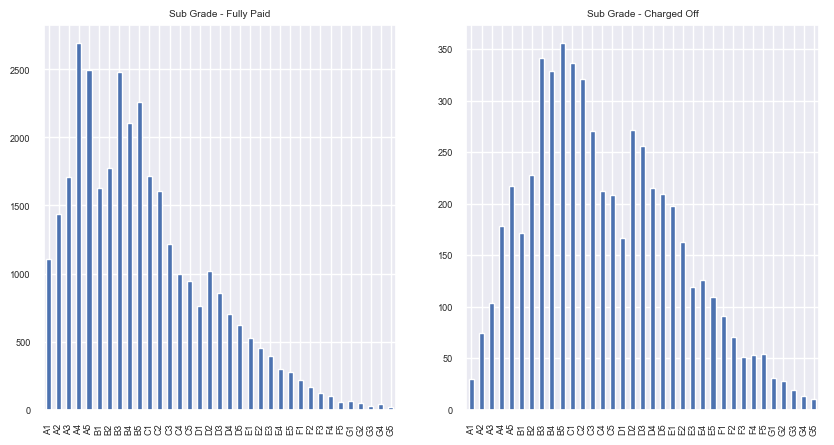

In [146]:
sbn.set(font_scale=.6)
mpt.figure(figsize=(10, 5))
mpt.subplot(1, 2, 1)
loan_main_df[(loan_main_df.loan_status=='Fully Paid')]['sub_grade'].value_counts(sort=False).sort_index(ascending=True).plot.bar(title='Sub Grade - Fully Paid')
mpt.subplot(1, 2, 2)
loan_main_df[(loan_main_df.loan_status=='Charged Off')]['sub_grade'].value_counts(sort=False).sort_index(ascending=True).plot.bar(title='Sub Grade - Charged Off')

Even Sub Grade also shows that sub-grade B3 and above the charge off ratio is higher

## 4. Derived Metrics
There are few more segmented  Univariate analysis to be done. First lets derive few Columns

In [147]:
loan_main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 41 columns):
loan_amnt                  39717 non-null float64
term                       39717 non-null int64
int_rate                   39717 non-null float64
installment                39717 non-null float64
grade                      39717 non-null object
sub_grade                  39717 non-null object
emp_length                 39717 non-null float64
home_ownership             39717 non-null object
annual_inc                 39717 non-null float64
verification_status        39717 non-null object
issue_d                    39717 non-null datetime64[ns]
loan_status                39717 non-null object
purpose                    39717 non-null object
zip_code                   39717 non-null object
addr_state                 39717 non-null object
dti                        39717 non-null float64
earliest_cr_line           39717 non-null datetime64[ns]
inq_last_6mths             39717 non-

#### Installment to Income Ratio:
- ***Installment to Income Ratio IIR. Installment to Income Ratio (IIR) is method by which the lender or the bank evaluates a person's ability to repay the loan, in terms of percentage of monthly salary that he has to pay. It is a parameter that is used to assess the borrower before lending a loan to him.***<br>
Now, <br>
Lets define a new cloumn "instal_income_perc" which is the ratio of installment and monthly income(annual_inc/12) multplied by 100. Also we need to consider the already existing dti. So instal_income_perc will be the after deducting all the exiting debt comitments.

In [148]:
loan_main_df['monthly_income'] = loan_main_df['annual_inc']/12
loan_main_df['monthly_debt_commit'] = loan_main_df['monthly_income'] * (loan_main_df['dti']/100)
loan_main_df['instal_income_perc'] = ((loan_main_df['installment']+ loan_main_df['monthly_debt_commit']) /loan_main_df['monthly_income'])*100
loan_main_df.head(10)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,address,monthly_income,monthly_debt_commit,instal_income_perc,interest_rate_interval,months_paid,risk_category,diff_principle
0,"5,000.00",36,10.65,162.87,B,B2,10.00,RENT,"24,000.00",Verified,2011-12-01,Fully Paid,credit_card,860,AZ,27.65,1985-01-01,1,3,0,13648,83.70,9,0.00,"5,863.16","5,000.00",863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,"AZ,860","2,000.00",553.00,35.79,10-15,37,Low Risk,1.00
1,"2,500.00",60,15.27,59.83,C,C4,0.00,RENT,"30,000.00",Source Verified,2011-12-01,Charged Off,car,309,GA,1.00,1999-04-01,5,3,0,1687,9.40,4,0.00,"1,008.71",456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,"GA,309","2,500.00",25.00,3.39,15-20,16,High Risk,0.18
2,"2,400.00",36,15.96,84.33,C,C5,10.00,RENT,"12,252.00",Not Verified,2011-12-01,Fully Paid,small_business,606,IL,8.72,2001-11-01,2,2,0,2956,98.50,10,0.00,"3,005.67","2,400.00",605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,"IL,606","1,021.00",89.03,16.98,15-20,30,Low Risk,1.00
3,"10,000.00",36,13.49,339.31,C,C1,10.00,RENT,"49,200.00",Source Verified,2011-12-01,Fully Paid,other,917,CA,20.00,1996-02-01,1,10,0,5598,21.00,37,0.00,"12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,"CA,917","4,100.00",820.00,28.28,10-15,37,Low Risk,1.00
4,"3,000.00",60,12.69,67.79,B,B5,1.00,RENT,"80,000.00",Source Verified,2011-12-01,Current,other,972,OR,17.94,1996-01-01,0,15,0,27783,53.90,38,524.06,"3,513.33","2,475.94","1,037.39",0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,"OR,972","6,666.67","1,196.00",18.96,10-15,53,Unknown Risk,0.83
5,"5,000.00",36,7.90,156.46,A,A4,3.00,RENT,"36,000.00",Source Verified,2011-12-01,Fully Paid,wedding,852,AZ,11.20,2004-11-01,3,9,0,7963,28.30,12,0.00,"5,632.21","5,000.00",632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,"AZ,852","3,000.00",336.00,16.42,5-10,37,Low Risk,1.00
6,"7,000.00",60,15.96,170.08,C,C5,8.00,RENT,"47,004.00",Not Verified,2011-12-01,Fully Paid,debt_consolidation,280,NC,23.51,2005-07-01,1,7,0,17726,85.60,11,0.00,"10,110.84","6,985.61","3,125.23",0.00,0.00,0.00,2016-05-01,"1,313.76",2016-05-01,"NC,280","3,917.00",920.89,27.85,15-20,53,Low Risk,1.00
7,"3,000.00",36,18.64,109.43,E,E1,9.00,RENT,"48,000.00",Source Verified,2011-12-01,Fully Paid,car,900,CA,5.35,2007-01-01,2,4,0,8221,87.50,4,0.00,"3,939.14","3,000.00",939.14,0.00,0.00,0.00,2015-01-01,111.34,2014-12-01,"CA,900","4,000.00",214.00,8.09,15-20,37,Low Risk,1.00
8,"5,600.00",60,21.28,152.39,F,F2,4.00,OWN,"40,000.00",Source Verified,2011-12-01,Charged Off,small_business,958,CA,5.55,2004-04-01,2,11,0,5210,32.60,13,0.00,646.02,162.02,294.94,0.00,189.06,2.09,2012-04-01,152.39,2012-08-01,"CA,958","3,333.33",185.00,10.12,20-25,4,High Risk,0.03
9,"5,375.00",60,12.69,121.45,B,B5,0.00,RENT,"15,000.00",Verified,2011-12-01,Charged Off,other,774,TX,18.08,2004-09-01,0,2,0,9279,36.50,3,0.00,"1,476.19",673.48,533.42,0.00,269.29,2.52,2012-11-01,121.45,2013-03-01,"TX,774","1,250.00",226.00,27.80,10-15,11,High Risk,0.13


#### Type Driven Metrics : interest_rate_interval
Define an interval for interested rate and see how each interval is performing against loan status

In [149]:
loan_main_df['interest_rate_interval'] = loan_main_df['int_rate'].apply(lambda a :'0-5' if a <=5 else ('5-10' if a<=10 else ('10-15' if a <=15 else ('15-20' if a<=20 else('20-25' if a <=25 else '25+')))))
loan_main_df[['int_rate','interest_rate_interval']].groupby(by='interest_rate_interval').agg({'int_rate':'mean'})


,int_rate
interest_rate_interval,
10-15,12.41
15-20,16.88
20-25,21.20
5-10,7.78


**Defaulter Segmentation** -  Defualter Can be segmented as 3 categories 
 1. Those who have taken loan and never bothered to repay - Intentions are wrong
 2. Those Paided well in the begining but stopped in between - Maybe becuase of financial conditions
 3. Those Paid almost but dint close the loan account so there is outstanding. 
 
 To find these first need to create a number of months the customer paid loan, also use amount of priciple paid, interest paid etc. Category 3 might just be a noise. Lets find out how this plays.

In [150]:
def months_elapsed(row):
    return (row.last_pymnt_d.year - row.issue_d.year) * 12 + (row.last_pymnt_d.month - row.issue_d.month )

loan_main_df['months_paid'] = loan_main_df.apply(months_elapsed, axis=1)

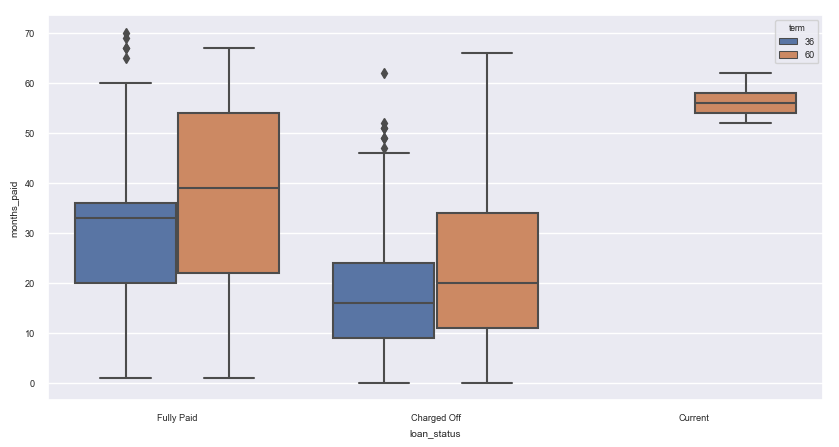

In [151]:
sbn.set(font_scale=.6)
mpt.figure(figsize=(10, 5),  facecolor='w', edgecolor='k')
sbn.boxplot(x='loan_status', y='months_paid', hue='term',  data=loan_main_df)
mpt.show()

This is interesting. Few findings
1. Charged off has varied population by number of months in repayment.There are from 0 and more that 36 monts of payment in payment term. Higher distribution is there in 60 months term as well. 
2. Very importantly the customer who are fully paid in 36 terms have 75 percentile above 36 months. So after collection these guys are fully paid. If not these guys also would have been in Charged Off. 

So Fully paid is not completly financially sound loan applicants and Charged off is not completly bad financial loan applications. We will explore which parameters are influencing most in bivariate and multi variate analysis.

Few More Derived Metrics that might help draw conclusions.

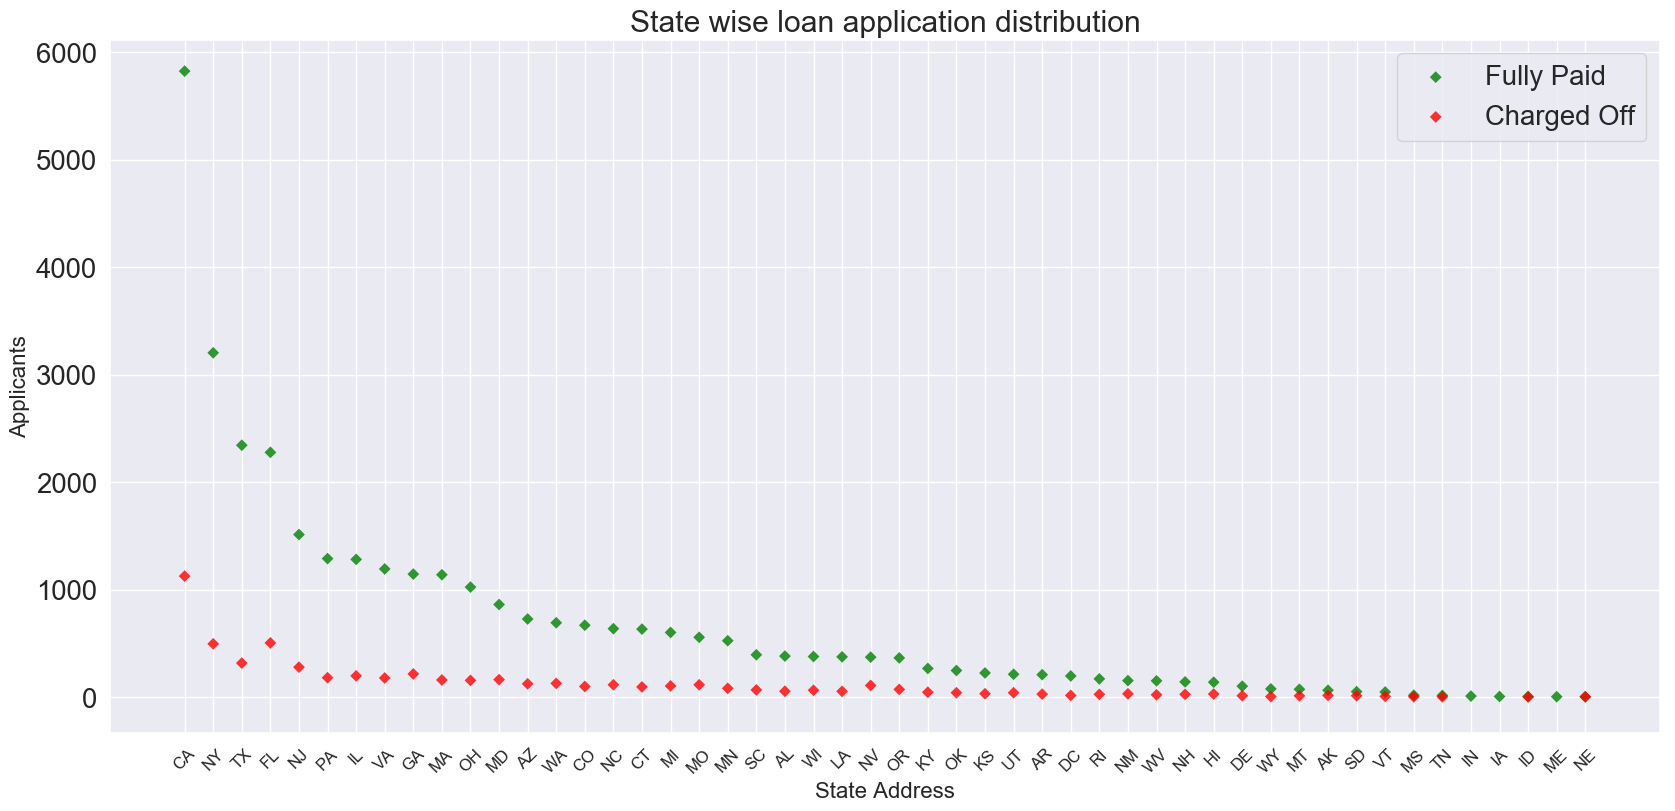

In [152]:
# From Here on we will completly focus on only loan_status Fully Paid and Charged Off.
grp1 = pd.DataFrame(loan_main_df[loan_main_df.loan_status == 'Fully Paid']['addr_state'].value_counts())
grp2 = pd.DataFrame(loan_main_df[loan_main_df.loan_status == 'Charged Off']['addr_state'].value_counts())
data = (grp1, grp2)
sbn.set(font_scale=1.8)
colors = ("green", "red")
groups = ('Fully Paid', 'Charged Off') 
#color_array = ['b'] * 15 + ['g'] * 17 + ['r']*15
data = (grp1, grp2)
fig = mpt.figure(figsize=(20, 9))

for data, color, group in zip(data, colors, groups):
    x = data.index
    y = data.addr_state
    mpt.scatter(x, y, alpha=0.8, c=color, edgecolors='none', label=group, marker='D')
    
mpt.title('State wise loan application distribution')
mpt.legend(loc=1)
mpt.xticks(rotation=45, fontsize=12)
mpt.xlabel('State Address', fontsize=16)
mpt.ylabel('Applicants', fontsize=16)

mpt.show()

#### Insights:
-  State CA tops in both Non-Defaulter and Defaulter catagories of loans.

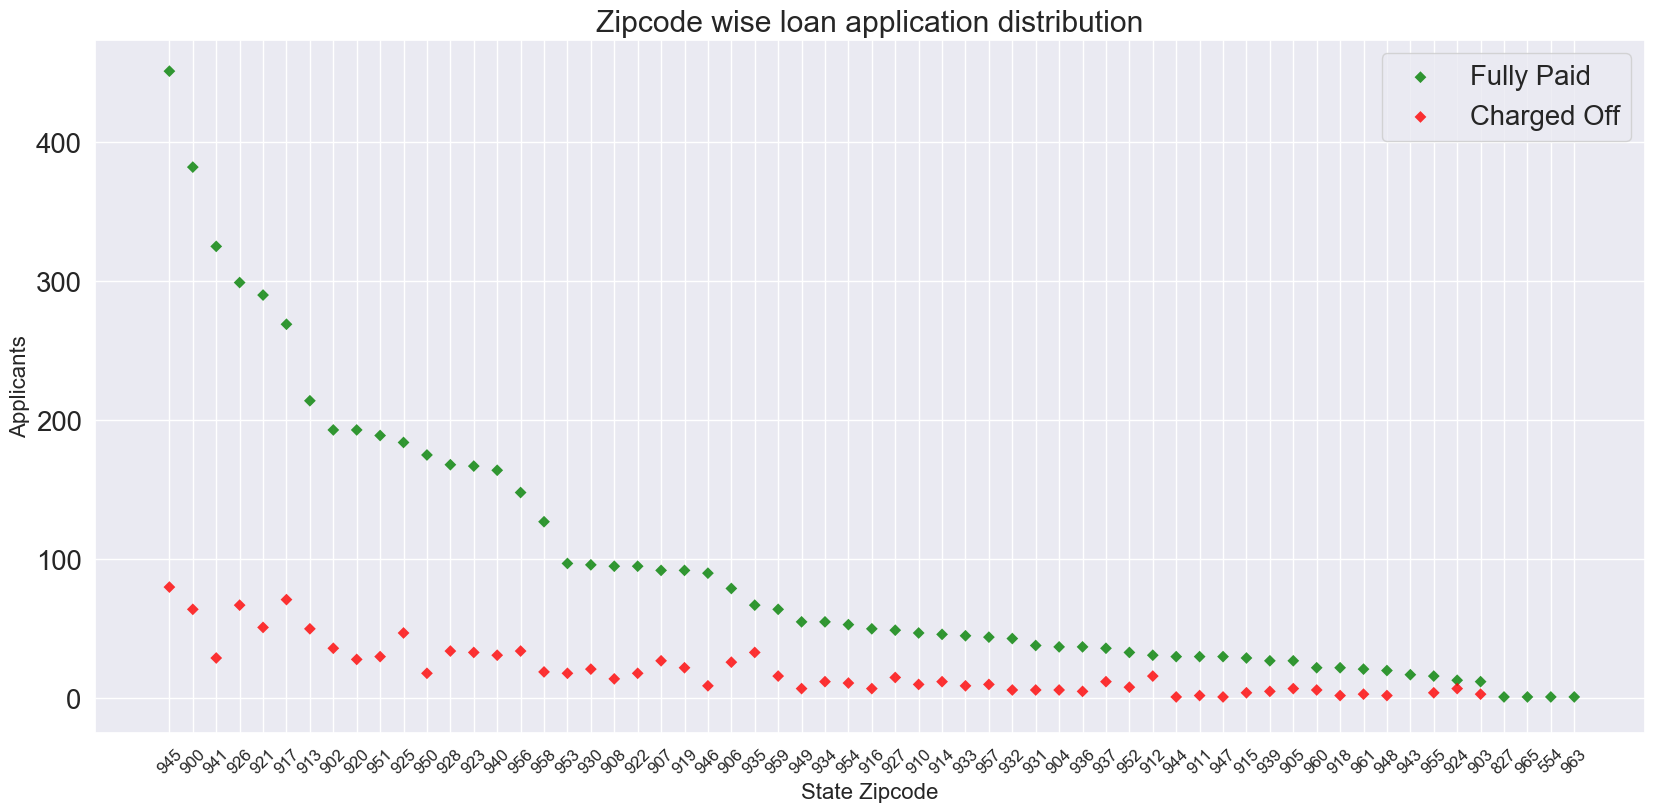

In [153]:
CA_state_df = pd.DataFrame(loan_main_df[loan_main_df.addr_state == 'CA'])
gr1 = pd.DataFrame(CA_state_df[CA_state_df.loan_status == 'Fully Paid']['zip_code'].value_counts())
gr2 = pd.DataFrame(CA_state_df[CA_state_df.loan_status == 'Charged Off']['zip_code'].value_counts())
data = (gr1, gr2)
sbn.set(font_scale=1.8)

colors = ("green", "red")
groups = ('Fully Paid', "Charged Off") 
data = (gr1, gr2)
fig = mpt.figure(figsize=(20, 9))
for data, color, group in zip(data, colors, groups):
    x = data.index
    y = data.zip_code
    mpt.scatter(x, y, alpha=0.8, c=color, edgecolors='none', label=group, marker='D')
    
mpt.title('Zipcode wise loan application distribution')
mpt.legend(loc=1)
mpt.xticks(rotation=45, fontsize=12)
mpt.xlabel('State Zipcode', fontsize=16)
mpt.ylabel('Applicants', fontsize=16)
mpt.show()

#### Insights:
-  State **CA** and area **"945"** as Zipcode tops in both Non-Defaulter and Defaulter catagories of loans.

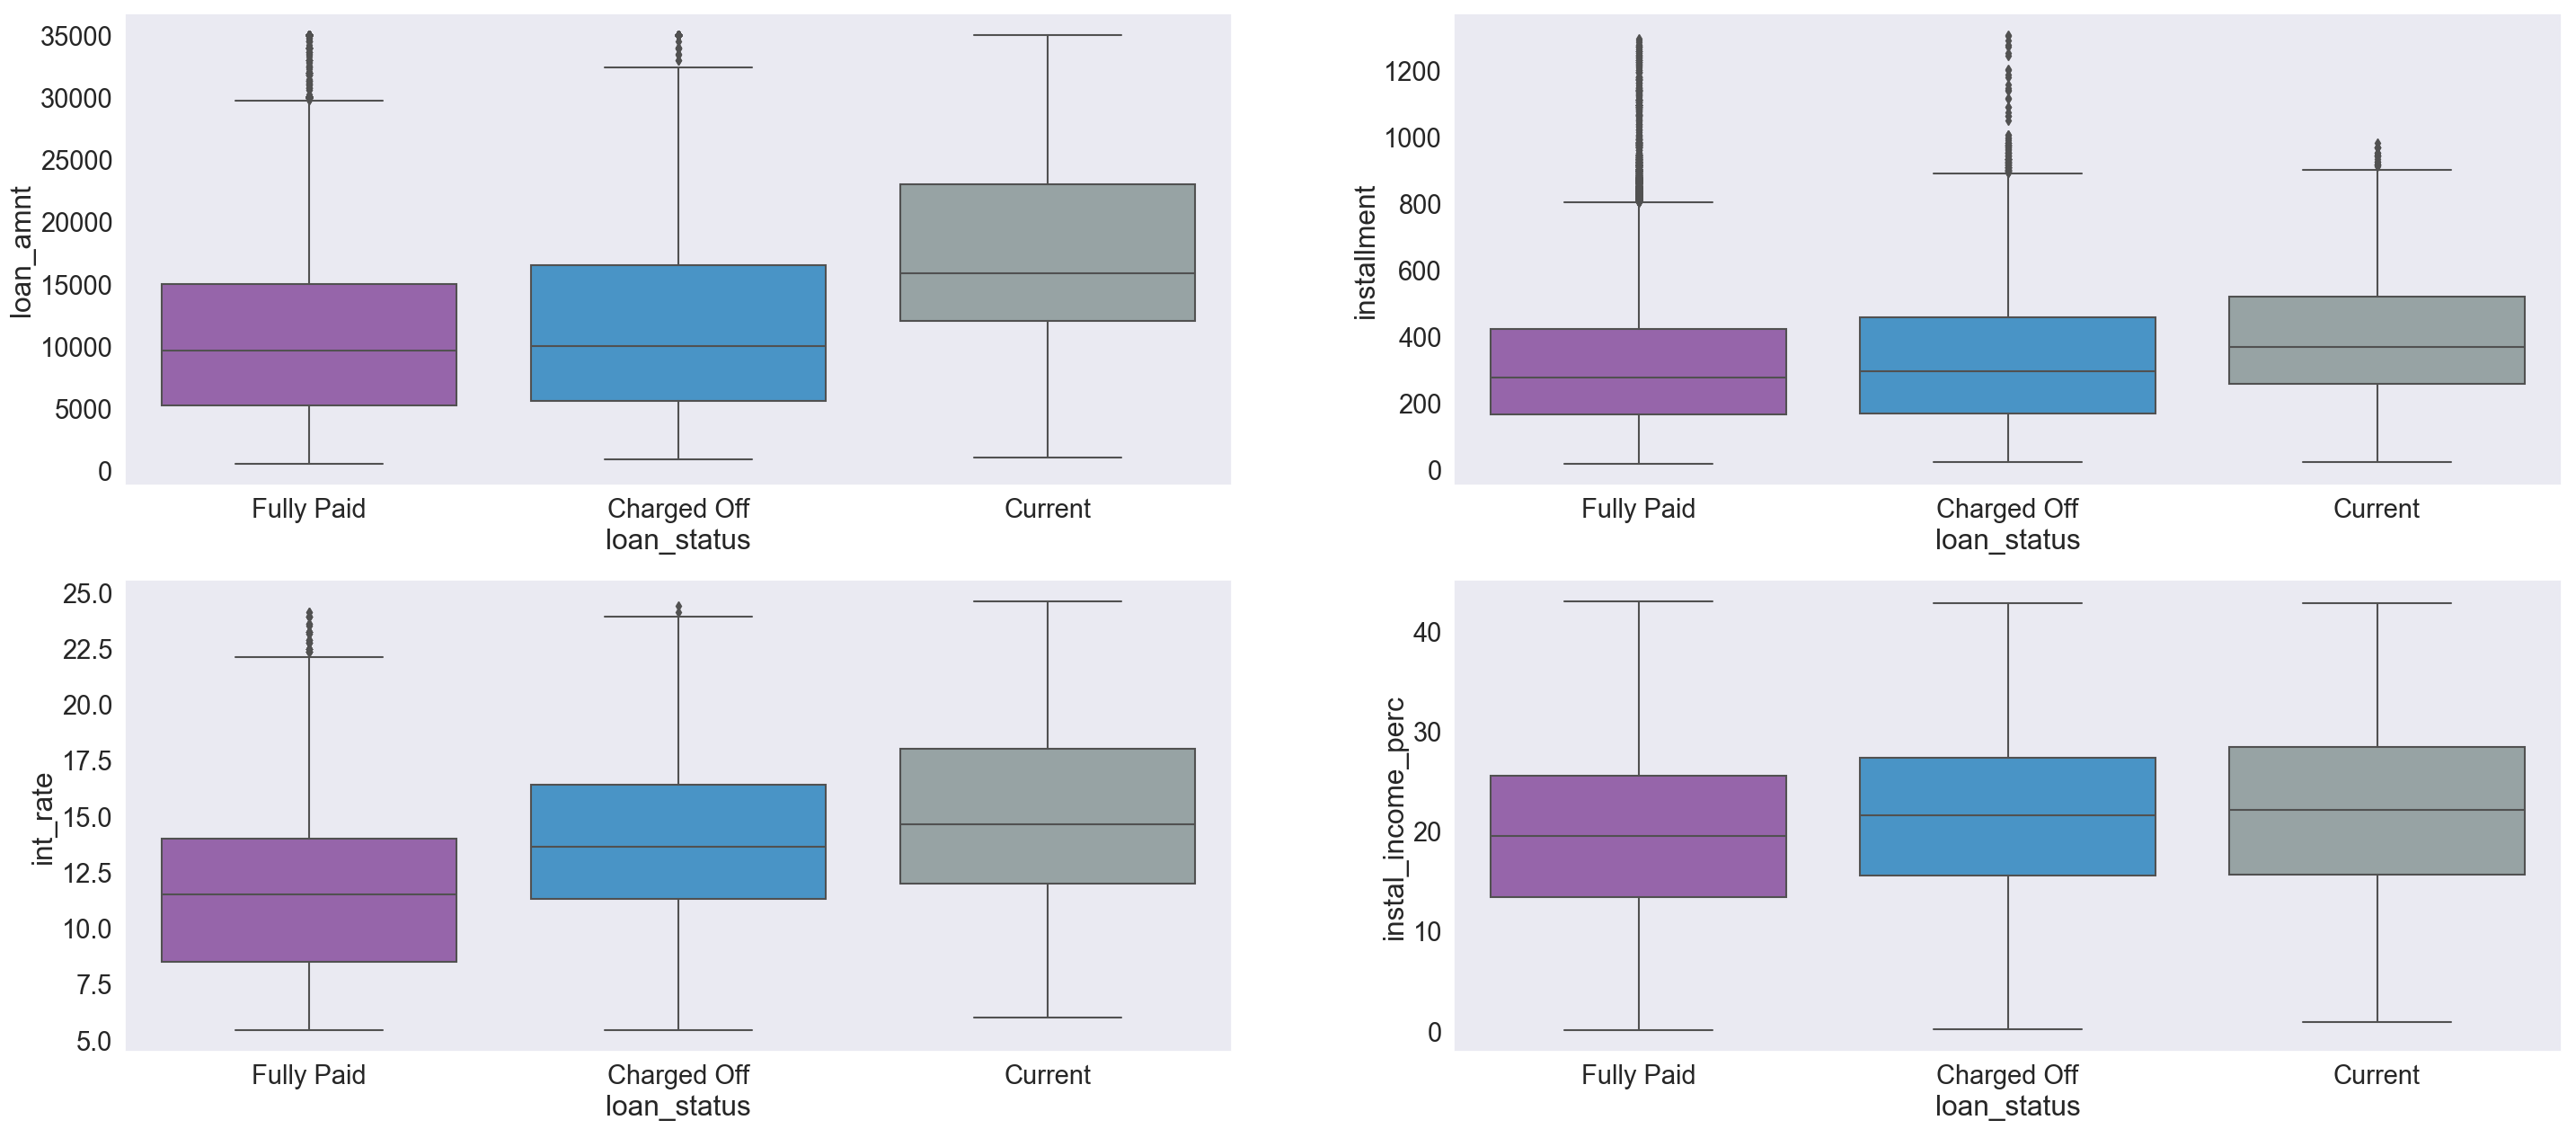

In [154]:
# egmented analysis based on loan status for loan amount, funded amount and interest rate.
mpt.rcdefaults()
sbn.set(font_scale=1.9)
sbn.set_style("dark")
mpt.figure(figsize=(35, 15))
mpt.subplot(2,2,1)
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sbn.boxplot(x="loan_status", y="loan_amnt", data=loan_main_df, palette=sbn.color_palette(flatui))
mpt.subplot(2,2,2)
sbn.boxplot(x="loan_status", y="installment", data=loan_main_df, palette=sbn.color_palette(flatui))
mpt.subplot(2,2,3)
sbn.boxplot(x="loan_status", y="int_rate", data=loan_main_df, palette=sbn.color_palette(flatui))
mpt.subplot(2,2,4)
sbn.boxplot(x="loan_status", y="instal_income_perc", data=loan_main_df, palette=sbn.color_palette(flatui))
mpt.show()

**Observations** - int_rate seem to  be a real contributor for charged off accounts. instal_income_perc seem to be marinally higher. *Key Observation - Though all current category is pay they seem to high in all parameter meaning higher risk of eventually going into charged off*

**Payer Category** - To further draw similarities between different applicants, we will create two categories. Financially Sound or *Low risk (LR)* and Financicially unsound  or *High Risk (HR)*
<DR> Low Risk - All Customers who payed off with in their term
<DR> High Risk - Exceeded their term and payed off, or Charged off
<DR> Unknown Riks - For Current Category

In [155]:
def risk_category(row):
    if((row.months_paid - 1) <= row.term) & (row.loan_status == 'Fully Paid') :
        return 'Low Risk'
    elif (row.loan_status =='Current'):
        return 'Unknown Risk'
    else:
        return 'High Risk'

In [156]:
loan_main_df['risk_category'] = loan_main_df.apply(risk_category, axis=1)

In [157]:
pd.pivot_table(loan_main_df[['loan_status', 'risk_category']], columns=['risk_category'], index='loan_status', aggfunc={'risk_category':'count'})

risk_category                                          
risk_category            High Risk             Low Risk         Unknown Risk
loan_status                                                                 
Charged Off               5,627.00                  nan                  nan
Current                        nan                  nan             1,140.00
Fully Paid                  325.00            32,625.00                  nan

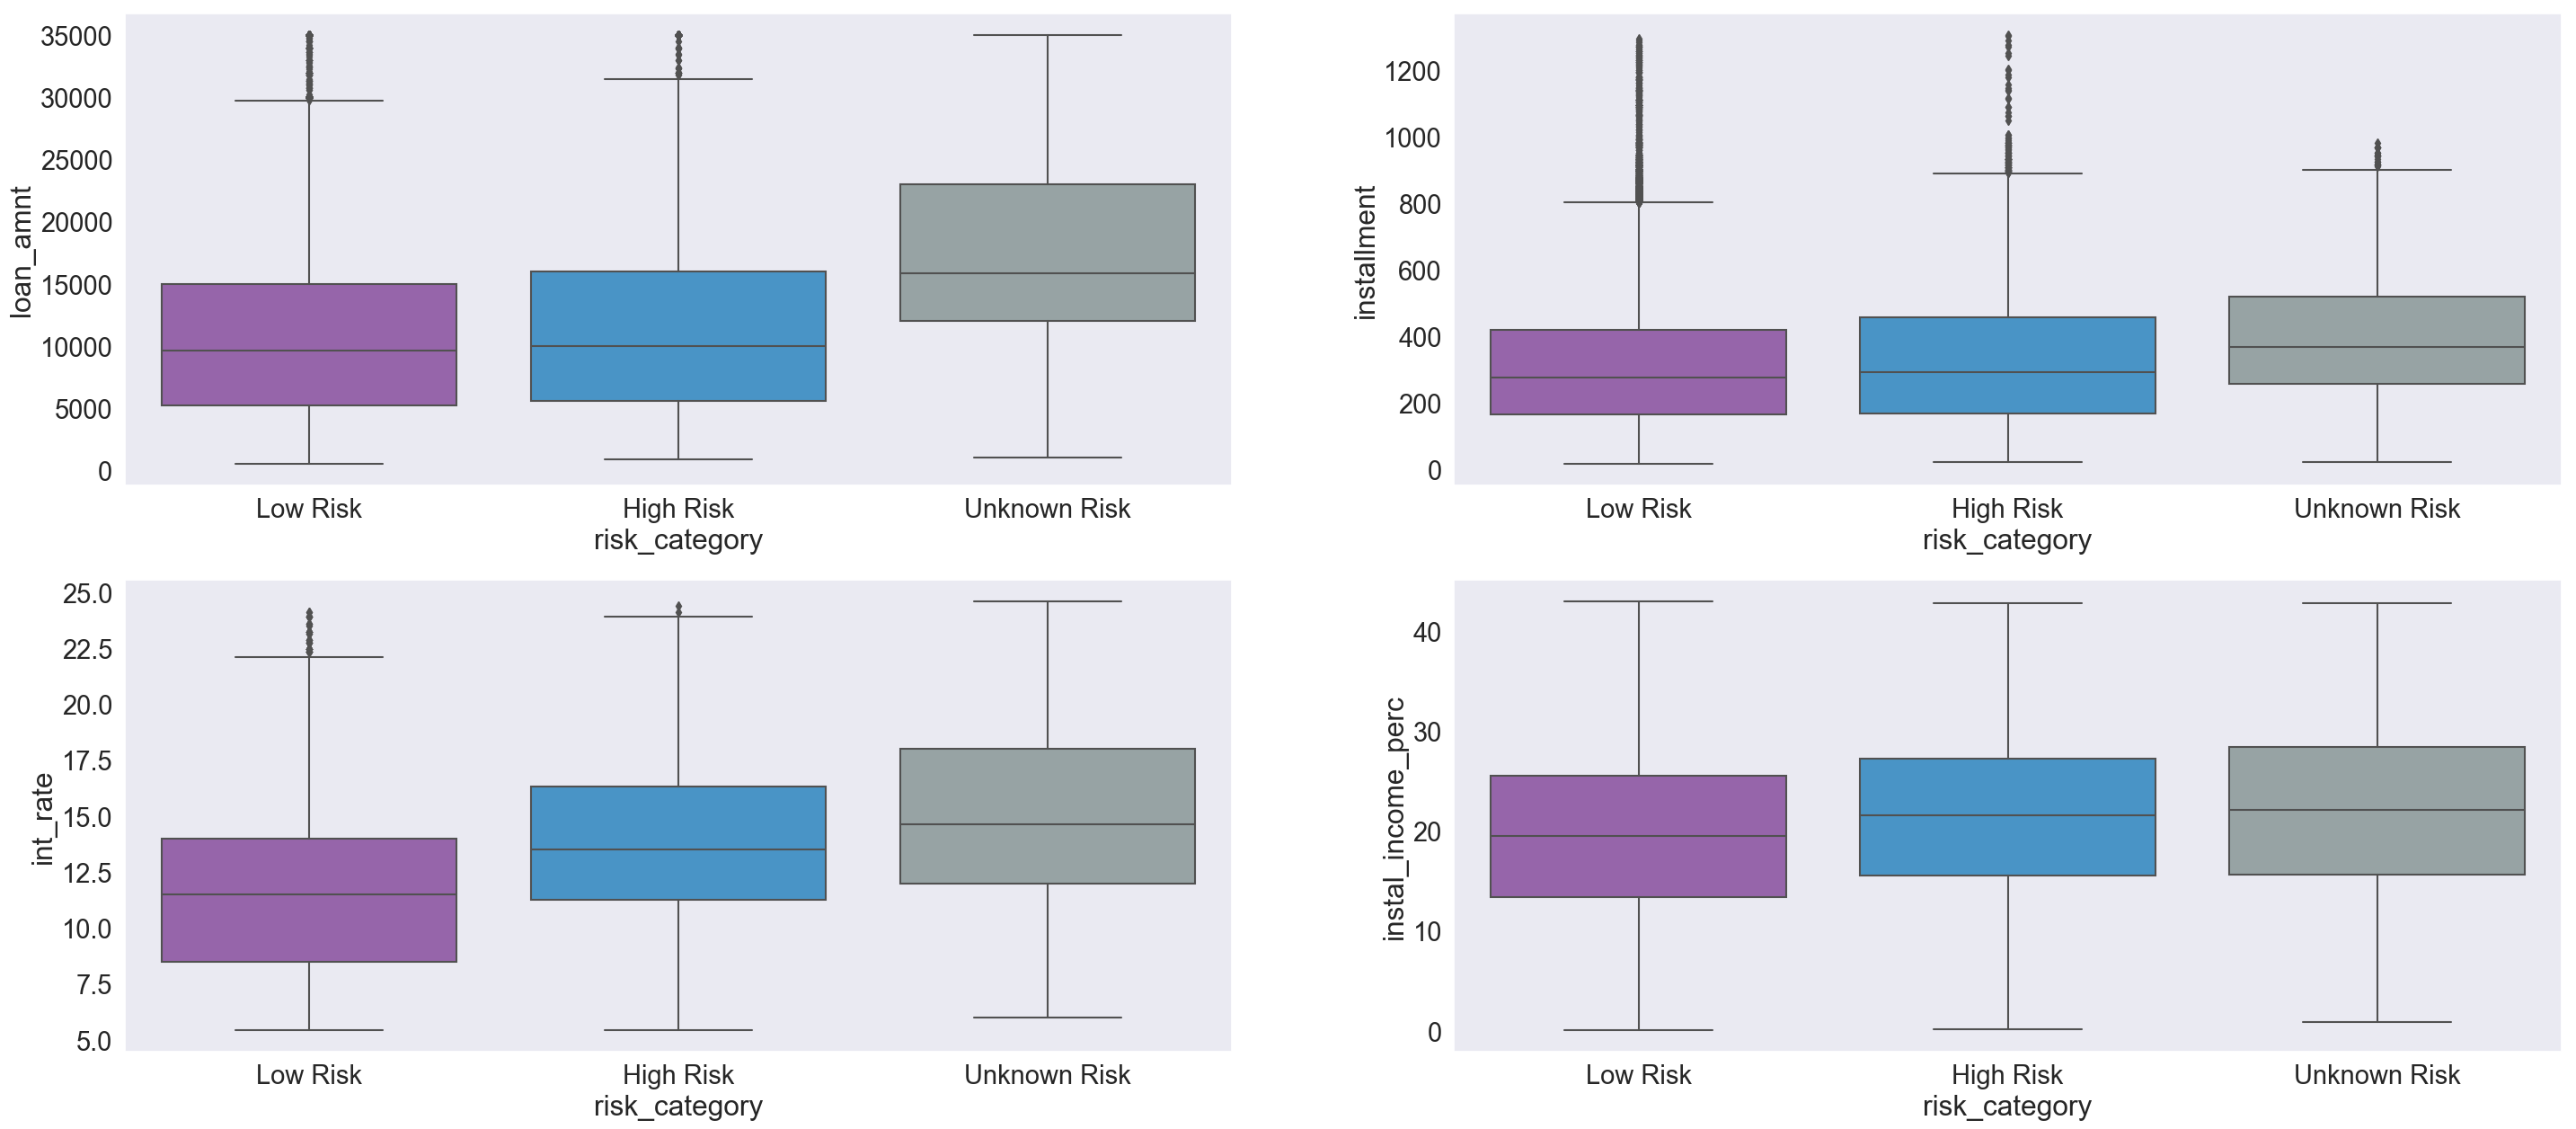

In [158]:
#Lets Map all the paremeters mapped above with Risk Category.
# egmented analysis based on Risk Category for loan amount, funded amount and interest rate.
mpt.rcdefaults()
sbn.set(font_scale=1.9)
sbn.set_style("dark")
mpt.figure(figsize=(35, 15))
mpt.subplot(2,2,1)
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sbn.boxplot(x="risk_category", y="loan_amnt", data=loan_main_df, palette=sbn.color_palette(flatui))
mpt.subplot(2,2,2)
sbn.boxplot(x="risk_category", y="installment", data=loan_main_df, palette=sbn.color_palette(flatui))
mpt.subplot(2,2,3)
sbn.boxplot(x="risk_category", y="int_rate", data=loan_main_df, palette=sbn.color_palette(flatui))
mpt.subplot(2,2,4)
sbn.boxplot(x="risk_category", y="instal_income_perc", data=loan_main_df, palette=sbn.color_palette(flatui))
mpt.show()

#### Insights:
- The installment to income percentage is slightly higher for defaulted loans than non-defaulted loans.

In [159]:
loan_main_df[(loan_main_df.risk_category == 'Low Risk') &(loan_main_df.total_rec_late_fee >= 116.10) ]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,address,monthly_income,monthly_debt_commit,instal_income_perc,interest_rate_interval,months_paid,risk_category,diff_principle
26774,"25,000.00",36,13.98,854.20,C,C3,7.00,MORTGAGE,"87,500.00",Source Verified,2010-08-01,Fully Paid,home_improvement,193,PA,4.47,1999-02-01,7,7,0,6274,27.90,27,0.00,"30,894.05","25,000.00","5,772.12",121.93,0.00,0.00,2013-08-01,"1,790.65",2016-05-01,"PA,193","7,291.67",325.94,16.18,10-15,36,Low Risk,1.00
32387,"24,000.00",36,20.16,893.85,G,G1,9.00,RENT,"120,000.00",Not Verified,2010-02-01,Fully Paid,home_improvement,107,NY,2.35,1991-06-01,0,3,0,366,4.30,16,0.00,"32,241.72","24,000.00","8,107.65",134.07,0.00,0.00,2012-11-01,"4,349.78",2013-11-01,"NY,107","10,000.00",235.00,11.29,20-25,33,Low Risk,1.00
37071,"20,000.00",36,15.05,693.83,D,D4,0.00,OTHER,"79,404.00",Verified,2009-04-01,Fully Paid,debt_consolidation,223,VA,15.32,1997-04-01,3,18,0,18636,81.10,33,0.00,"25,150.32","19,999.99","5,031.26",119.07,0.00,0.00,2012-04-01,757.44,2012-04-01,"VA,223","6,617.00","1,013.72",25.81,15-20,36,Low Risk,1.00
37364,"12,000.00",36,15.68,420.02,E,E1,4.00,MORTGAGE,"80,000.00",Verified,2009-03-01,Fully Paid,debt_consolidation,327,FL,14.21,1996-12-01,1,8,0,8664,93.20,12,0.00,"15,315.14","12,000.00","3,195.14",120.00,0.00,0.00,2012-01-01,905.48,2012-01-01,"FL,327","6,666.67",947.33,20.51,15-20,34,Low Risk,1.00
38086,"25,000.00",36,15.25,869.70,E,E2,0.00,MORTGAGE,"150,000.00",Verified,2008-12-01,Fully Paid,small_business,995,AK,6.82,1995-04-01,0,5,0,0,0.00,12,0.00,"30,683.25","25,000.00","5,552.78",130.47,0.00,0.00,2011-01-01,169.55,2011-01-01,"AK,995","12,500.00",852.50,13.78,15-20,25,Low Risk,1.00
39278,"10,150.00",36,11.97,336.98,C,C4,0.00,MORTGAGE,"90,096.00",Not Verified,2008-02-01,Fully Paid,debt_consolidation,076,NJ,6.61,1981-11-01,0,8,1,14081,73.70,17,0.00,"12,186.32","10,150.00","1,920.22",116.10,0.00,0.00,2010-08-01,"2,638.19",2013-02-01,"NJ,076","7,508.00",496.28,11.10,10-15,30,Low Risk,1.00


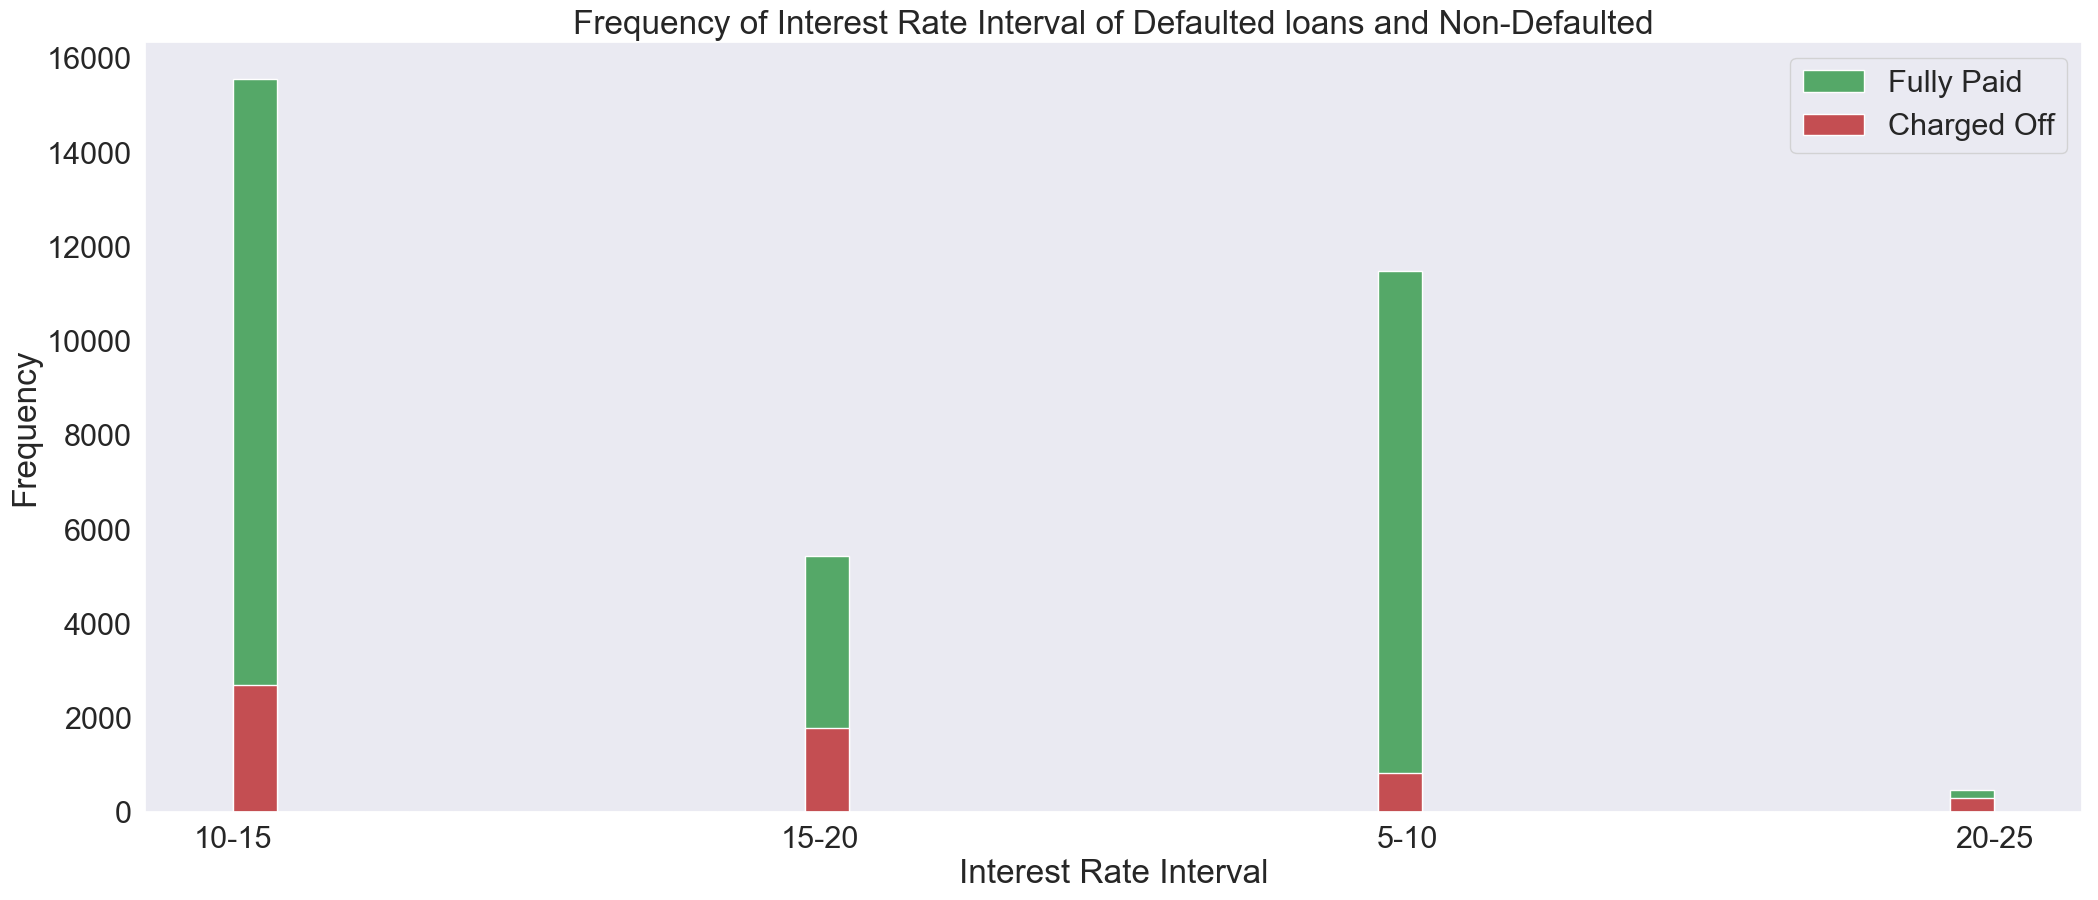

Get the percentage of defaults for each of  the loan Interval

loan_status                     Charged Off              Current  \
interest_rate_interval                                             
10-15                                 14.40                 2.81   
15-20                                 23.43                 5.64   
20-25                                 33.94                11.70   
5-10                                   6.70                 0.62   

loan_status                      Fully Paid  
interest_rate_interval                       
10-15                                 82.78  
15-20                                 70.93  
20-25                                 54.36  
5-10                                  92.68  


In [160]:
# Segmented univariate for interest_rate_bracket for each loan_default_status
mpt.rcdefaults()
sbn.set(font_scale=2)
sbn.set_style("dark")
mpt.figure(figsize=(25, 10))
emp_len_nd = loan_main_df[loan_main_df.loan_status == 'Fully Paid']['interest_rate_interval']
emp_len_d = loan_main_df[loan_main_df.loan_status == 'Charged Off']['interest_rate_interval']
mpt.hist([emp_len_nd], bins=40, color = "g", rwidth=50)
mpt.hist([emp_len_d], bins=40, color = "r", rwidth=50)
mpt.xlabel("Interest Rate Interval")
mpt.ylabel("Frequency")
mpt.legend(loan_main_df.loan_status)
mpt.title('Frequency of Interest Rate Interval of Defaulted loans and Non-Defaulted')
mpt.show()

print("Get the percentage of defaults for each of  the loan Interval\n")
loan_stat_per_interest_interval = pd.crosstab(loan_main_df['interest_rate_interval'],loan_main_df['loan_status']).apply(lambda r: round((r/r.sum()*100),2), axis=1)
print(loan_stat_per_interest_interval)

#### Insights:
- Nearly 34% of loans in the interest bracket 20-25% have been defaulted followed by 15-20% interest bracket which has defaulted loan of 24%.

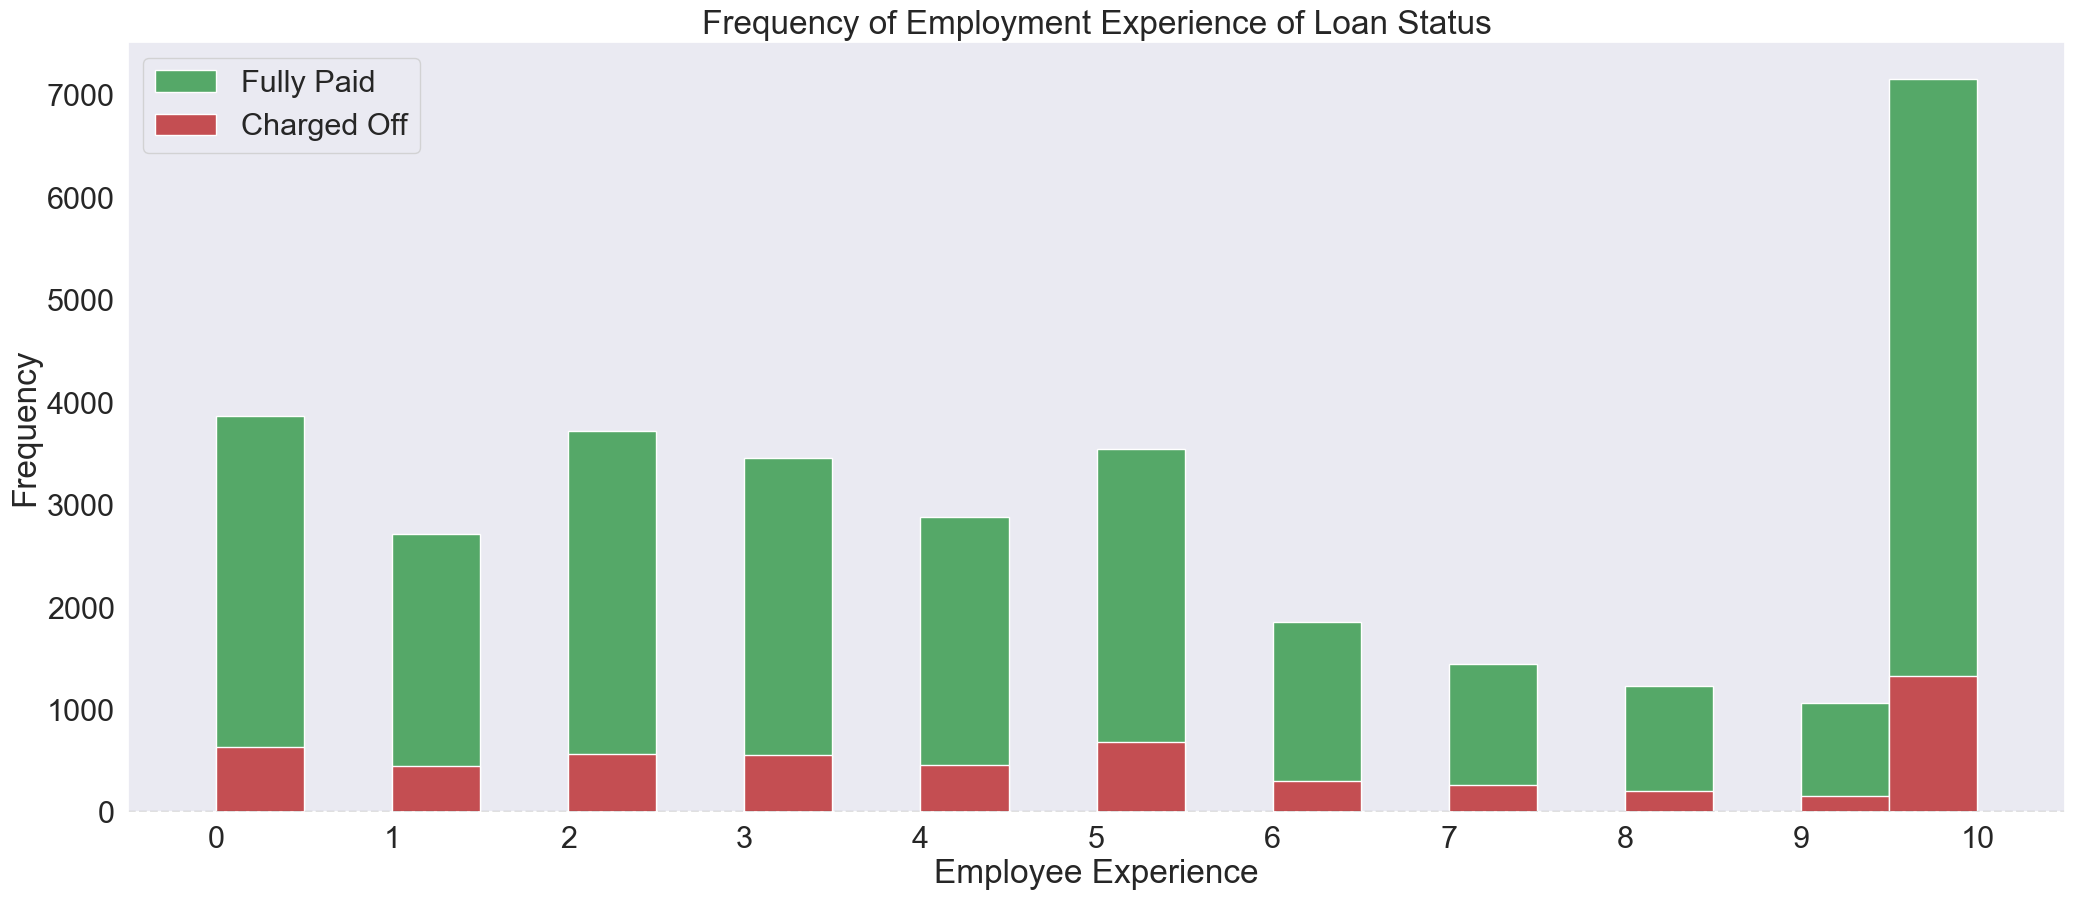

In [161]:
# Segmented analysis of employment length
mpt.rcdefaults()
sbn.set(font_scale=2)
sbn.set_style("dark")
mpt.figure(figsize=(25, 10))
emmp_len_nd = loan_main_df[loan_main_df.loan_status == 'Fully Paid']['emp_length']
emmp_len_d = loan_main_df[loan_main_df.loan_status == 'Charged Off'].emp_length
mpt.hist([emmp_len_nd], bins=20, color = "g", rwidth=50)
mpt.hist([emmp_len_d], bins=20, color = "r", rwidth=50)
mpt.xlabel("Employee Experience")
mpt.ylabel("Frequency")
mpt.legend(loan_main_df.loan_status)
mpt.xticks(np.arange(min(emmp_len_d), max(emmp_len_d)+1, 1))
mpt.axhline(0.18, color='k', linestyle = 'dashed')
mpt.title('Frequency of Employment Experience of Loan Status')
mpt.show()

#### Insights:
- Employees with higher work exp. (10+ years) tend to default more than those with lower work exp.
- One reason for borrowers employed longer defaulting more could be because they are taking larger loan amounts or they have higher expenses.

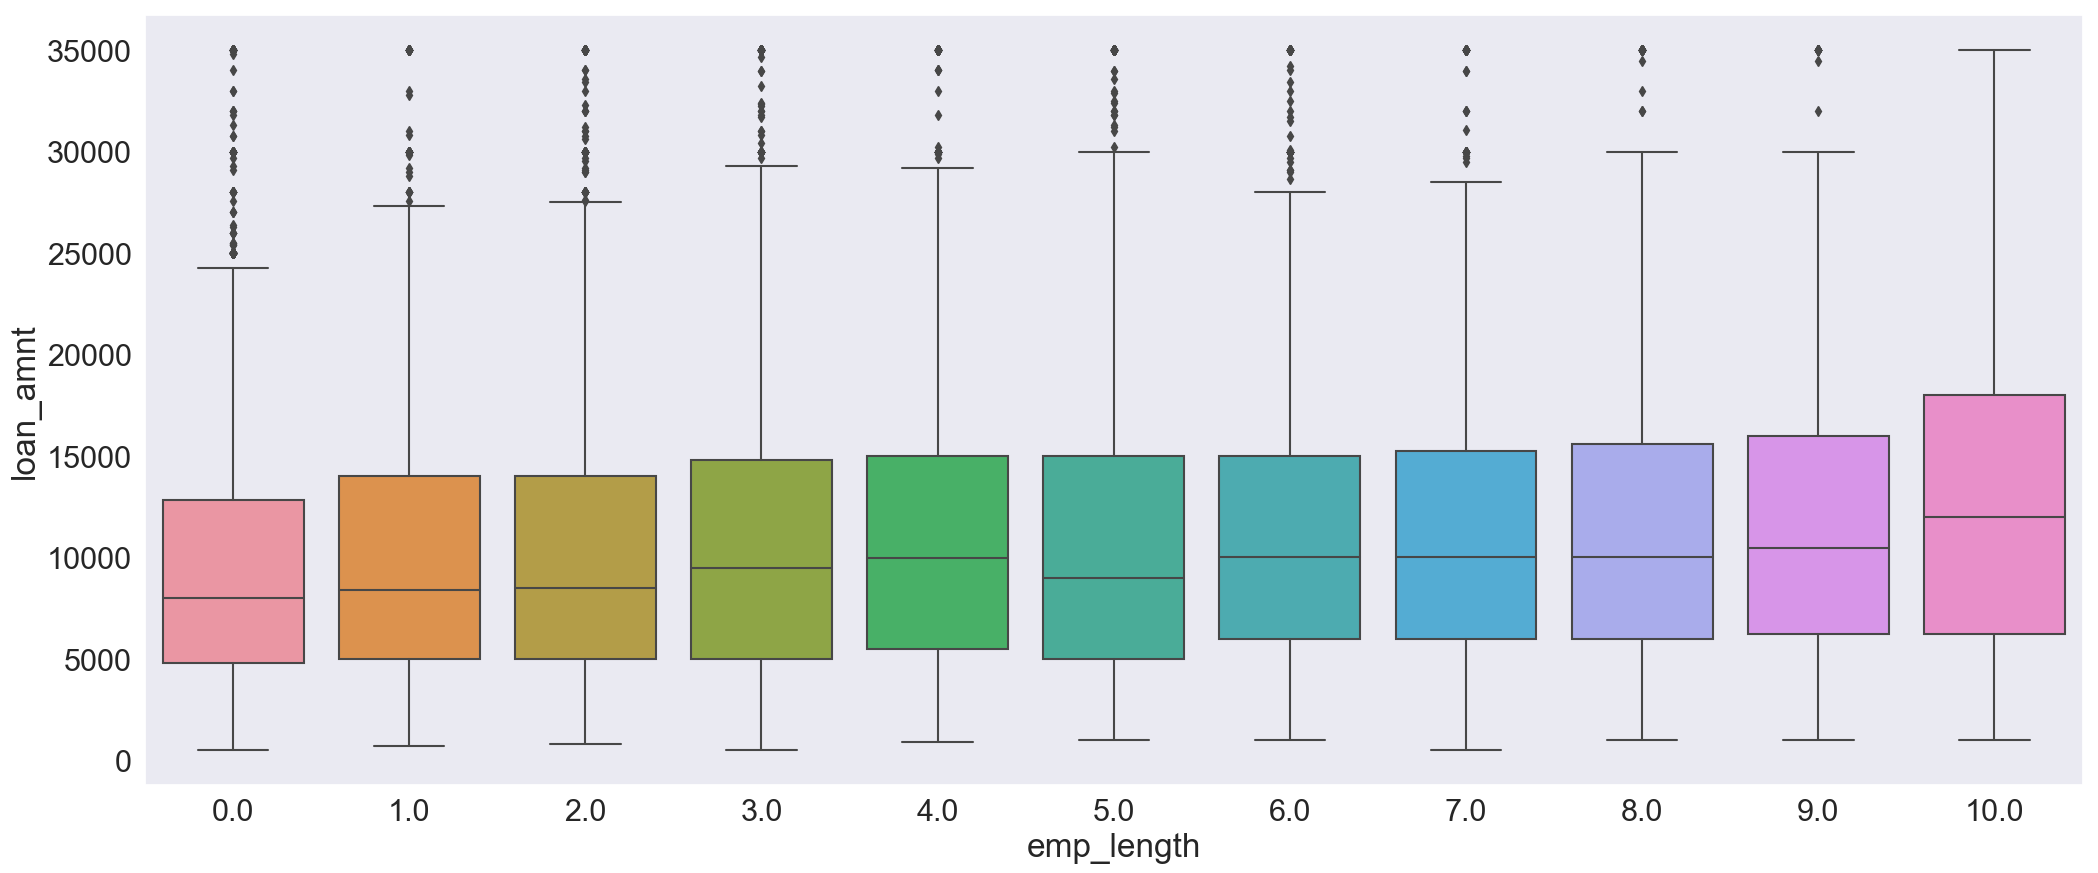

In [162]:
mpt.rcdefaults()
sbn.set(font_scale=2)
sbn.set_style("dark")
mpt.figure(figsize=(25, 10))
sbn.boxplot(x="emp_length", y="loan_amnt", data=loan_main_df)
mpt.show()

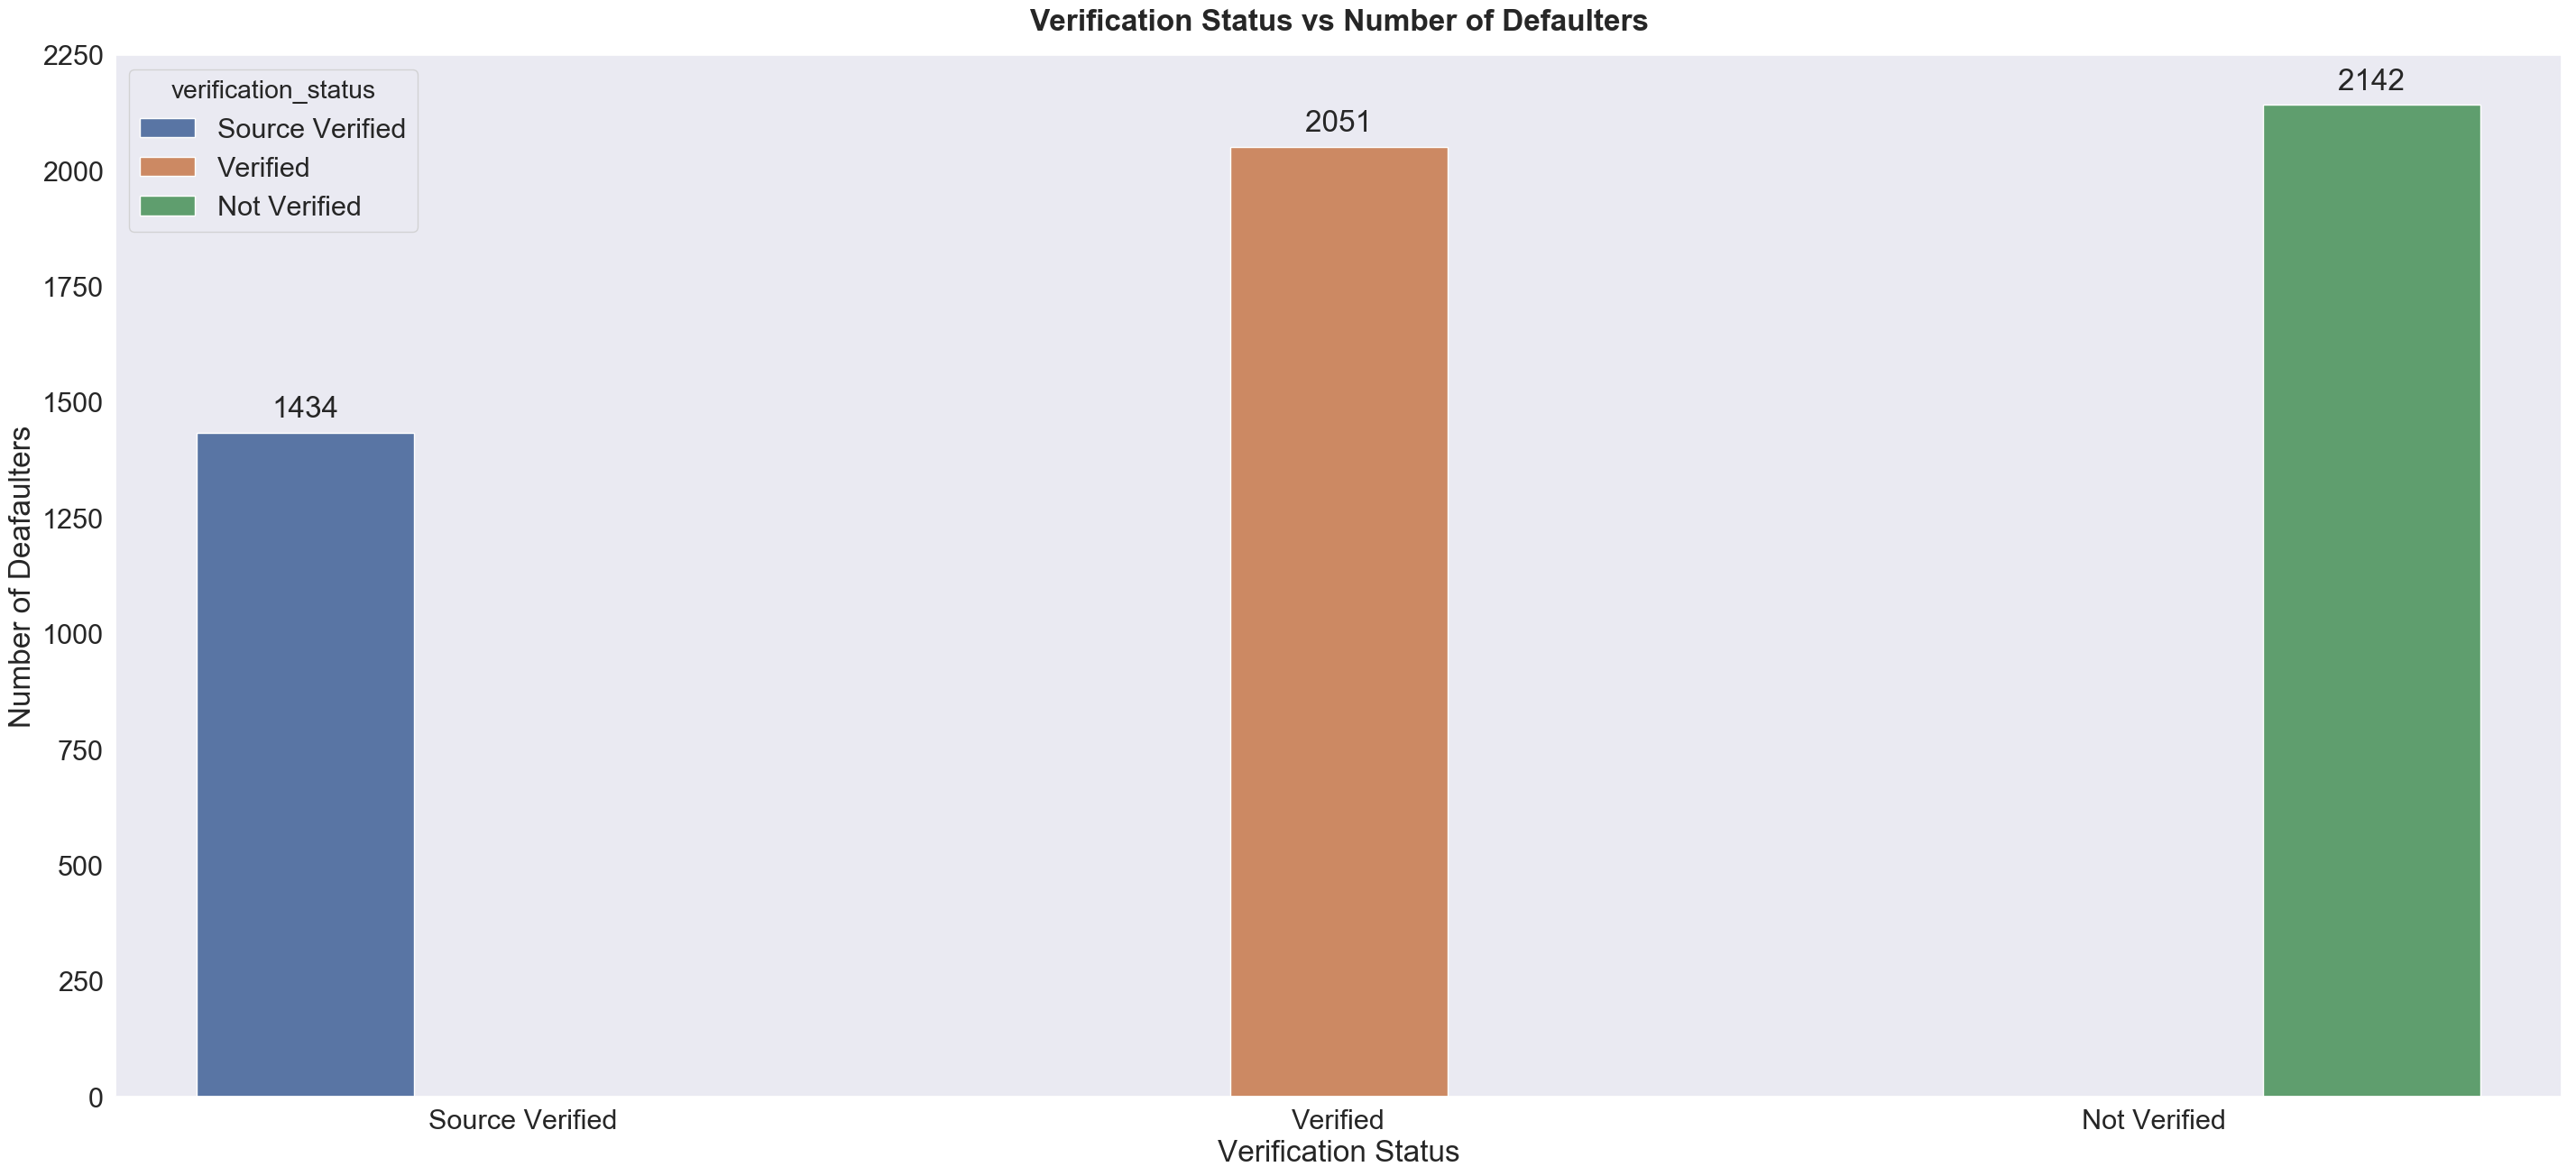

In [163]:
mpt.rcdefaults()
sbn.set(font_scale=2)
sbn.set_style("dark")
mpt.figure(figsize=(35, 15))
w = sbn.countplot(x="verification_status",hue = 'verification_status', data = loan_main_df[loan_main_df.loan_status == 'Charged Off'])
#show_values_on_bars(w)
mpt.xlabel("Verification Status")
mpt.ylabel('Number of Deafaulters')
# Annotations
for p in w.patches:
    height,width =p.get_height(),(p.get_x() + p.get_width() / 2.)
    if (~np.isnan(height)):
        w.annotate('{:.0f}'.format(height),(width, height+50),
                     ha='center', va='center')
mpt.title('Verification Status vs Number of Defaulters', fontdict={'fontsize':24,'fontweight':'bold'},loc='center',pad=20)
mpt.show()

#### Insights:
- The Plot shows employee verification status against the default loan Applicants. 
- It is very important to note, many applicants status are not verified by the bank, before lending to the 'high risky applicants'.<br>
- The number of not verified cases are `2142`.

In [164]:
#Analysis of Customer Home ownership versus Number of default loans
def_home_ownership = loan_main_df[loan_main_df.loan_status == 'Charged Off'].home_ownership.value_counts().reset_index()
def_home_ownership['percentage'] = 100 * (def_home_ownership.home_ownership/
                                              def_home_ownership.home_ownership.sum())
def_home_ownership

,index,home_ownership,percentage
0,RENT,2839,50.45
1,MORTGAGE,2327,41.35
2,OWN,443,7.87
3,OTHER,18,0.32


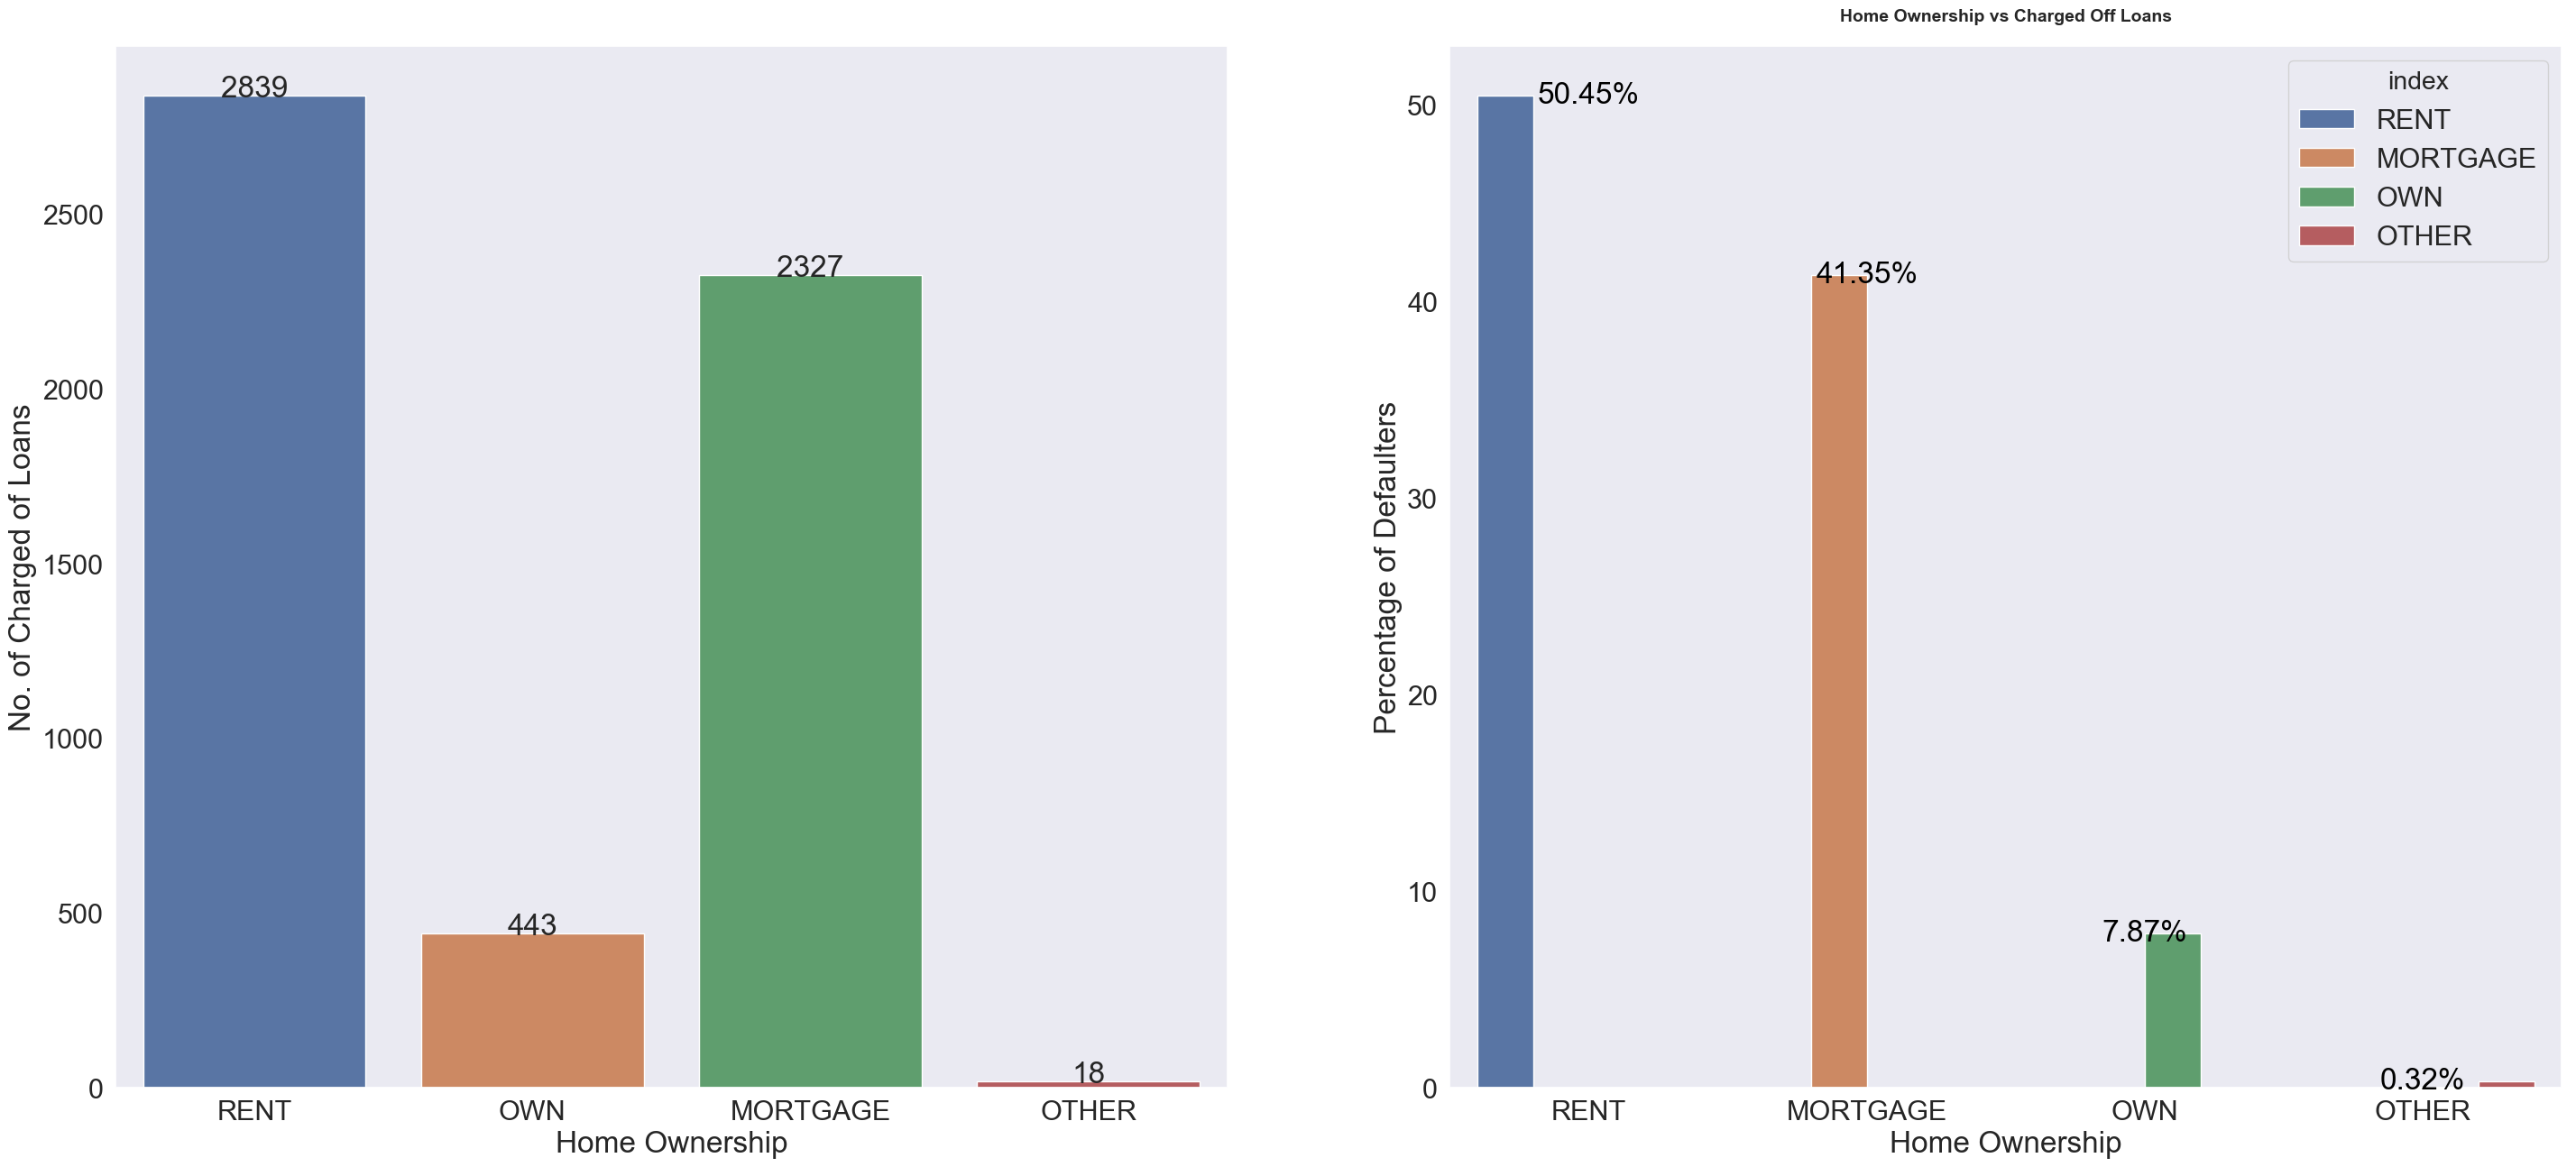

In [165]:
# Univariate Analysis - Plot-7 
# Analysis of Customer Home ownersip versus default Loan Status.
mpt.rcdefaults()
sbn.set(font_scale=2)
sbn.set_style("dark")
mpt.figure(figsize=(35, 15))
mpt.subplot(1,2,1)
w = sbn.countplot(x="home_ownership", data = loan_main_df[loan_main_df.loan_status == 'Charged Off'])
annotations(w,5,0)
mpt.xlabel("Home Ownership")
mpt.ylabel('No. of Charged of Loans')
mpt.subplot(1,2,2)
a = sbn.barplot(x='index',y='percentage',hue='index',data=def_home_ownership)
mpt.xlabel("Home Ownership")
for index,row in def_home_ownership.iterrows():
    a.text(x=row.name,y=row.percentage,s='{:}%'.format(round(row.percentage,2)), color='black',ha='center',va='center')
mpt.ylabel("Percentage of Defaulters")
mpt.title('Home Ownership vs Charged Off Loans', fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
mpt.show()

#### Insights:
> - The Plot indicate employees who are staying in RENT are the highest defaulters with high as 50% i.e., 2813 defaulters.
> - So, it is clear that most defaulters have rented (50.45%) or mortaged (41.09%) homes.

## 5. Bivariate Analysis
#### Bivariate  Correlation metrics for all the quantitative fields

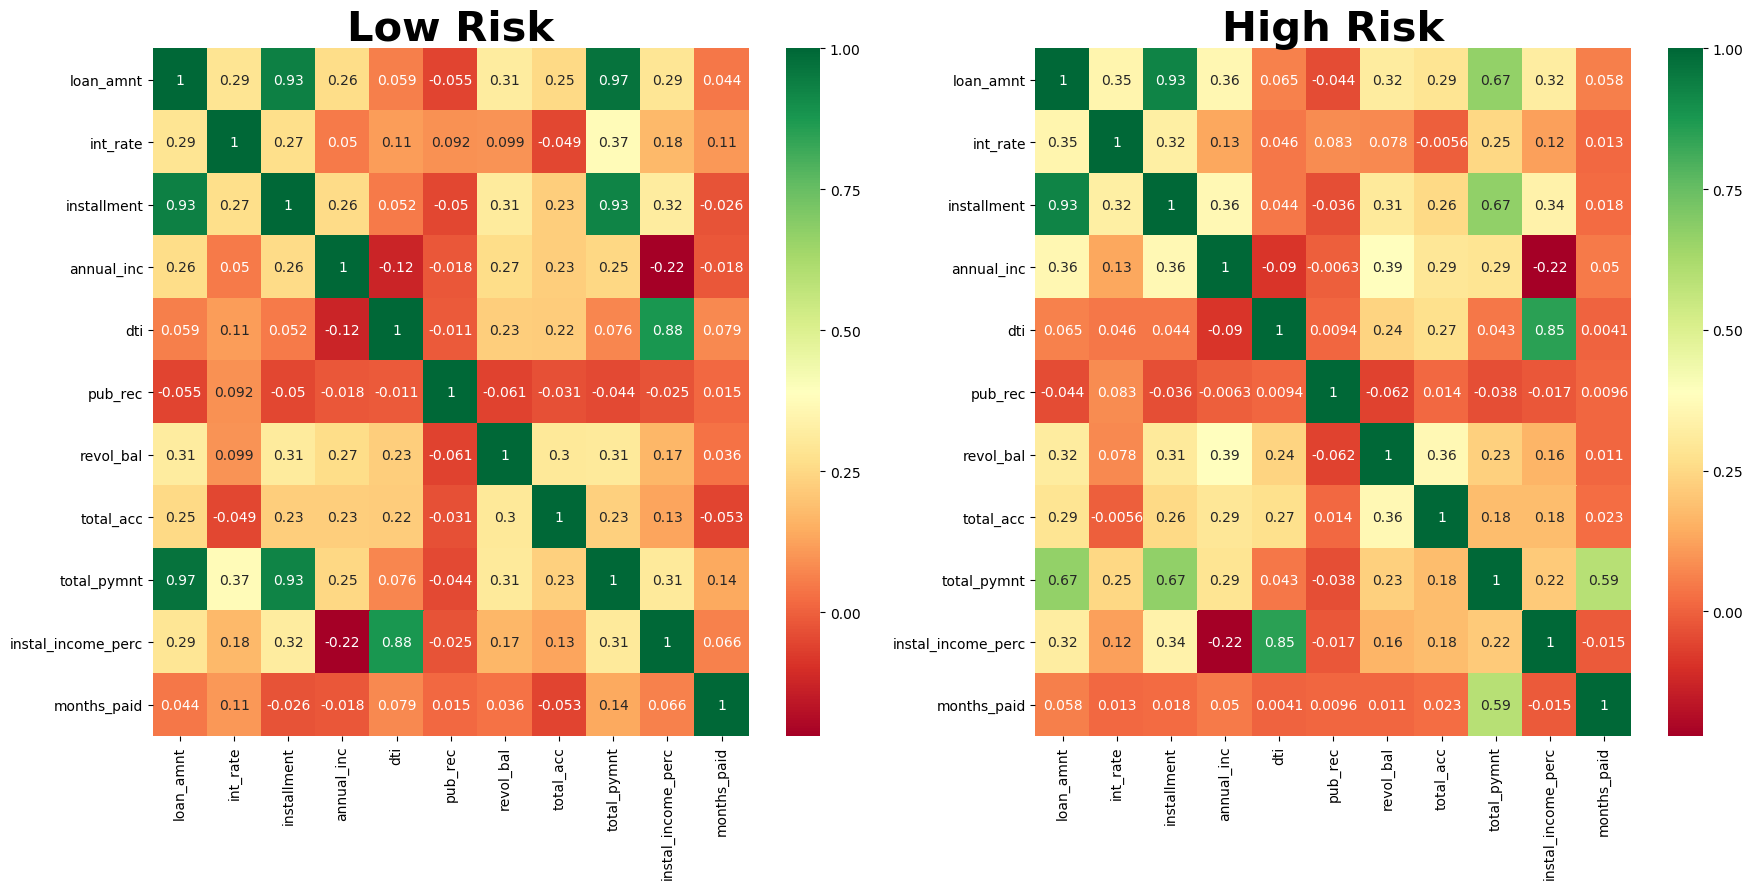

In [177]:
#Lets pick the variables that are relavent to analysis
#Lets Create two Data Frames One for High Risk and one for Low Risk

lowrisk = loan_main_df[(loan_main_df.risk_category=='Low Risk')][['loan_amnt', 'int_rate', 'installment', 'annual_inc', 
                                                           'dti',  'pub_rec', 'revol_bal', 
                                                           'total_acc',  'total_pymnt','instal_income_perc','months_paid']].corr()
highrisk = loan_main_df[(loan_main_df.risk_category=='High Risk')][['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 
                                                            'pub_rec', 'revol_bal', 'total_acc', 
                                                            'total_pymnt', 'instal_income_perc','months_paid']].corr()

mpt.rcdefaults()
fig, (ax1, ax2) = mpt.subplots(1,2, figsize=(18, 9))
ax1.set_title("Low Risk", fontsize=30, fontweight="bold")
ax2.set_title("High Risk", fontsize=30, fontweight="bold")
sbn.heatmap(lowrisk , ax=ax1, annot = True, cmap='RdYlGn' )
sbn.heatmap(highrisk, ax=ax2, annot = True, cmap='RdYlGn')
mpt.tight_layout()
mpt.show()

#### Insights:
- One of the key insight is ratio of pub_rec to total_acc. In case of Low Risk it is negative where as in case of high risk category it is positive.
- Revolving Balance to Annual income has a 12% positive correlation in high risk category. i.e. Outstanding credit is increasing with increased annual income. It is a behavioural sign.
- dti to Interest rate is also different in both profiles. In case of low risk if dti is increasing int_rate is increasing to compensate the risk. But in High risk profiles, int_rate is lower ro similar dti.
- Incase of low risk profile, Annual income to installment is at 26%. However in high risk profiles Annual income to installment is 36%.


In [178]:
# Check what percentage of loan is being paid. 1 indicates complete loan is paid and 0 indicate nothing is paid.
loan_main_df['diff_principle'] =  loan_main_df['total_rec_prncp']/loan_main_df['loan_amnt']

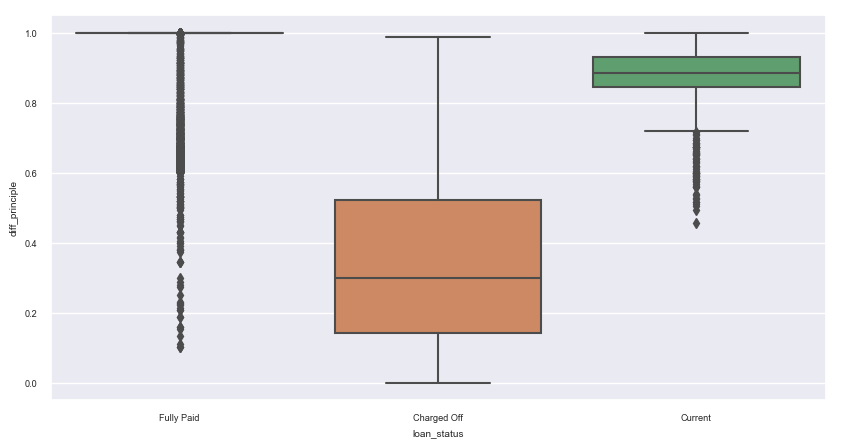

In [179]:
sbn.set(font_scale=.6)
mpt.figure(figsize=(10, 5),  facecolor='w', edgecolor='k')
sbn.boxplot(x='loan_status', y='diff_principle',   data=loan_main_df)
mpt.show()

**Insight**
- Most people become defaulters before paying 30% of loan amount.
- Fully paid also have an outstanding principle. So this column data may not be completly relied on.

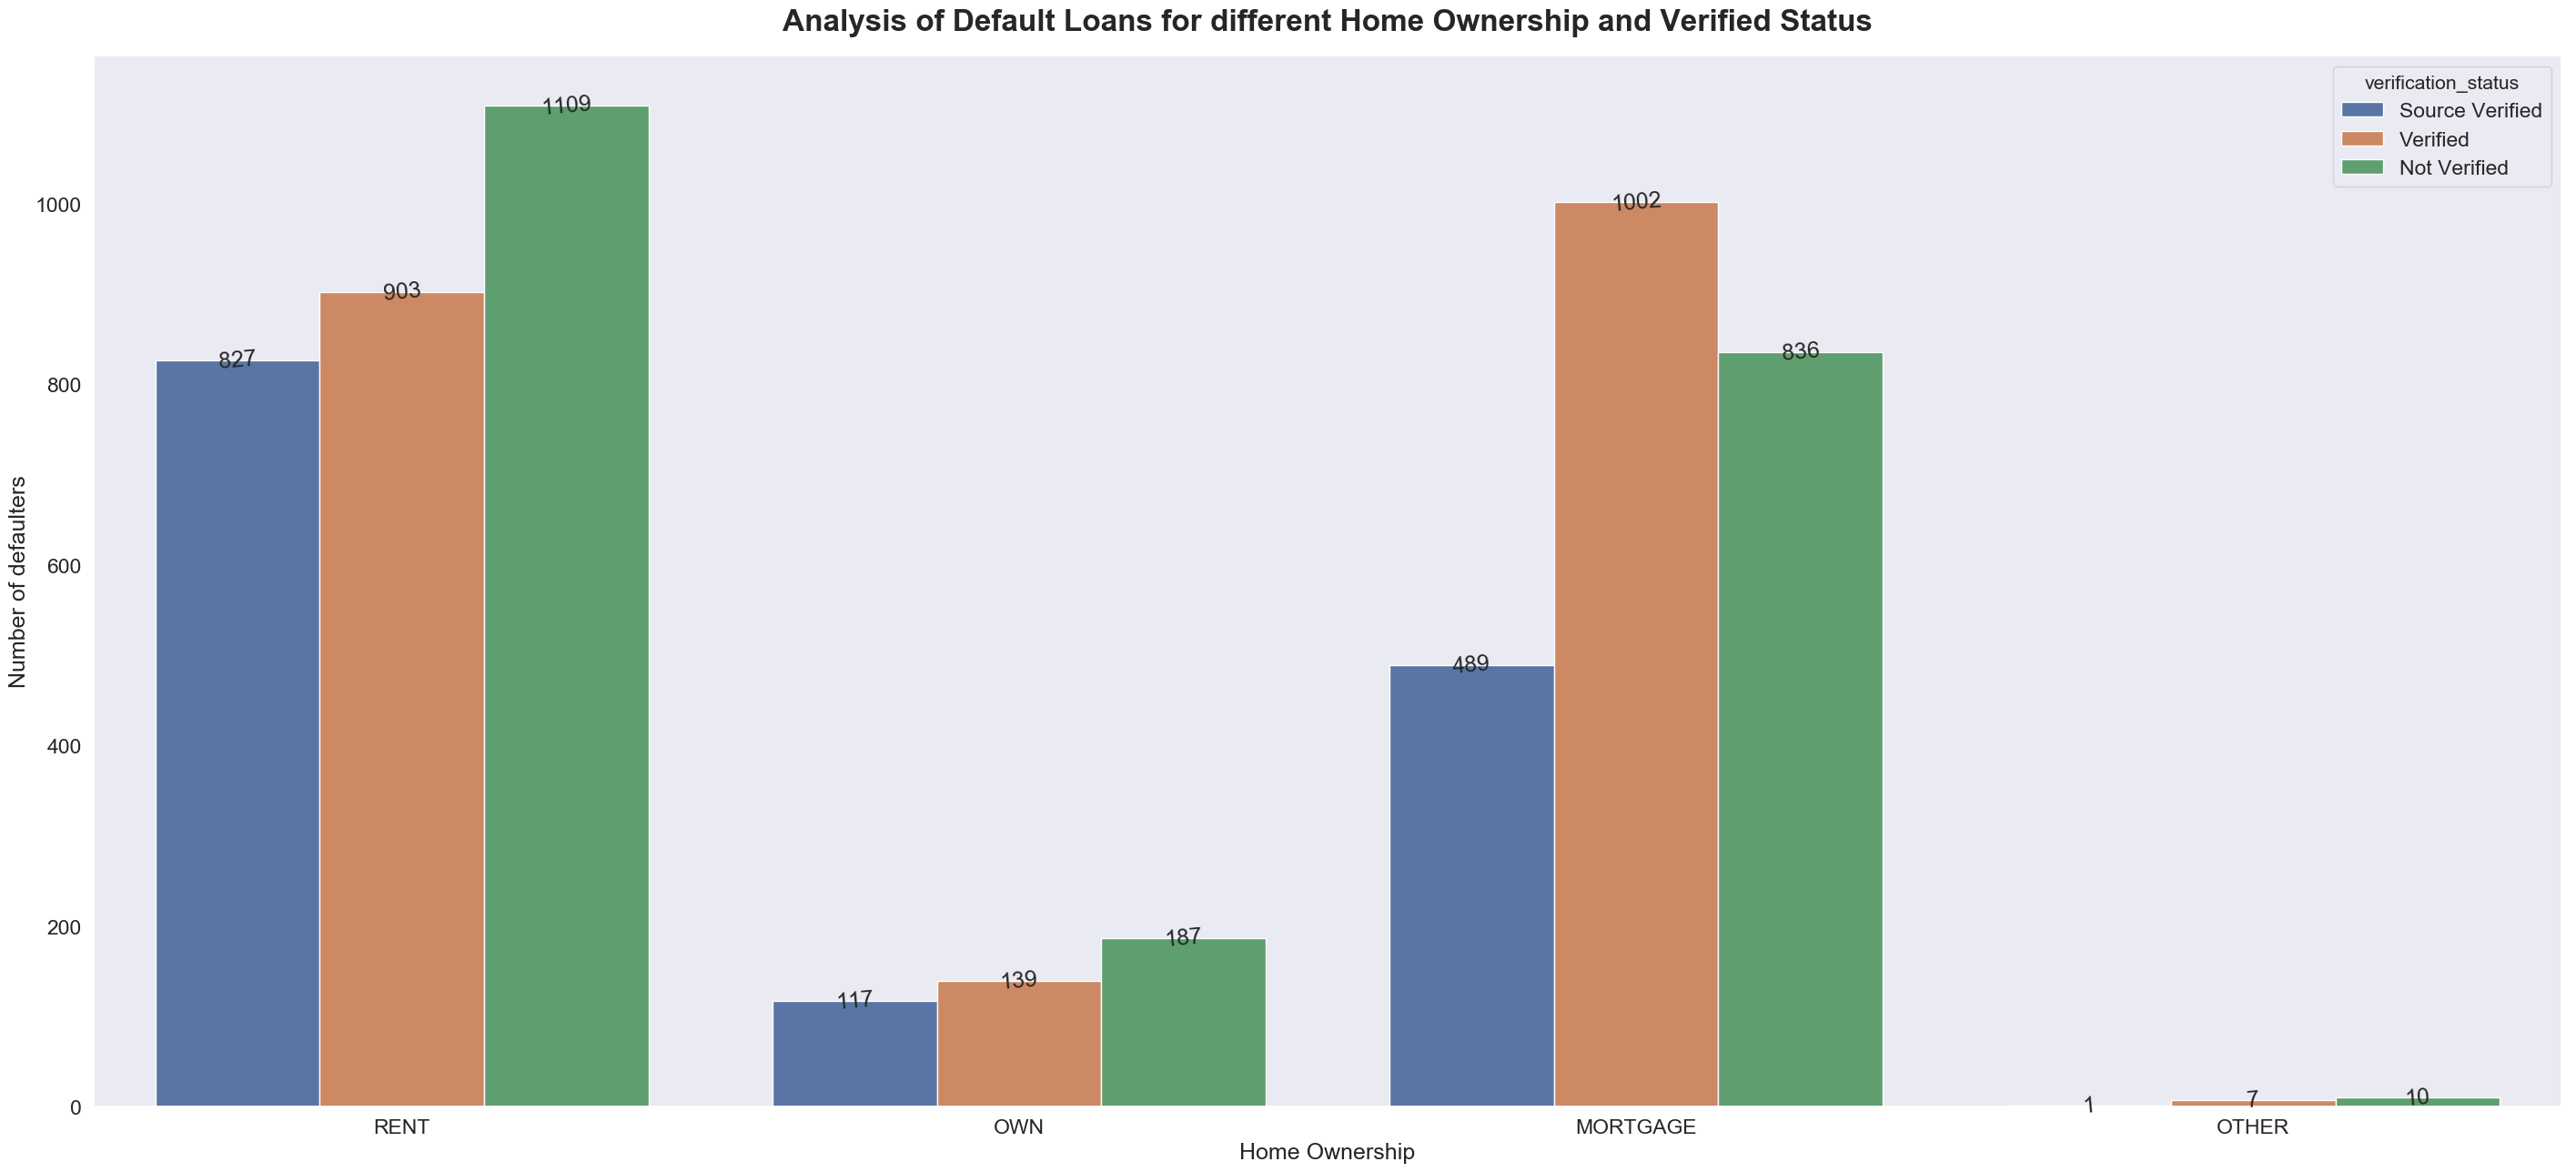

In [180]:
# Bivariate Analaysis Plot-1
# AAnalysis of Default Loans for different Home Ownership and Verified Status

mpt.rcdefaults()
sbn.set(font_scale=1.5)
sbn.set_style("dark")
mpt.figure(figsize=(35, 15))
wx = sbn.countplot(x="home_ownership",hue='verification_status', data = loan_main_df[loan_main_df.loan_status == 'Charged Off'])
annotations(wx,0,5)
mpt.xlabel("Home Ownership")
mpt.ylabel('Number of defaulters')
mpt.title('Analysis of Default Loans for different Home Ownership and Verified Status', fontdict={'fontsize':24,'fontweight':'bold'},loc='center',pad=20)
mpt.show()

#### Insights:
- The Plot shows, majority defaulters in the in the RENT category.
- In that, around `1109`  cases in which source was `not verified`  indicating the huge risk.

In [181]:
### Splitting the annual income of the applicants into specific income Intervals.
c = loan_main_df[loan_main_df.loan_status == 'Charged Off'].assign(range=pd.cut(loan_main_df['annual_inc'],\
                    [0,5000,15000,30000,60000,80000,120000,200000,500000,1250000],
                    labels=['Lowest income','Medium_Income','Below_average','average','Above_average',\
                            'high','higher','Above_higher','highest'] ))

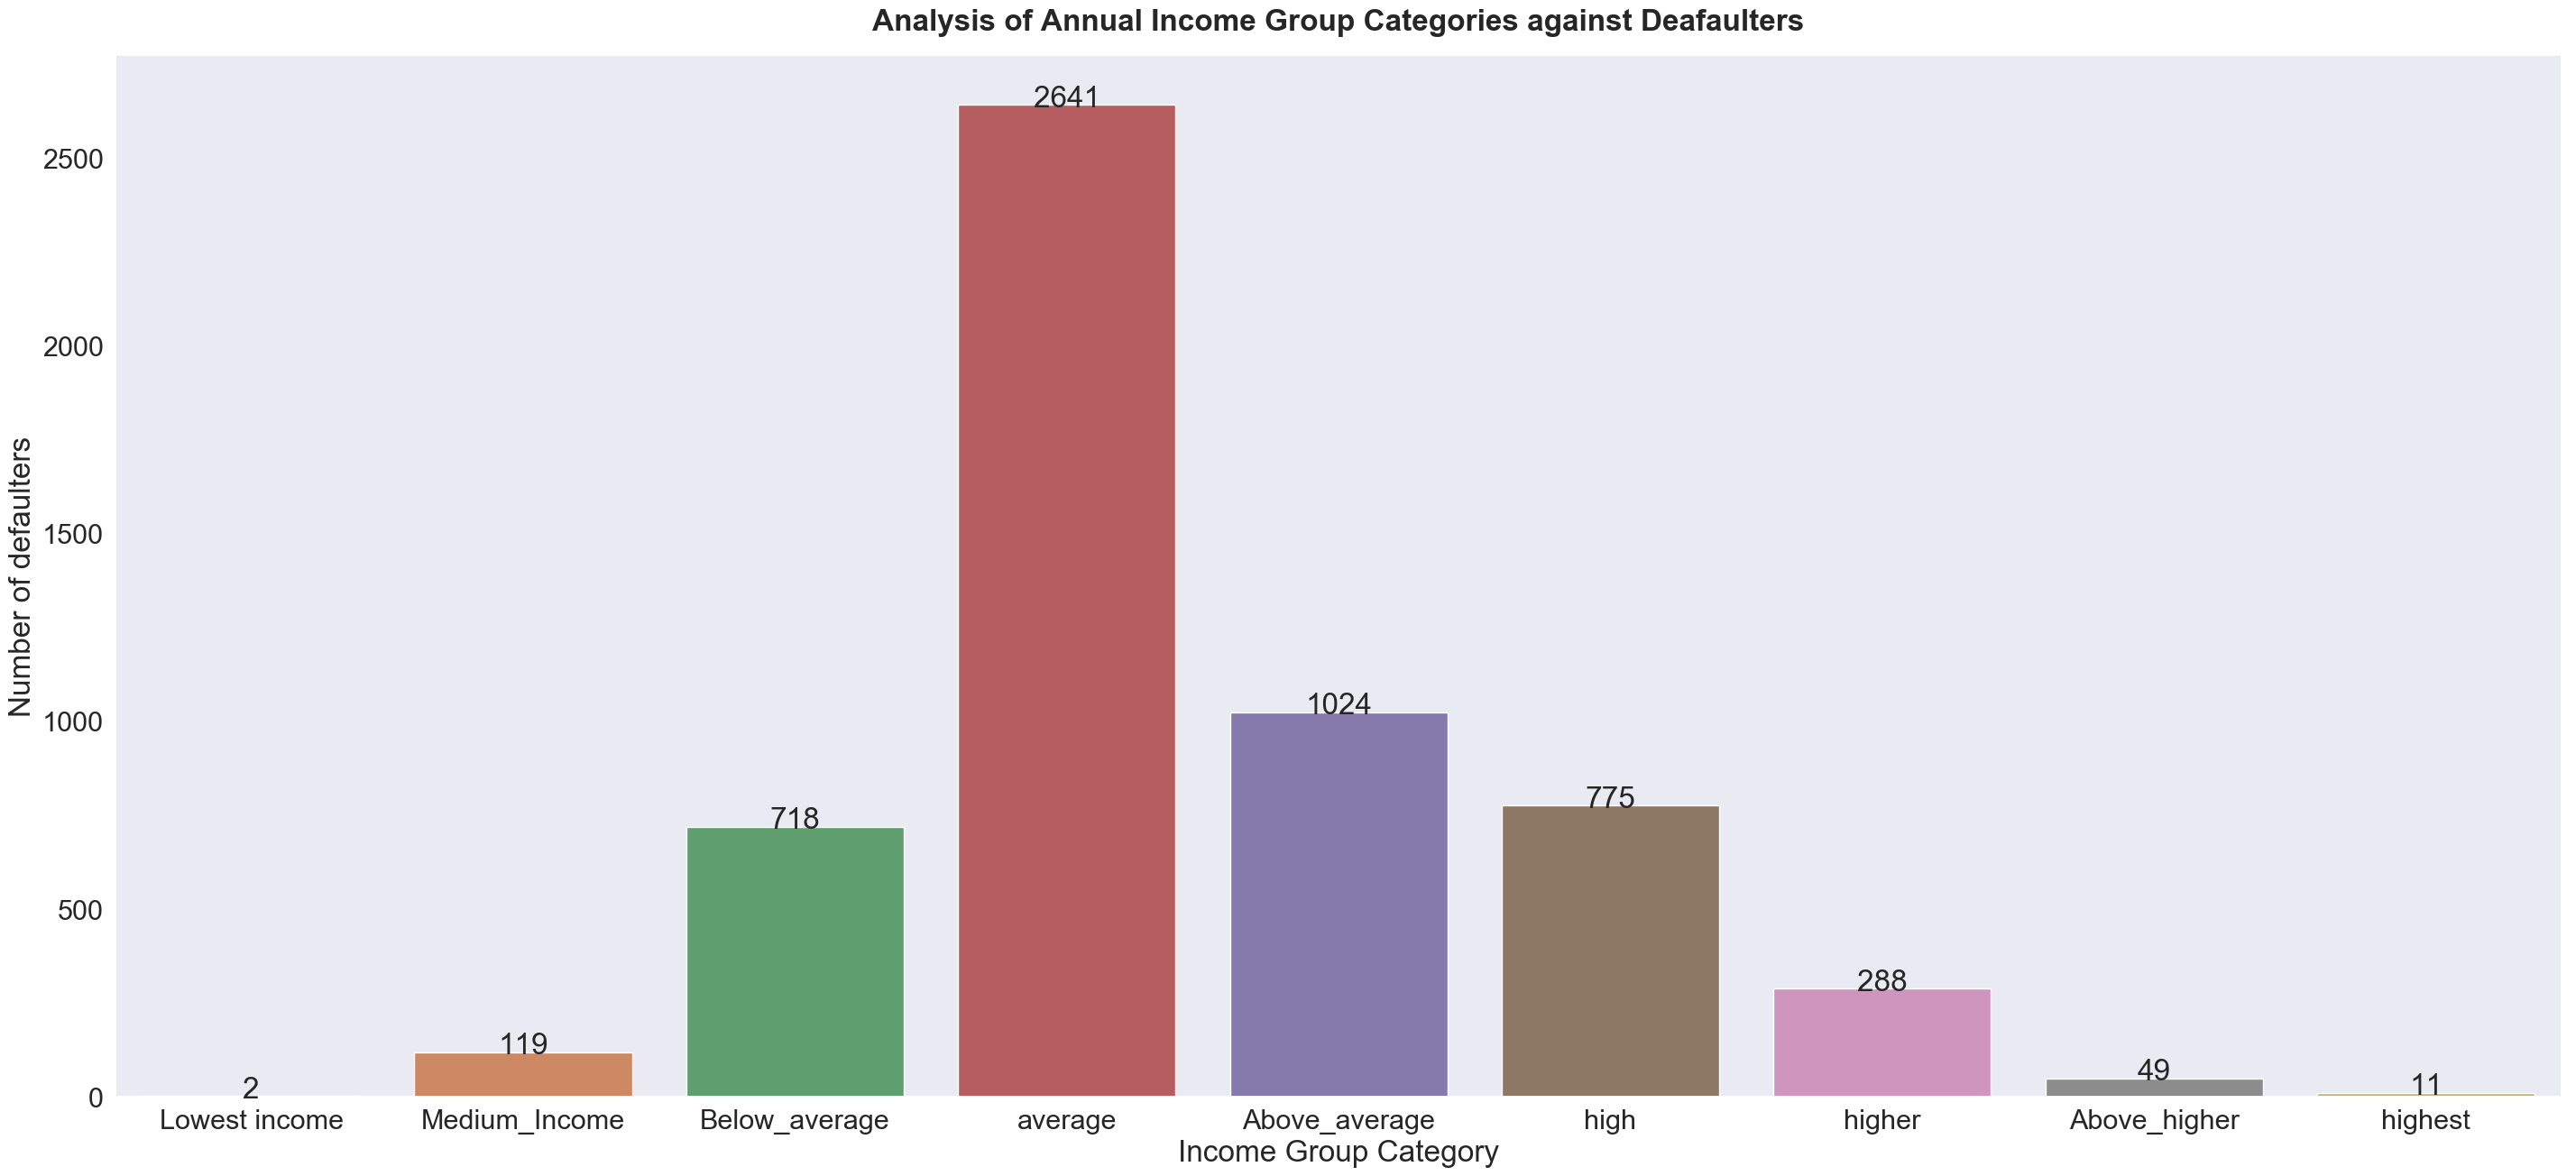

In [182]:
# Bivariate Analaysis Plot-2
# Analysis of Income Interval Against Charged-Off Loans
mpt.rcdefaults()
sbn.set(font_scale=2)
sbn.set_style("dark")
mpt.figure(figsize=(35, 15))
ax = sbn.countplot(x="range", data = c)
mpt.xlabel("Income Group Category")
mpt.ylabel('Number of defaulters')
mpt.title('Analysis of Annual Income Group Categories against Deafaulters', fontdict={'fontsize':24,'fontweight':'bold'},loc='center',pad=20)
annotations(ax,5,0) 
mpt.show()

#### Insights:
- Maximum defaulters are in annual income range of `30000 - 60000`.

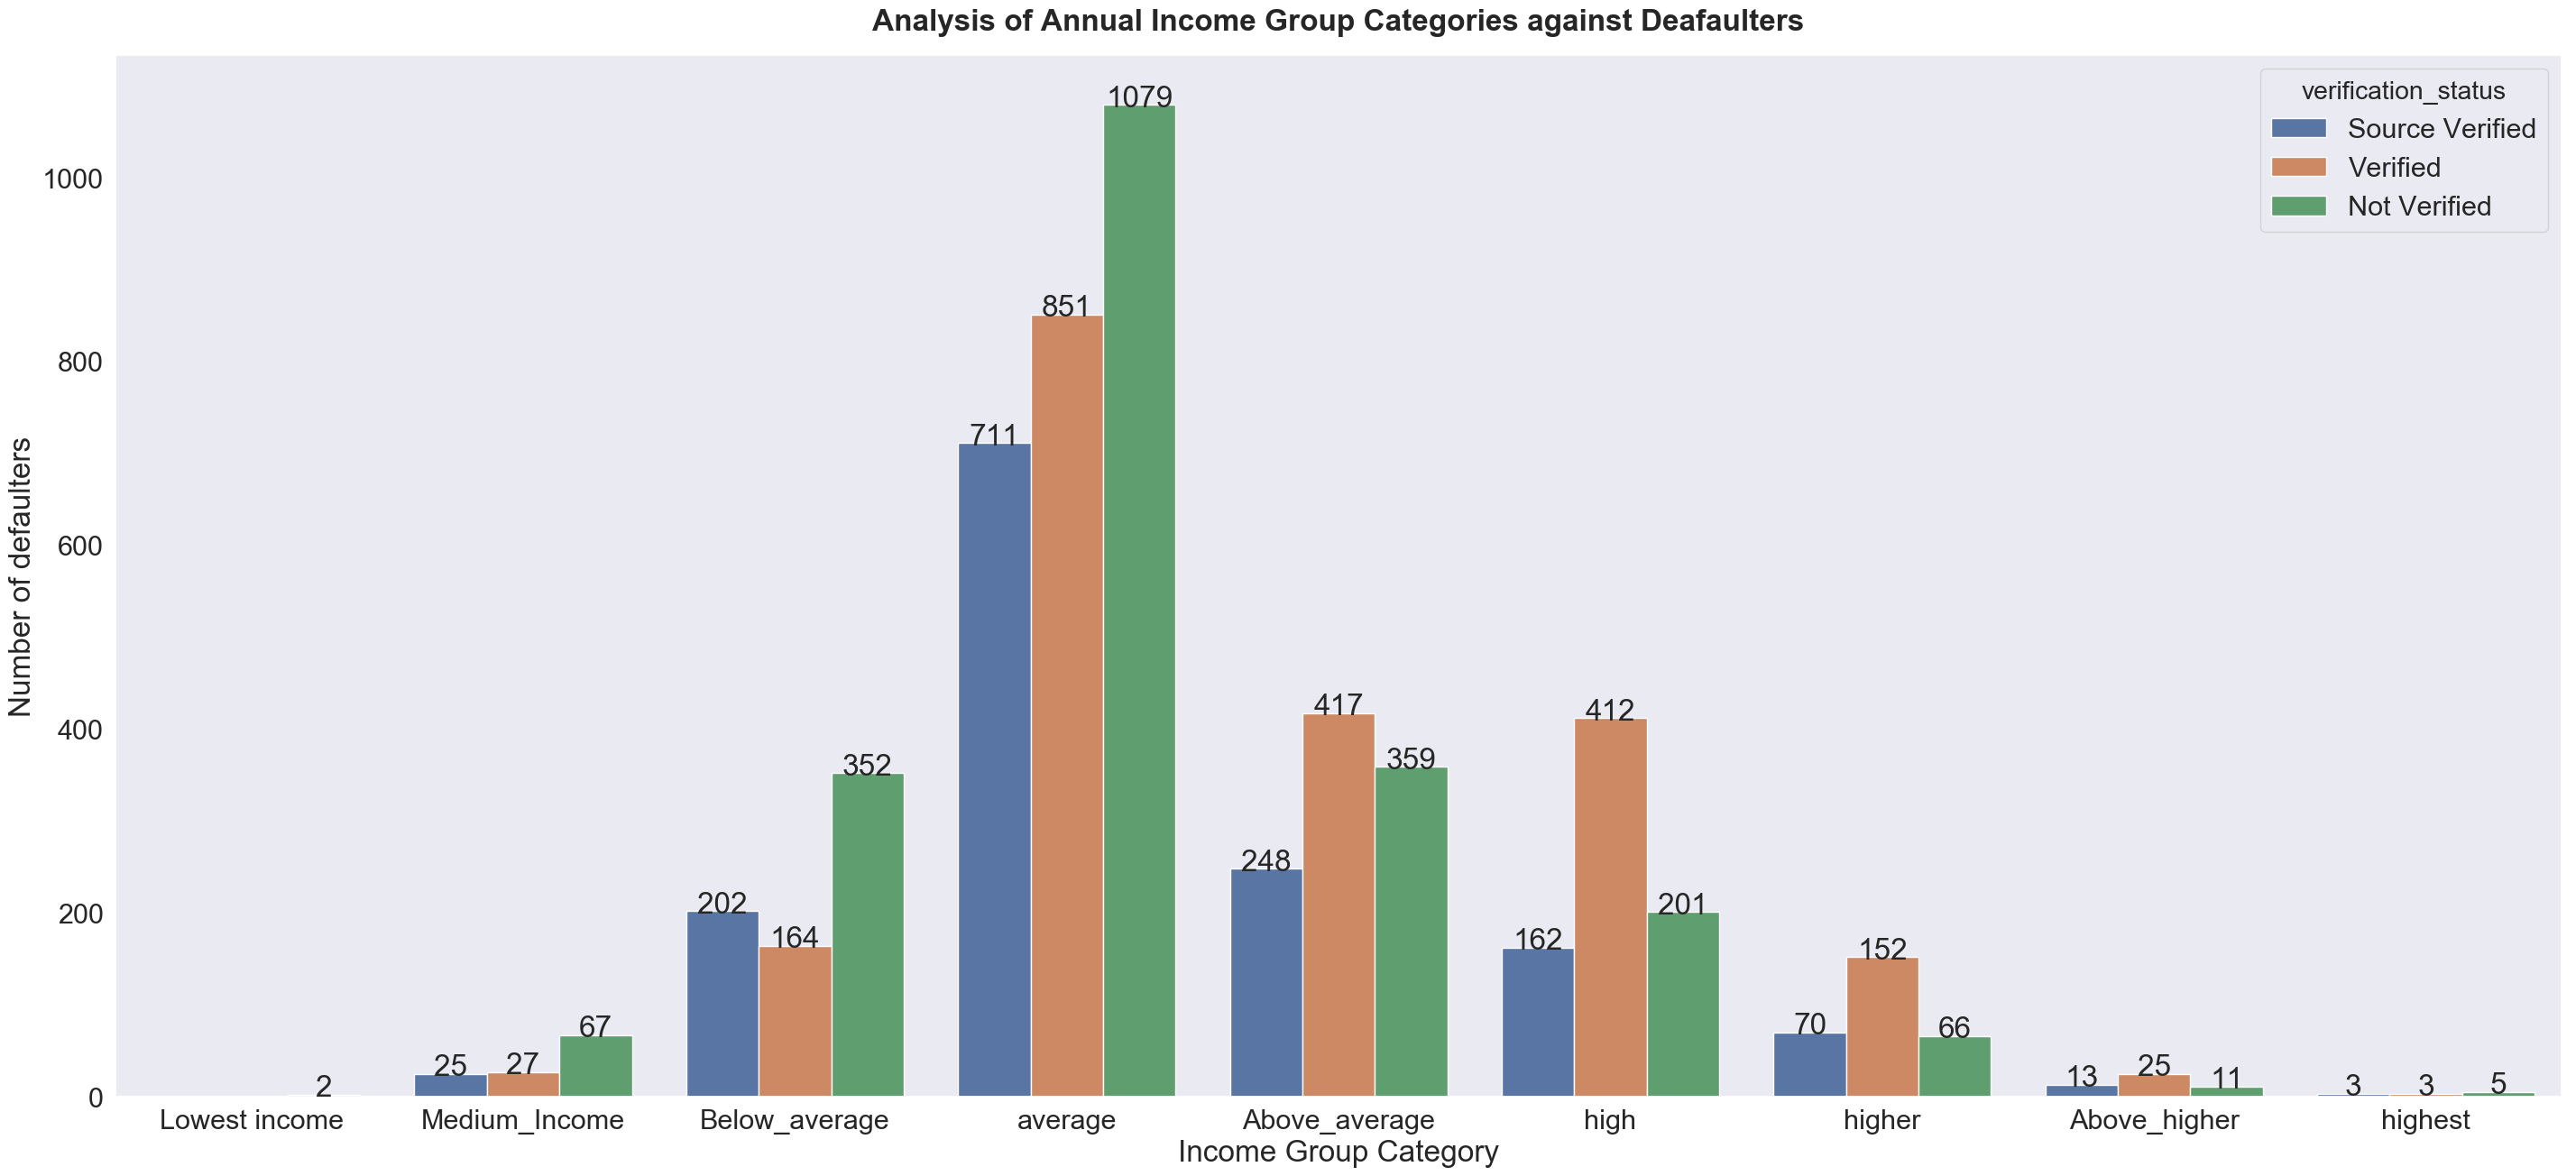

In [183]:
mpt.rcdefaults()
sbn.set(font_scale=2)
sbn.set_style("dark")
mpt.figure(figsize=(35, 15))
wx = sbn.countplot(x="range", hue='verification_status', data = c)
#show_values_on_bars(wx)
mpt.xlabel("Income Group Category")
mpt.ylabel('Number of defaulters')
mpt.title('Analysis of Annual Income Group Categories against Deafaulters', fontdict={'fontsize':24,'fontweight':'bold'},loc='center',pad=20)
annotations(wx,5,0)
mpt.show()

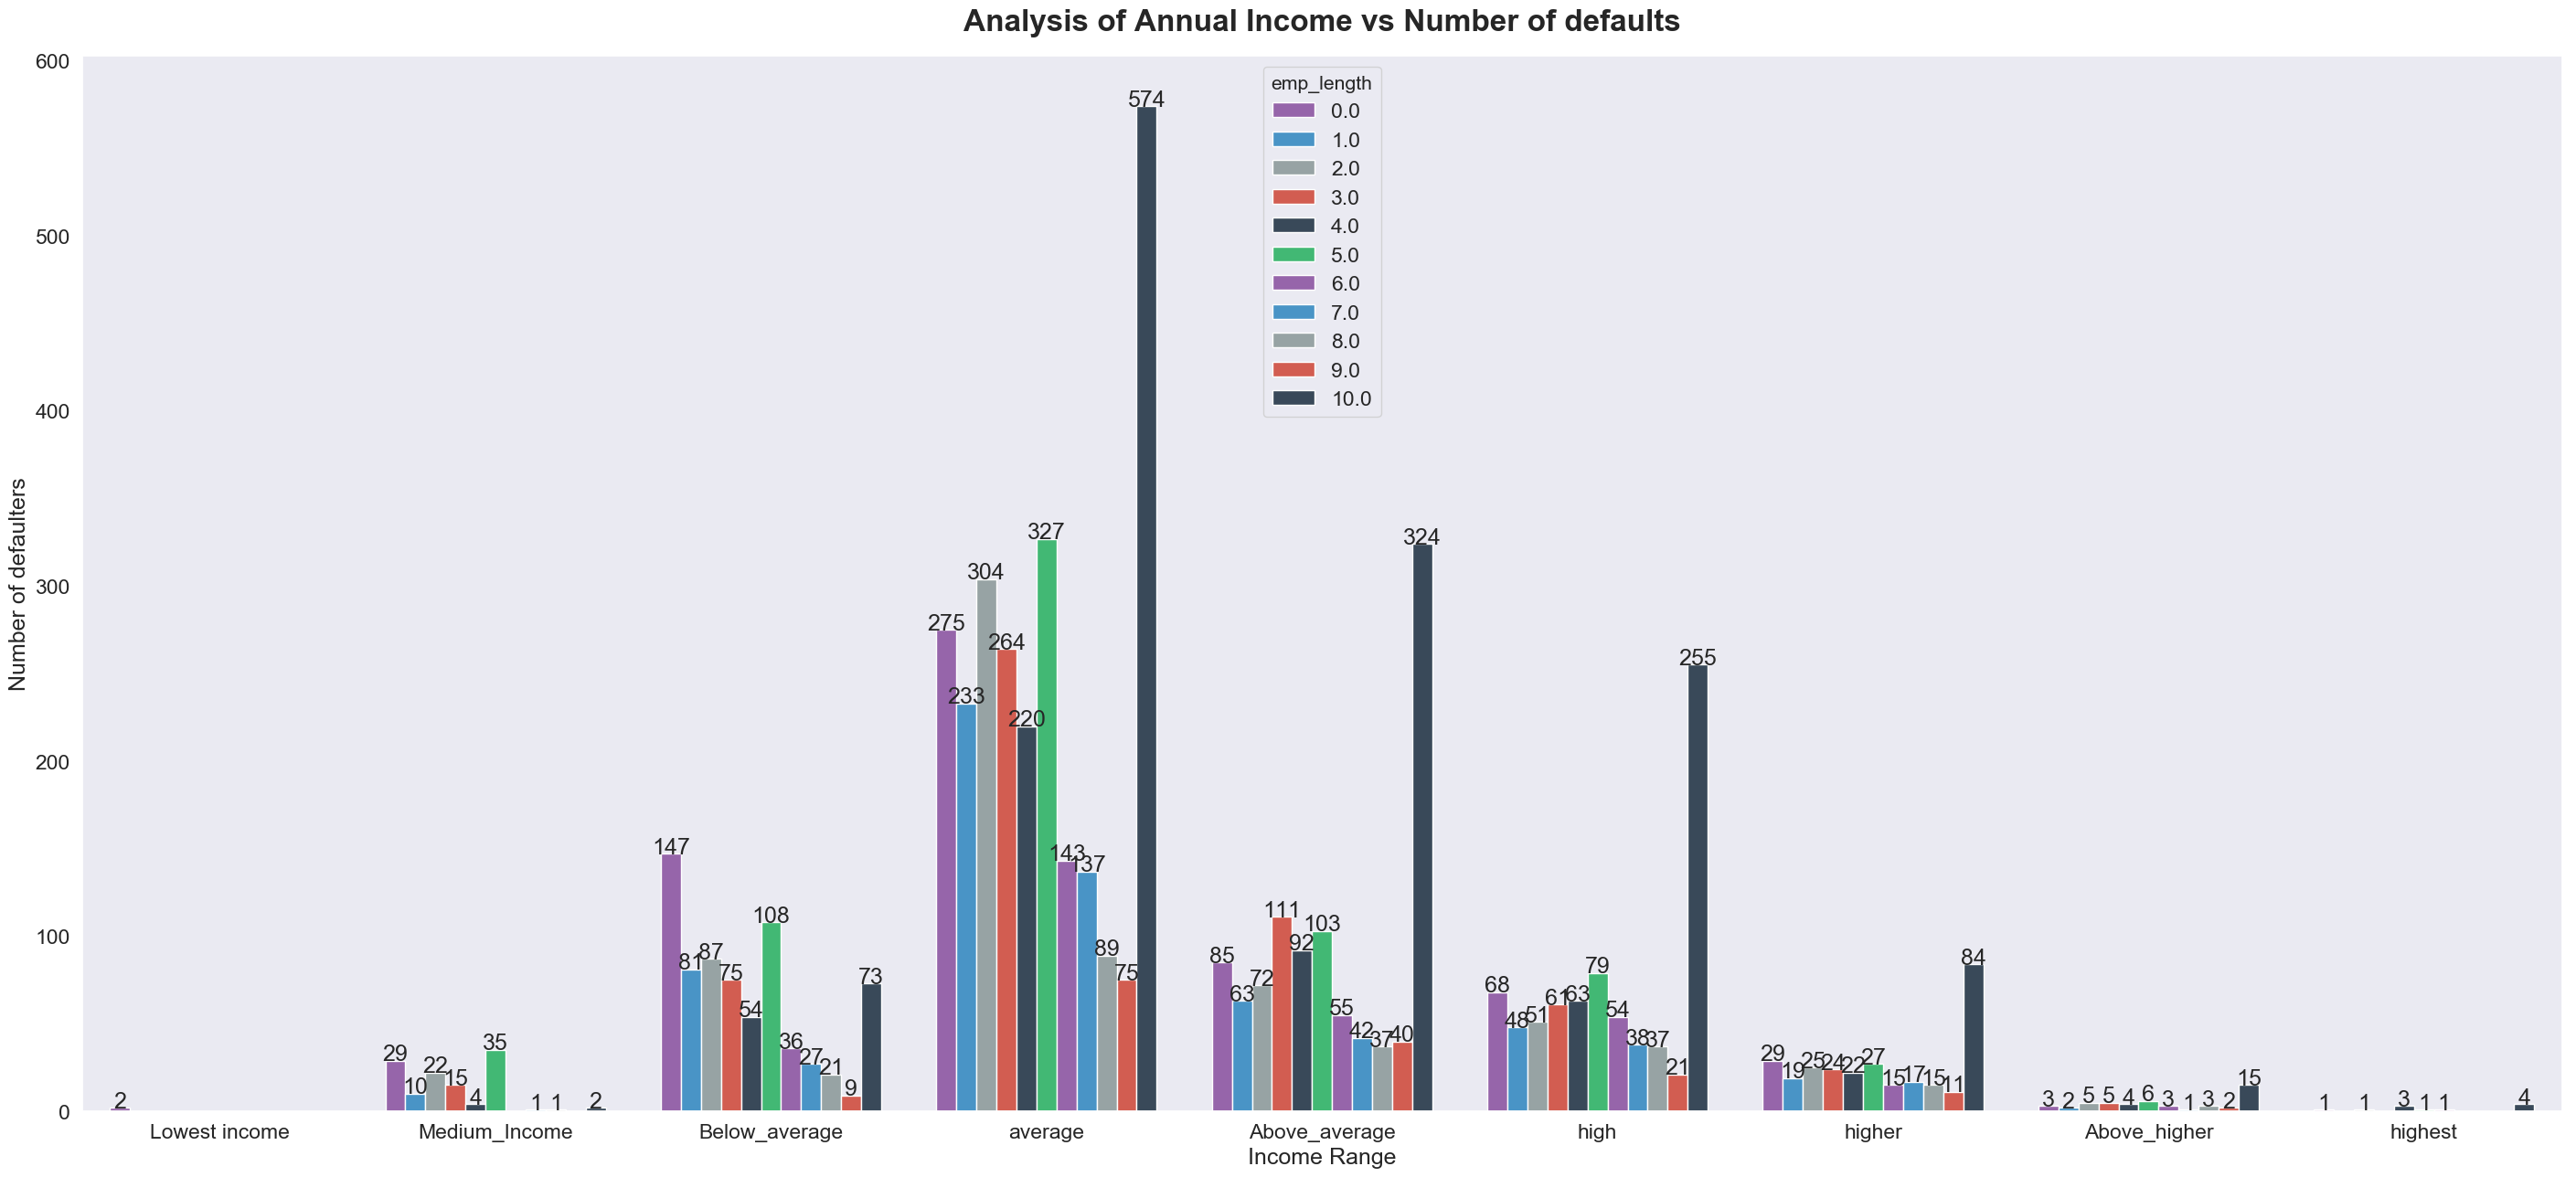

In [184]:
mpt.rcdefaults()
sbn.set(font_scale=1.5)
sbn.set_style("dark")
mpt.figure(figsize=(35, 15))
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
wx = sbn.countplot(x="range", hue='emp_length', data = c, palette=sbn.color_palette(flatui))
mpt.xlabel("Income Range")
mpt.ylabel('Number of defaulters')
mpt.title('Analysis of Annual Income vs Number of defaults', fontdict={'fontsize':24,'fontweight':'bold'},loc='center',pad=20)
annotations(wx,5,0)
mpt.show()

#### Insights:
 - The Plot  shows ;Employee in the Average income zone(30000 - 60000) having experience >= 10 years are peak Defaulters.

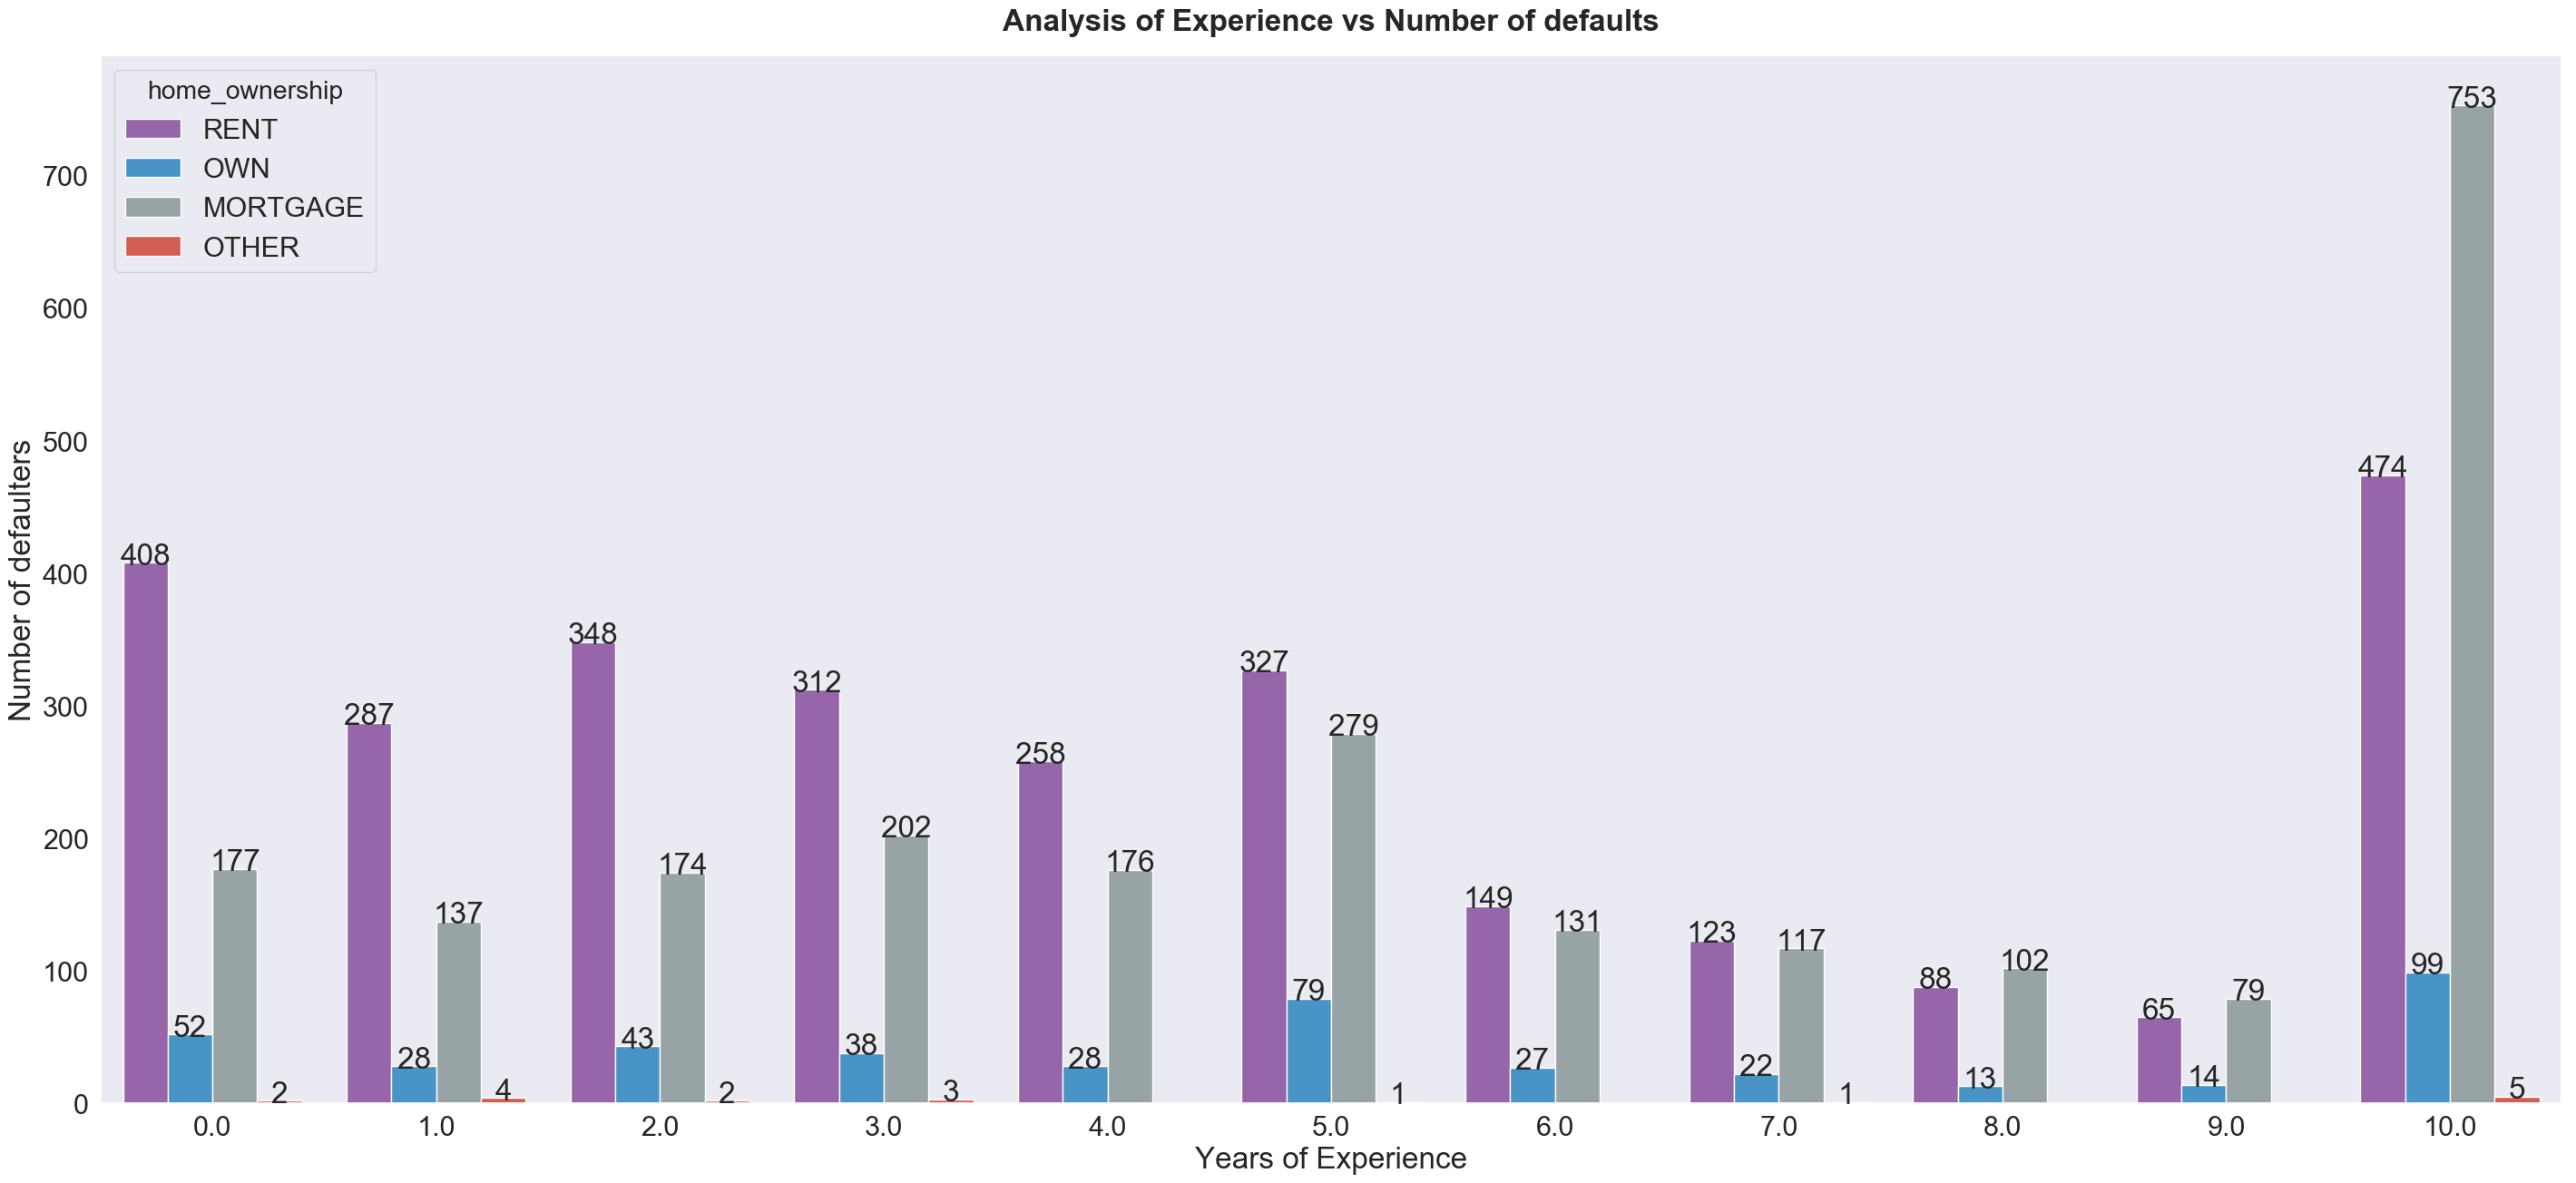

In [185]:
mpt.rcdefaults()
sbn.set(font_scale=2)
sbn.set_style("dark")
mpt.figure(figsize=(35, 15))
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
wx = sbn.countplot(x="emp_length",hue = "home_ownership", data = c, palette=sbn.color_palette(flatui))
#show_values_on_bars(wx)
mpt.xlabel("Years of Experience")
mpt.ylabel('Number of defaulters')
mpt.title('Analysis of Experience vs Number of defaults', fontdict={'fontsize':24,'fontweight':'bold'},loc='center',pad=20)
annotations(wx,5,0)
mpt.show()

#### Insights:
- The Plot  showsApplicants who dont own a House after 10 or more years of Experience have a high default rate.

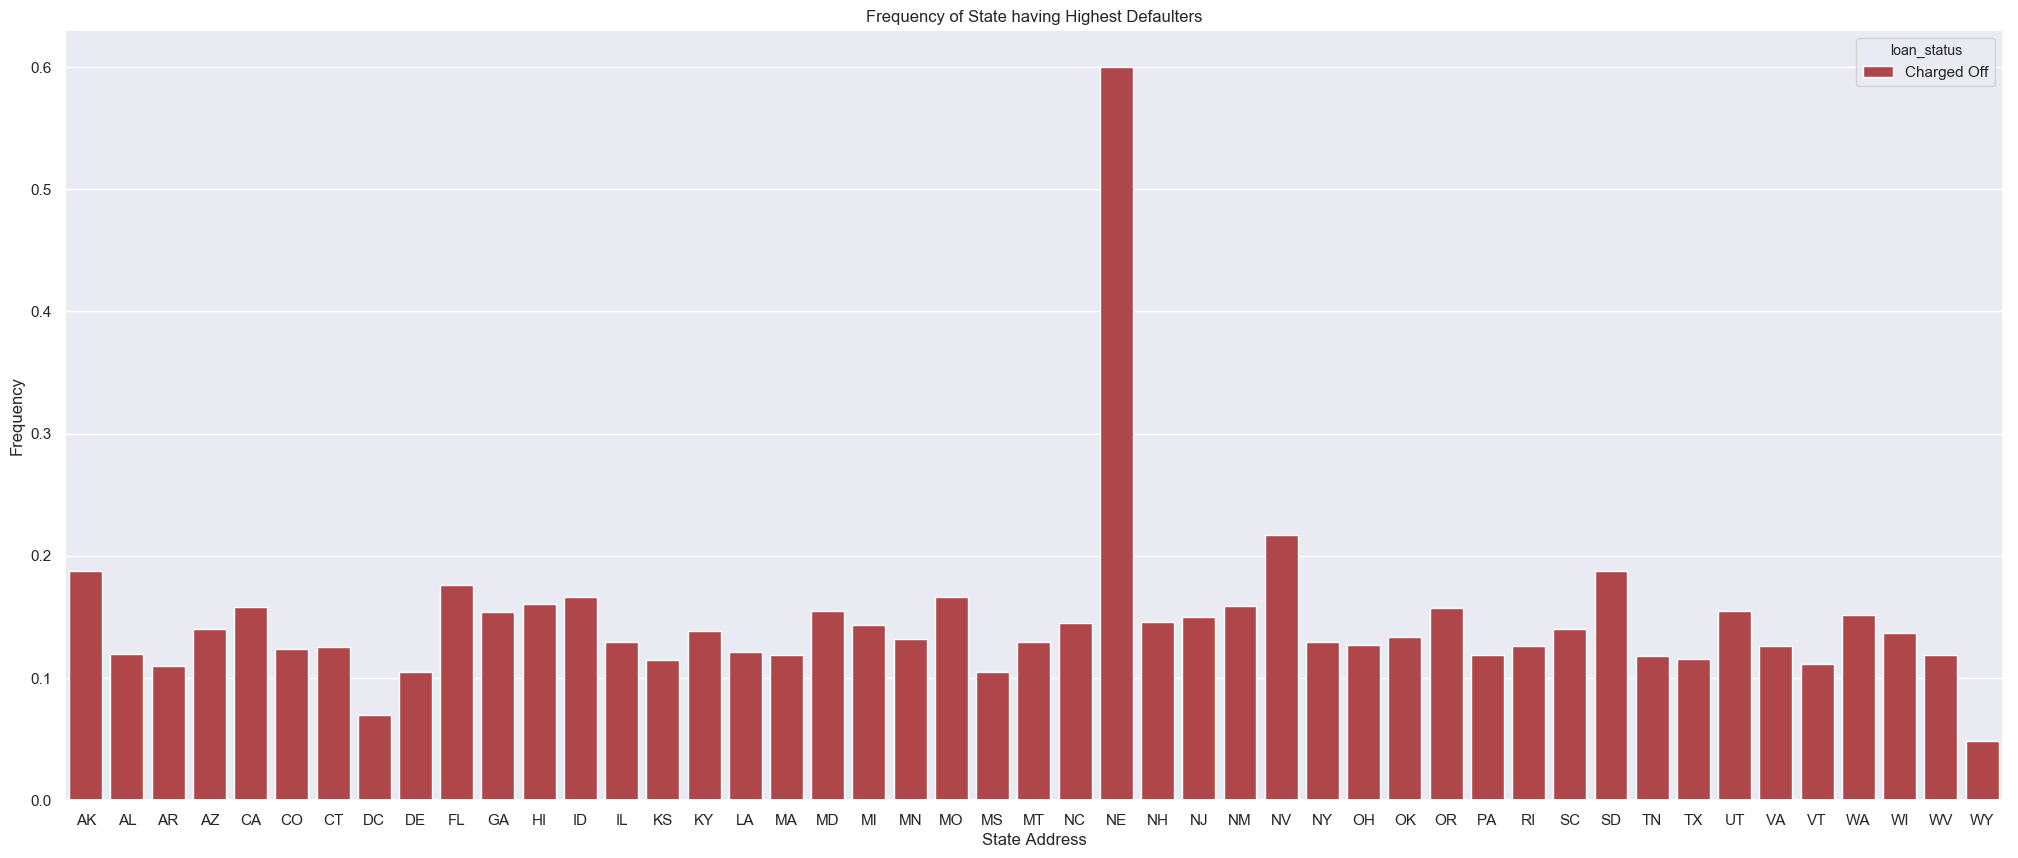

In [186]:
x = pd.DataFrame(loan_main_df[loan_main_df.loan_status == 'Charged Off'].groupby(['addr_state', 'loan_status']).grade.agg(['count'])/loan_main_df.groupby(['addr_state']).grade.agg(['count'])).reset_index()
x= x.rename(index=str, columns={"count": "freq"})
sbn.set_style("dark")
mpt.figure(figsize=(25, 10))
sbn.set(font_scale=1)
ew = sbn.barplot(x="addr_state",y="freq", hue="loan_status", data=x, palette= sbn.color_palette("RdBu"))
mpt.xlabel("State Address")
mpt.ylabel("Frequency")
mpt.title('Frequency of State having Highest Defaulters')
mpt.show()

#### Insights:
- Nebraska (NE) followed by Nevada (NV) and (SD) shows higher incidences of borrowers defaulting._

## Conclusion & Recommendations

### Key Driving Factors
- home-ownership
- Interest_rate
- term
- instalment to income ratio
- loan_purpose
- address
- loan_amnt

### Based on the above inferences
- Loan taken for 60 month interim has higher odds of defaulting.
- Nearly 35% of loans in the interest bracket 20-25% have been defaulted followed by 15-20% interest Interval which has defaulted loan of 24%. So if the loan has higher interest rate (about 15%), there is
higher chance of defaulting.
- Instalment to income ratio is driving factor. Having high value means high chances of default.
- For **60 months** term, if the instalment to income ratio is greater than 9%, there is maximum probability
of defaulting
- Purpose of loan: 
  - Loan taken for **“Debt consolation”** has high chances of defaulting.
- Loan applications from State **CA** and Zipcode ‘945’
- Applicant who are in **rental homes** are more likely to default followed by **mortgaged home** owners
- Nebraska (NE) followed by Nevada (NV) and (SD) shows higher incidences of borrowers defaulting.
- It has been noticed that 3 states CA ‘945’, FL and NY are approving Loans without verifying. Almost 40% of Defaulters are from this 3 states. This 3 states should focus on verifying before Approving the Loan. It is also been observed that this 3 state’s consumers pay Installment late too
- Nebraska has the maximum number of Defaulters. So this state’s loan applications need to be strictly scrutinized
- Loan Applicants who are taking loan for Small Business are the maximum who are Defaulters which is around 27%. More investigation needs to be done on why this Purpose of Loan Consumers are unable to repay the loan
- Loan Applicants who could not grow professionally in terms of Annual income in proportion to to Work Experience and do not own a house peak the defaulters list
